In [1]:
INPUT_DIR = '/kaggle/input/anime-recommendation-database-2020'
!ls {INPUT_DIR}

 anime.csv		   animelist.csv   rating_complete.csv
 anime_with_synopsis.csv  'html folder'    watching_status.csv


In [2]:
import numpy as np
import pandas as pd

rating_df = pd.read_csv(INPUT_DIR + '/animelist.csv', 
                        low_memory=False, 
                        usecols=["user_id", "anime_id", "rating"]
                        )
rating_df.head(4)

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,4898,0


In [3]:
n_ratings = rating_df['user_id'].value_counts()
rating_df = rating_df[rating_df['user_id'].isin(n_ratings[n_ratings >= 400].index)].copy()
len(rating_df)

71418114

In [4]:
# Scaling BTW (0 , 1.0)
min_rating = min(rating_df['rating'])
max_rating = max(rating_df['rating'])
rating_df['rating'] = rating_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)

AvgRating = np.mean(rating_df['rating'])
print('Avg', AvgRating)

Avg 0.4047793589172634


In [5]:

duplicates = rating_df.duplicated()

if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_df = rating_df[~duplicates]

print('> {} duplicates'.format(rating_df.duplicated().sum()))

> 1 duplicates


> 0 duplicates


In [6]:
g = rating_df.groupby('user_id')['rating'].count()
top_users = g.dropna().sort_values(ascending=False)[:20]
top_r = rating_df.join(top_users, rsuffix='_r', how='inner', on='user_id')

g = rating_df.groupby('anime_id')['rating'].count()
top_animes = g.dropna().sort_values(ascending=False)[:20]
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='anime_id')

pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum)

anime_id,226,1535,1575,2001,2167,4224,5081,5114,6547,6746,9253,9989,10620,11757,15809,16498,19815,20507,22319,30276
user_id,,,,,,,,,,,,,,,,,,,,
20807,1.0,1.0,1.0,1.0,0.8,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0
50485,0.0,0.6,1.0,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,0.9,0.6,1.0,1.0,0.9,1.0,1.0,1.0,0.8
63900,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.8,0.0,0.8,0.8,0.8
68042,0.8,1.0,0.9,1.0,0.7,0.9,1.0,0.9,0.7,0.8,0.9,0.8,0.4,0.4,0.6,0.9,0.3,0.2,0.5,0.9
85472,0.7,0.0,0.0,1.0,0.9,0.9,0.0,0.0,1.0,0.0,0.8,0.0,0.8,0.9,0.8,0.8,0.7,0.7,0.7,0.9
92529,0.9,0.9,1.0,1.0,0.0,0.8,0.0,0.9,0.9,0.0,1.0,0.0,0.8,0.9,0.8,0.9,0.9,0.8,0.8,1.0
122341,0.2,0.3,0.2,0.7,0.4,0.3,0.3,0.8,0.5,0.6,0.7,0.3,0.2,0.1,0.3,0.1,0.4,0.4,0.2,0.6
131988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140590,0.3,0.6,0.5,0.8,0.6,0.8,0.8,0.9,0.5,0.8,0.9,0.7,0.3,0.4,0.6,0.5,0.7,0.7,0.5,0.7


In [7]:
# Encoding categorical data
user_ids = rating_df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)

anime_ids = rating_df["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}
rating_df["anime"] = rating_df["anime_id"].map(anime2anime_encoded)
n_animes = len(anime2anime_encoded)

print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(rating_df['rating']), max(rating_df['rating'])))

Num of users: 91641, Num of animes: 17560


Min rating: 0.0, Max rating: 1.0


In [8]:
# Shuffle
rating_df = rating_df.sample(frac=1, random_state=73)

X = rating_df[['user', 'anime']].values
y = rating_df["rating"]

In [9]:
# Split
test_set_size = 10000 #10k for test set
train_indices = rating_df.shape[0] - test_set_size 

X_train, X_test, y_train, y_test = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_test)))

> Train set ratings: 71408113
> Test set ratings: 10000


In [10]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [11]:
# Accelerator check
import tensorflow as tf

TPU_INIT = True

if TPU_INIT:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    tpu_strategy = tf.distribute.TPUStrategy(tpu)
else:
    !nvidia-smi
    
print(tf.__version__)

D1128 19:53:24.957057689      14 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D1128 19:53:24.957082371      14 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D1128 19:53:24.957086035      14 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D1128 19:53:24.957088976      14 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D1128 19:53:24.957091379      14 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D1128 19:53:24.957094002      14 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D1128 19:53:24.957096571      14 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D1128 19:53:24.

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: local


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


2.12.0


In [12]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [13]:
# Embedding layers
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten

def RecommenderNet():
    embedding_size = 128
    
    user = Input(name = 'user', shape = [1])
    user_embedding = Embedding(name = 'user_embedding',
                       input_dim = n_users, 
                       output_dim = embedding_size)(user)
    
    anime = Input(name = 'anime', shape = [1])
    anime_embedding = Embedding(name = 'anime_embedding',
                       input_dim = n_animes, 
                       output_dim = embedding_size)(anime)
    
    #x = Concatenate()([user_embedding, anime_embedding])
    x = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, anime_embedding])
    x = Flatten()(x)
        
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)
    
    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mae", "mse"], optimizer='Adam')
    
    return model

if TPU_INIT:    
    with tpu_strategy.scope():
        model = RecommenderNet()
else:
    model = RecommenderNet()

model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                   Output Shape         Param #     Connected to                     


 user (InputLayer)              [(None, 1)]          0           []                               


 anime (InputLayer)             [(None, 1)]          0           []                               


 user_embedding (Embedding)     (None, 1, 128)       11730048    ['user[0][0]']                   


 anime_embedding (Embedding)    (None, 1, 128)       2247680     ['anime[0][0]']                  


 dot_product (Dot)              (None, 1, 1)         0           ['user_embedding[0][0]',         


                                                                  'anime_embedding[0][0]']        


 flatten (Flatten)              (None, 1)            0           ['dot_product[0][0]']            


 dense (Dense)                  (None, 1)            2           ['flatten[0][0]']                


 batch_normalization (BatchNorm  (None, 1)           4           ['dense[0][0]']                  


 alization)                                                                                       


 activation (Activation)        (None, 1)            0           ['batch_normalization[0][0]']    


Total params: 13,977,734


Trainable params: 13,977,732


Non-trainable params: 2


__________________________________________________________________________________________________


In [14]:
# Callbacks
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000

if TPU_INIT:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

checkpoint_filepath = './weights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True)

early_stopping = EarlyStopping(patience = 3, monitor='val_loss', 
                               mode='min', restore_best_weights=True)

my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,   
]

In [15]:
# Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

Epoch 1/20


2023-11-28 19:53:50.286826: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-11-28 19:53:50.430076: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


  1/893 [..............................] - ETA: 2:58:27 - loss: 0.6949 - mae: 0.3634 - mse: 0.1578

  4/893 [..............................] - ETA: 15s - loss: 0.6947 - mae: 0.3640 - mse: 0.1581    

  8/893 [..............................] - ETA: 14s - loss: 0.6947 - mae: 0.3638 - mse: 0.1579

 12/893 [..............................] - ETA: 13s - loss: 0.6947 - mae: 0.3638 - mse: 0.1580

 16/893 [..............................] - ETA: 13s - loss: 0.6947 - mae: 0.3638 - mse: 0.1580

 20/893 [..............................] - ETA: 12s - loss: 0.6947 - mae: 0.3638 - mse: 0.1580

 24/893 [..............................] - ETA: 12s - loss: 0.6947 - mae: 0.3638 - mse: 0.1580

 28/893 [..............................] - ETA: 12s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 32/893 [>.............................] - ETA: 12s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 36/893 [>.............................] - ETA: 12s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 40/893 [>.............................] - ETA: 12s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 44/893 [>.............................] - ETA: 11s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 48/893 [>.............................] - ETA: 11s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 51/893 [>.............................] - ETA: 12s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 55/893 [>.............................] - ETA: 11s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 59/893 [>.............................] - ETA: 11s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 63/893 [=>............................] - ETA: 11s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 65/893 [=>............................] - ETA: 12s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 69/893 [=>............................] - ETA: 12s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 73/893 [=>............................] - ETA: 12s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 77/893 [=>............................] - ETA: 11s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 81/893 [=>............................] - ETA: 11s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 85/893 [=>............................] - ETA: 11s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 89/893 [=>............................] - ETA: 11s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 93/893 [==>...........................] - ETA: 11s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

 97/893 [==>...........................] - ETA: 11s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

101/893 [==>...........................] - ETA: 11s - loss: 0.6947 - mae: 0.3639 - mse: 0.1581

105/893 [==>...........................] - ETA: 11s - loss: 0.6947 - mae: 0.3639 - mse: 0.1580

109/893 [==>...........................] - ETA: 11s - loss: 0.6947 - mae: 0.3638 - mse: 0.1580

113/893 [==>...........................] - ETA: 11s - loss: 0.6947 - mae: 0.3638 - mse: 0.1580

117/893 [==>...........................] - ETA: 10s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

121/893 [===>..........................] - ETA: 10s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

125/893 [===>..........................] - ETA: 10s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

129/893 [===>..........................] - ETA: 10s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

133/893 [===>..........................] - ETA: 10s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

137/893 [===>..........................] - ETA: 10s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

141/893 [===>..........................] - ETA: 10s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

145/893 [===>..........................] - ETA: 10s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

149/893 [====>.........................] - ETA: 10s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

153/893 [====>.........................] - ETA: 10s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

157/893 [====>.........................] - ETA: 10s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

161/893 [====>.........................] - ETA: 10s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

165/893 [====>.........................] - ETA: 10s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

169/893 [====>.........................] - ETA: 10s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

173/893 [====>.........................] - ETA: 9s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580 

177/893 [====>.........................] - ETA: 9s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

181/893 [=====>........................] - ETA: 9s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

185/893 [=====>........................] - ETA: 9s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

189/893 [=====>........................] - ETA: 9s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

193/893 [=====>........................] - ETA: 9s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

197/893 [=====>........................] - ETA: 9s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

201/893 [=====>........................] - ETA: 9s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

205/893 [=====>........................] - ETA: 9s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

209/893 [======>.......................] - ETA: 9s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

213/893 [======>.......................] - ETA: 9s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

217/893 [======>.......................] - ETA: 9s - loss: 0.6946 - mae: 0.3639 - mse: 0.1580

221/893 [======>.......................] - ETA: 9s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

225/893 [======>.......................] - ETA: 9s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

229/893 [======>.......................] - ETA: 9s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

233/893 [======>.......................] - ETA: 9s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

237/893 [======>.......................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

241/893 [=======>......................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

245/893 [=======>......................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

249/893 [=======>......................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

253/893 [=======>......................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

257/893 [=======>......................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

261/893 [=======>......................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

265/893 [=======>......................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

269/893 [========>.....................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

273/893 [========>.....................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

277/893 [========>.....................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

281/893 [========>.....................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

285/893 [========>.....................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

289/893 [========>.....................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

293/893 [========>.....................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

297/893 [========>.....................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

301/893 [=========>....................] - ETA: 8s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

305/893 [=========>....................] - ETA: 7s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

309/893 [=========>....................] - ETA: 7s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

313/893 [=========>....................] - ETA: 7s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

317/893 [=========>....................] - ETA: 7s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

321/893 [=========>....................] - ETA: 7s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

325/893 [=========>....................] - ETA: 7s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

329/893 [==========>...................] - ETA: 7s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

333/893 [==========>...................] - ETA: 7s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

337/893 [==========>...................] - ETA: 7s - loss: 0.6945 - mae: 0.3639 - mse: 0.1580

341/893 [==========>...................] - ETA: 7s - loss: 0.6944 - mae: 0.3639 - mse: 0.1580

345/893 [==========>...................] - ETA: 7s - loss: 0.6944 - mae: 0.3639 - mse: 0.1580

349/893 [==========>...................] - ETA: 7s - loss: 0.6944 - mae: 0.3639 - mse: 0.1580

353/893 [==========>...................] - ETA: 7s - loss: 0.6944 - mae: 0.3639 - mse: 0.1580

357/893 [==========>...................] - ETA: 7s - loss: 0.6944 - mae: 0.3639 - mse: 0.1580

361/893 [===========>..................] - ETA: 7s - loss: 0.6944 - mae: 0.3639 - mse: 0.1580

365/893 [===========>..................] - ETA: 7s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

369/893 [===========>..................] - ETA: 7s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

373/893 [===========>..................] - ETA: 7s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

377/893 [===========>..................] - ETA: 6s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

381/893 [===========>..................] - ETA: 6s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

385/893 [===========>..................] - ETA: 6s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

389/893 [============>.................] - ETA: 6s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

393/893 [============>.................] - ETA: 6s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

397/893 [============>.................] - ETA: 6s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

401/893 [============>.................] - ETA: 6s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

405/893 [============>.................] - ETA: 6s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

409/893 [============>.................] - ETA: 6s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

413/893 [============>.................] - ETA: 6s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

417/893 [=============>................] - ETA: 6s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

421/893 [=============>................] - ETA: 6s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

425/893 [=============>................] - ETA: 6s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

429/893 [=============>................] - ETA: 6s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

433/893 [=============>................] - ETA: 6s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

437/893 [=============>................] - ETA: 6s - loss: 0.6944 - mae: 0.3639 - mse: 0.1579

441/893 [=============>................] - ETA: 6s - loss: 0.6944 - mae: 0.3638 - mse: 0.1579

445/893 [=============>................] - ETA: 6s - loss: 0.6944 - mae: 0.3638 - mse: 0.1579

449/893 [==============>...............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

453/893 [==============>...............] - ETA: 5s - loss: 0.6943 - mae: 0.3638 - mse: 0.1579

457/893 [==============>...............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

461/893 [==============>...............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

465/893 [==============>...............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

469/893 [==============>...............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

473/893 [==============>...............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

477/893 [===============>..............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

481/893 [===============>..............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

485/893 [===============>..............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

489/893 [===============>..............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

493/893 [===============>..............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

497/893 [===============>..............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

501/893 [===============>..............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

505/893 [===============>..............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

509/893 [================>.............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

513/893 [================>.............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

517/893 [================>.............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

521/893 [================>.............] - ETA: 5s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

525/893 [================>.............] - ETA: 4s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

529/893 [================>.............] - ETA: 4s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

533/893 [================>.............] - ETA: 4s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

537/893 [=================>............] - ETA: 4s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

541/893 [=================>............] - ETA: 4s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

545/893 [=================>............] - ETA: 4s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

549/893 [=================>............] - ETA: 4s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

553/893 [=================>............] - ETA: 4s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

557/893 [=================>............] - ETA: 4s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

561/893 [=================>............] - ETA: 4s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

565/893 [=================>............] - ETA: 4s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

569/893 [==================>...........] - ETA: 4s - loss: 0.6943 - mae: 0.3639 - mse: 0.1579

573/893 [==================>...........] - ETA: 4s - loss: 0.6942 - mae: 0.3638 - mse: 0.1579

577/893 [==================>...........] - ETA: 4s - loss: 0.6942 - mae: 0.3638 - mse: 0.1579

581/893 [==================>...........] - ETA: 4s - loss: 0.6942 - mae: 0.3638 - mse: 0.1579

585/893 [==================>...........] - ETA: 4s - loss: 0.6942 - mae: 0.3638 - mse: 0.1579

589/893 [==================>...........] - ETA: 4s - loss: 0.6942 - mae: 0.3638 - mse: 0.1579

593/893 [==================>...........] - ETA: 4s - loss: 0.6942 - mae: 0.3638 - mse: 0.1579

597/893 [===================>..........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1579

601/893 [===================>..........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

605/893 [===================>..........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

609/893 [===================>..........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

613/893 [===================>..........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

617/893 [===================>..........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

621/893 [===================>..........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

625/893 [===================>..........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

629/893 [====================>.........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

633/893 [====================>.........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

637/893 [====================>.........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

641/893 [====================>.........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

645/893 [====================>.........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

649/893 [====================>.........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

653/893 [====================>.........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

657/893 [=====================>........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

661/893 [=====================>........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

665/893 [=====================>........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

669/893 [=====================>........] - ETA: 3s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

673/893 [=====================>........] - ETA: 2s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

677/893 [=====================>........] - ETA: 2s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

681/893 [=====================>........] - ETA: 2s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

685/893 [======================>.......] - ETA: 2s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

689/893 [======================>.......] - ETA: 2s - loss: 0.6942 - mae: 0.3638 - mse: 0.1578

693/893 [======================>.......] - ETA: 2s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

697/893 [======================>.......] - ETA: 2s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

701/893 [======================>.......] - ETA: 2s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

705/893 [======================>.......] - ETA: 2s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

709/893 [======================>.......] - ETA: 2s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

713/893 [======================>.......] - ETA: 2s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

717/893 [=======================>......] - ETA: 2s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

721/893 [=======================>......] - ETA: 2s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

725/893 [=======================>......] - ETA: 2s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

729/893 [=======================>......] - ETA: 2s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

733/893 [=======================>......] - ETA: 2s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

737/893 [=======================>......] - ETA: 2s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

741/893 [=======================>......] - ETA: 2s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

745/893 [========================>.....] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

749/893 [========================>.....] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

753/893 [========================>.....] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

757/893 [========================>.....] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

761/893 [========================>.....] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

765/893 [========================>.....] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

769/893 [========================>.....] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

773/893 [========================>.....] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

777/893 [=========================>....] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

781/893 [=========================>....] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

785/893 [=========================>....] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

789/893 [=========================>....] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

793/893 [=========================>....] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

795/893 [=========================>....] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

799/893 [=========================>....] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

803/893 [=========================>....] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

807/893 [==========================>...] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

811/893 [==========================>...] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

815/893 [==========================>...] - ETA: 1s - loss: 0.6941 - mae: 0.3638 - mse: 0.1578

819/893 [==========================>...] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1578

823/893 [==========================>...] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1578

827/893 [==========================>...] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

831/893 [==========================>...] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

835/893 [===========================>..] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

839/893 [===========================>..] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

843/893 [===========================>..] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

847/893 [===========================>..] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

851/893 [===========================>..] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

855/893 [===========================>..] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

859/893 [===========================>..] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

863/893 [===========================>..] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

867/893 [============================>.] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

871/893 [============================>.] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

875/893 [============================>.] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

879/893 [============================>.] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

883/893 [============================>.] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

887/893 [============================>.] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

891/893 [============================>.] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

893/893 [==============================] - ETA: 0s - loss: 0.6940 - mae: 0.3638 - mse: 0.1577

2023-11-28 19:54:17.106097: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-11-28 19:54:17.235578: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


893/893 [==============================] - 30s 21ms/step - loss: 0.6940 - mae: 0.3638 - mse: 0.1577 - val_loss: 0.6927 - val_mae: 0.3664 - val_mse: 0.1587 - lr: 1.0000e-05


Epoch 2/20


  1/893 [..............................] - ETA: 13s - loss: 0.6932 - mae: 0.3634 - mse: 0.1572

  5/893 [..............................] - ETA: 11s - loss: 0.6931 - mae: 0.3640 - mse: 0.1576

  9/893 [..............................] - ETA: 11s - loss: 0.6931 - mae: 0.3638 - mse: 0.1574

 13/893 [..............................] - ETA: 11s - loss: 0.6930 - mae: 0.3638 - mse: 0.1574

 17/893 [..............................] - ETA: 11s - loss: 0.6930 - mae: 0.3638 - mse: 0.1574

 21/893 [..............................] - ETA: 11s - loss: 0.6930 - mae: 0.3638 - mse: 0.1574

 25/893 [..............................] - ETA: 11s - loss: 0.6930 - mae: 0.3637 - mse: 0.1573

 29/893 [..............................] - ETA: 11s - loss: 0.6929 - mae: 0.3636 - mse: 0.1572

 33/893 [>.............................] - ETA: 11s - loss: 0.6929 - mae: 0.3637 - mse: 0.1573

 37/893 [>.............................] - ETA: 11s - loss: 0.6929 - mae: 0.3637 - mse: 0.1572

 41/893 [>.............................] - ETA: 11s - loss: 0.6929 - mae: 0.3637 - mse: 0.1573

 45/893 [>.............................] - ETA: 11s - loss: 0.6928 - mae: 0.3637 - mse: 0.1572

 49/893 [>.............................] - ETA: 11s - loss: 0.6928 - mae: 0.3636 - mse: 0.1572

 53/893 [>.............................] - ETA: 11s - loss: 0.6928 - mae: 0.3636 - mse: 0.1572

 57/893 [>.............................] - ETA: 11s - loss: 0.6928 - mae: 0.3635 - mse: 0.1571

 61/893 [=>............................] - ETA: 11s - loss: 0.6927 - mae: 0.3635 - mse: 0.1571

 65/893 [=>............................] - ETA: 11s - loss: 0.6927 - mae: 0.3636 - mse: 0.1571

 69/893 [=>............................] - ETA: 11s - loss: 0.6927 - mae: 0.3635 - mse: 0.1571

 73/893 [=>............................] - ETA: 10s - loss: 0.6927 - mae: 0.3635 - mse: 0.1571

 77/893 [=>............................] - ETA: 10s - loss: 0.6927 - mae: 0.3635 - mse: 0.1571

 81/893 [=>............................] - ETA: 10s - loss: 0.6926 - mae: 0.3635 - mse: 0.1571

 85/893 [=>............................] - ETA: 10s - loss: 0.6926 - mae: 0.3636 - mse: 0.1571

 89/893 [=>............................] - ETA: 10s - loss: 0.6926 - mae: 0.3636 - mse: 0.1571

 93/893 [==>...........................] - ETA: 10s - loss: 0.6926 - mae: 0.3636 - mse: 0.1570

 97/893 [==>...........................] - ETA: 10s - loss: 0.6926 - mae: 0.3636 - mse: 0.1570

101/893 [==>...........................] - ETA: 10s - loss: 0.6925 - mae: 0.3636 - mse: 0.1570

105/893 [==>...........................] - ETA: 10s - loss: 0.6925 - mae: 0.3636 - mse: 0.1570

109/893 [==>...........................] - ETA: 10s - loss: 0.6925 - mae: 0.3636 - mse: 0.1570

113/893 [==>...........................] - ETA: 10s - loss: 0.6925 - mae: 0.3636 - mse: 0.1570

117/893 [==>...........................] - ETA: 10s - loss: 0.6924 - mae: 0.3636 - mse: 0.1570

121/893 [===>..........................] - ETA: 10s - loss: 0.6924 - mae: 0.3636 - mse: 0.1570

125/893 [===>..........................] - ETA: 10s - loss: 0.6924 - mae: 0.3636 - mse: 0.1570

129/893 [===>..........................] - ETA: 10s - loss: 0.6924 - mae: 0.3636 - mse: 0.1570

133/893 [===>..........................] - ETA: 10s - loss: 0.6924 - mae: 0.3636 - mse: 0.1570

137/893 [===>..........................] - ETA: 10s - loss: 0.6923 - mae: 0.3636 - mse: 0.1569

141/893 [===>..........................] - ETA: 10s - loss: 0.6923 - mae: 0.3635 - mse: 0.1569

145/893 [===>..........................] - ETA: 9s - loss: 0.6923 - mae: 0.3635 - mse: 0.1569 

149/893 [====>.........................] - ETA: 9s - loss: 0.6923 - mae: 0.3635 - mse: 0.1569

153/893 [====>.........................] - ETA: 9s - loss: 0.6923 - mae: 0.3635 - mse: 0.1569

157/893 [====>.........................] - ETA: 9s - loss: 0.6922 - mae: 0.3635 - mse: 0.1569

161/893 [====>.........................] - ETA: 9s - loss: 0.6922 - mae: 0.3635 - mse: 0.1569

165/893 [====>.........................] - ETA: 9s - loss: 0.6922 - mae: 0.3635 - mse: 0.1569

169/893 [====>.........................] - ETA: 9s - loss: 0.6922 - mae: 0.3635 - mse: 0.1568

173/893 [====>.........................] - ETA: 9s - loss: 0.6922 - mae: 0.3635 - mse: 0.1568

177/893 [====>.........................] - ETA: 9s - loss: 0.6921 - mae: 0.3635 - mse: 0.1568

181/893 [=====>........................] - ETA: 9s - loss: 0.6921 - mae: 0.3635 - mse: 0.1568

185/893 [=====>........................] - ETA: 9s - loss: 0.6921 - mae: 0.3635 - mse: 0.1568

189/893 [=====>........................] - ETA: 9s - loss: 0.6921 - mae: 0.3635 - mse: 0.1568

193/893 [=====>........................] - ETA: 9s - loss: 0.6921 - mae: 0.3635 - mse: 0.1568

196/893 [=====>........................] - ETA: 9s - loss: 0.6920 - mae: 0.3635 - mse: 0.1568

200/893 [=====>........................] - ETA: 9s - loss: 0.6920 - mae: 0.3635 - mse: 0.1568

204/893 [=====>........................] - ETA: 9s - loss: 0.6920 - mae: 0.3635 - mse: 0.1568

208/893 [=====>........................] - ETA: 9s - loss: 0.6920 - mae: 0.3635 - mse: 0.1567

212/893 [======>.......................] - ETA: 9s - loss: 0.6920 - mae: 0.3635 - mse: 0.1567

216/893 [======>.......................] - ETA: 9s - loss: 0.6919 - mae: 0.3635 - mse: 0.1567

220/893 [======>.......................] - ETA: 9s - loss: 0.6919 - mae: 0.3635 - mse: 0.1567

224/893 [======>.......................] - ETA: 9s - loss: 0.6919 - mae: 0.3635 - mse: 0.1567

228/893 [======>.......................] - ETA: 8s - loss: 0.6919 - mae: 0.3635 - mse: 0.1567

232/893 [======>.......................] - ETA: 8s - loss: 0.6919 - mae: 0.3635 - mse: 0.1567

236/893 [======>.......................] - ETA: 8s - loss: 0.6918 - mae: 0.3635 - mse: 0.1567

240/893 [=======>......................] - ETA: 8s - loss: 0.6918 - mae: 0.3635 - mse: 0.1567

244/893 [=======>......................] - ETA: 8s - loss: 0.6918 - mae: 0.3635 - mse: 0.1567

248/893 [=======>......................] - ETA: 8s - loss: 0.6918 - mae: 0.3635 - mse: 0.1567

252/893 [=======>......................] - ETA: 8s - loss: 0.6918 - mae: 0.3635 - mse: 0.1566

256/893 [=======>......................] - ETA: 8s - loss: 0.6917 - mae: 0.3635 - mse: 0.1566

260/893 [=======>......................] - ETA: 8s - loss: 0.6917 - mae: 0.3635 - mse: 0.1566

264/893 [=======>......................] - ETA: 8s - loss: 0.6917 - mae: 0.3635 - mse: 0.1566

268/893 [========>.....................] - ETA: 8s - loss: 0.6917 - mae: 0.3635 - mse: 0.1566

272/893 [========>.....................] - ETA: 8s - loss: 0.6917 - mae: 0.3635 - mse: 0.1566

276/893 [========>.....................] - ETA: 8s - loss: 0.6917 - mae: 0.3635 - mse: 0.1566

280/893 [========>.....................] - ETA: 8s - loss: 0.6916 - mae: 0.3635 - mse: 0.1566

284/893 [========>.....................] - ETA: 8s - loss: 0.6916 - mae: 0.3634 - mse: 0.1566

288/893 [========>.....................] - ETA: 8s - loss: 0.6916 - mae: 0.3634 - mse: 0.1565

292/893 [========>.....................] - ETA: 8s - loss: 0.6916 - mae: 0.3634 - mse: 0.1565

296/893 [========>.....................] - ETA: 8s - loss: 0.6916 - mae: 0.3634 - mse: 0.1565

300/893 [=========>....................] - ETA: 7s - loss: 0.6915 - mae: 0.3634 - mse: 0.1565

304/893 [=========>....................] - ETA: 7s - loss: 0.6915 - mae: 0.3634 - mse: 0.1565

308/893 [=========>....................] - ETA: 7s - loss: 0.6915 - mae: 0.3634 - mse: 0.1565

312/893 [=========>....................] - ETA: 7s - loss: 0.6915 - mae: 0.3634 - mse: 0.1565

316/893 [=========>....................] - ETA: 7s - loss: 0.6915 - mae: 0.3634 - mse: 0.1565

320/893 [=========>....................] - ETA: 7s - loss: 0.6915 - mae: 0.3634 - mse: 0.1565

324/893 [=========>....................] - ETA: 7s - loss: 0.6914 - mae: 0.3634 - mse: 0.1565

328/893 [==========>...................] - ETA: 7s - loss: 0.6914 - mae: 0.3634 - mse: 0.1565

332/893 [==========>...................] - ETA: 7s - loss: 0.6914 - mae: 0.3634 - mse: 0.1564

336/893 [==========>...................] - ETA: 7s - loss: 0.6914 - mae: 0.3634 - mse: 0.1564

340/893 [==========>...................] - ETA: 7s - loss: 0.6914 - mae: 0.3634 - mse: 0.1564

344/893 [==========>...................] - ETA: 7s - loss: 0.6913 - mae: 0.3634 - mse: 0.1564

348/893 [==========>...................] - ETA: 7s - loss: 0.6913 - mae: 0.3634 - mse: 0.1564

352/893 [==========>...................] - ETA: 7s - loss: 0.6913 - mae: 0.3634 - mse: 0.1564

356/893 [==========>...................] - ETA: 7s - loss: 0.6913 - mae: 0.3634 - mse: 0.1564

360/893 [===========>..................] - ETA: 7s - loss: 0.6913 - mae: 0.3634 - mse: 0.1564

364/893 [===========>..................] - ETA: 7s - loss: 0.6913 - mae: 0.3634 - mse: 0.1564

368/893 [===========>..................] - ETA: 7s - loss: 0.6912 - mae: 0.3634 - mse: 0.1564

372/893 [===========>..................] - ETA: 6s - loss: 0.6912 - mae: 0.3634 - mse: 0.1563

376/893 [===========>..................] - ETA: 6s - loss: 0.6912 - mae: 0.3634 - mse: 0.1563

380/893 [===========>..................] - ETA: 6s - loss: 0.6912 - mae: 0.3634 - mse: 0.1563

384/893 [===========>..................] - ETA: 6s - loss: 0.6912 - mae: 0.3634 - mse: 0.1563

388/893 [============>.................] - ETA: 6s - loss: 0.6912 - mae: 0.3634 - mse: 0.1563

392/893 [============>.................] - ETA: 6s - loss: 0.6911 - mae: 0.3634 - mse: 0.1563

396/893 [============>.................] - ETA: 6s - loss: 0.6911 - mae: 0.3634 - mse: 0.1563

400/893 [============>.................] - ETA: 6s - loss: 0.6911 - mae: 0.3634 - mse: 0.1563

404/893 [============>.................] - ETA: 6s - loss: 0.6911 - mae: 0.3634 - mse: 0.1563

408/893 [============>.................] - ETA: 6s - loss: 0.6911 - mae: 0.3634 - mse: 0.1563

412/893 [============>.................] - ETA: 6s - loss: 0.6910 - mae: 0.3634 - mse: 0.1563

416/893 [============>.................] - ETA: 6s - loss: 0.6910 - mae: 0.3634 - mse: 0.1563

420/893 [=============>................] - ETA: 6s - loss: 0.6910 - mae: 0.3634 - mse: 0.1562

424/893 [=============>................] - ETA: 6s - loss: 0.6910 - mae: 0.3634 - mse: 0.1562

428/893 [=============>................] - ETA: 6s - loss: 0.6910 - mae: 0.3634 - mse: 0.1562

432/893 [=============>................] - ETA: 6s - loss: 0.6910 - mae: 0.3634 - mse: 0.1562

436/893 [=============>................] - ETA: 6s - loss: 0.6909 - mae: 0.3634 - mse: 0.1562

440/893 [=============>................] - ETA: 6s - loss: 0.6909 - mae: 0.3634 - mse: 0.1562

444/893 [=============>................] - ETA: 6s - loss: 0.6909 - mae: 0.3634 - mse: 0.1562

448/893 [==============>...............] - ETA: 5s - loss: 0.6909 - mae: 0.3634 - mse: 0.1562

452/893 [==============>...............] - ETA: 5s - loss: 0.6909 - mae: 0.3634 - mse: 0.1562

456/893 [==============>...............] - ETA: 5s - loss: 0.6909 - mae: 0.3634 - mse: 0.1562

460/893 [==============>...............] - ETA: 5s - loss: 0.6908 - mae: 0.3634 - mse: 0.1562

464/893 [==============>...............] - ETA: 5s - loss: 0.6908 - mae: 0.3634 - mse: 0.1561

468/893 [==============>...............] - ETA: 5s - loss: 0.6908 - mae: 0.3634 - mse: 0.1561

472/893 [==============>...............] - ETA: 5s - loss: 0.6908 - mae: 0.3634 - mse: 0.1561

476/893 [==============>...............] - ETA: 5s - loss: 0.6908 - mae: 0.3634 - mse: 0.1561

480/893 [===============>..............] - ETA: 5s - loss: 0.6908 - mae: 0.3634 - mse: 0.1561

484/893 [===============>..............] - ETA: 5s - loss: 0.6907 - mae: 0.3634 - mse: 0.1561

488/893 [===============>..............] - ETA: 5s - loss: 0.6907 - mae: 0.3634 - mse: 0.1561

492/893 [===============>..............] - ETA: 5s - loss: 0.6907 - mae: 0.3634 - mse: 0.1561

496/893 [===============>..............] - ETA: 5s - loss: 0.6907 - mae: 0.3634 - mse: 0.1561

500/893 [===============>..............] - ETA: 5s - loss: 0.6907 - mae: 0.3634 - mse: 0.1561

504/893 [===============>..............] - ETA: 5s - loss: 0.6907 - mae: 0.3634 - mse: 0.1561

508/893 [================>.............] - ETA: 5s - loss: 0.6907 - mae: 0.3634 - mse: 0.1561

512/893 [================>.............] - ETA: 5s - loss: 0.6906 - mae: 0.3634 - mse: 0.1561

516/893 [================>.............] - ETA: 5s - loss: 0.6906 - mae: 0.3634 - mse: 0.1560

520/893 [================>.............] - ETA: 4s - loss: 0.6906 - mae: 0.3634 - mse: 0.1560

524/893 [================>.............] - ETA: 4s - loss: 0.6906 - mae: 0.3634 - mse: 0.1560

528/893 [================>.............] - ETA: 4s - loss: 0.6906 - mae: 0.3634 - mse: 0.1560

532/893 [================>.............] - ETA: 4s - loss: 0.6906 - mae: 0.3634 - mse: 0.1560

536/893 [=================>............] - ETA: 4s - loss: 0.6905 - mae: 0.3634 - mse: 0.1560

540/893 [=================>............] - ETA: 4s - loss: 0.6905 - mae: 0.3634 - mse: 0.1560

544/893 [=================>............] - ETA: 4s - loss: 0.6905 - mae: 0.3634 - mse: 0.1560

548/893 [=================>............] - ETA: 4s - loss: 0.6905 - mae: 0.3634 - mse: 0.1560

552/893 [=================>............] - ETA: 4s - loss: 0.6905 - mae: 0.3634 - mse: 0.1560

556/893 [=================>............] - ETA: 4s - loss: 0.6905 - mae: 0.3634 - mse: 0.1560

560/893 [=================>............] - ETA: 4s - loss: 0.6904 - mae: 0.3634 - mse: 0.1560

564/893 [=================>............] - ETA: 4s - loss: 0.6904 - mae: 0.3634 - mse: 0.1559

568/893 [==================>...........] - ETA: 4s - loss: 0.6904 - mae: 0.3634 - mse: 0.1559

571/893 [==================>...........] - ETA: 4s - loss: 0.6904 - mae: 0.3634 - mse: 0.1559

575/893 [==================>...........] - ETA: 4s - loss: 0.6904 - mae: 0.3634 - mse: 0.1559

579/893 [==================>...........] - ETA: 4s - loss: 0.6904 - mae: 0.3634 - mse: 0.1559

583/893 [==================>...........] - ETA: 4s - loss: 0.6904 - mae: 0.3634 - mse: 0.1559

587/893 [==================>...........] - ETA: 4s - loss: 0.6903 - mae: 0.3634 - mse: 0.1559

591/893 [==================>...........] - ETA: 4s - loss: 0.6903 - mae: 0.3634 - mse: 0.1559

595/893 [==================>...........] - ETA: 3s - loss: 0.6903 - mae: 0.3634 - mse: 0.1559

599/893 [===================>..........] - ETA: 3s - loss: 0.6903 - mae: 0.3634 - mse: 0.1559

603/893 [===================>..........] - ETA: 3s - loss: 0.6903 - mae: 0.3634 - mse: 0.1559

607/893 [===================>..........] - ETA: 3s - loss: 0.6903 - mae: 0.3634 - mse: 0.1559

611/893 [===================>..........] - ETA: 3s - loss: 0.6902 - mae: 0.3634 - mse: 0.1559

615/893 [===================>..........] - ETA: 3s - loss: 0.6902 - mae: 0.3634 - mse: 0.1558

619/893 [===================>..........] - ETA: 3s - loss: 0.6902 - mae: 0.3634 - mse: 0.1558

623/893 [===================>..........] - ETA: 3s - loss: 0.6902 - mae: 0.3634 - mse: 0.1558

627/893 [====================>.........] - ETA: 3s - loss: 0.6902 - mae: 0.3634 - mse: 0.1558

631/893 [====================>.........] - ETA: 3s - loss: 0.6902 - mae: 0.3634 - mse: 0.1558

635/893 [====================>.........] - ETA: 3s - loss: 0.6902 - mae: 0.3634 - mse: 0.1558

639/893 [====================>.........] - ETA: 3s - loss: 0.6901 - mae: 0.3634 - mse: 0.1558

643/893 [====================>.........] - ETA: 3s - loss: 0.6901 - mae: 0.3634 - mse: 0.1558

647/893 [====================>.........] - ETA: 3s - loss: 0.6901 - mae: 0.3634 - mse: 0.1558

651/893 [====================>.........] - ETA: 3s - loss: 0.6901 - mae: 0.3634 - mse: 0.1558

655/893 [=====================>........] - ETA: 3s - loss: 0.6901 - mae: 0.3634 - mse: 0.1558

659/893 [=====================>........] - ETA: 3s - loss: 0.6901 - mae: 0.3634 - mse: 0.1558

663/893 [=====================>........] - ETA: 3s - loss: 0.6901 - mae: 0.3634 - mse: 0.1558

667/893 [=====================>........] - ETA: 3s - loss: 0.6900 - mae: 0.3634 - mse: 0.1558

671/893 [=====================>........] - ETA: 2s - loss: 0.6900 - mae: 0.3634 - mse: 0.1557

675/893 [=====================>........] - ETA: 2s - loss: 0.6900 - mae: 0.3634 - mse: 0.1557

679/893 [=====================>........] - ETA: 2s - loss: 0.6900 - mae: 0.3634 - mse: 0.1557

683/893 [=====================>........] - ETA: 2s - loss: 0.6900 - mae: 0.3634 - mse: 0.1557

687/893 [======================>.......] - ETA: 2s - loss: 0.6900 - mae: 0.3634 - mse: 0.1557

691/893 [======================>.......] - ETA: 2s - loss: 0.6899 - mae: 0.3634 - mse: 0.1557

695/893 [======================>.......] - ETA: 2s - loss: 0.6899 - mae: 0.3634 - mse: 0.1557

699/893 [======================>.......] - ETA: 2s - loss: 0.6899 - mae: 0.3634 - mse: 0.1557

703/893 [======================>.......] - ETA: 2s - loss: 0.6899 - mae: 0.3634 - mse: 0.1557

707/893 [======================>.......] - ETA: 2s - loss: 0.6899 - mae: 0.3634 - mse: 0.1557

711/893 [======================>.......] - ETA: 2s - loss: 0.6899 - mae: 0.3634 - mse: 0.1557

715/893 [=======================>......] - ETA: 2s - loss: 0.6899 - mae: 0.3634 - mse: 0.1557

719/893 [=======================>......] - ETA: 2s - loss: 0.6898 - mae: 0.3634 - mse: 0.1557

723/893 [=======================>......] - ETA: 2s - loss: 0.6898 - mae: 0.3634 - mse: 0.1557

727/893 [=======================>......] - ETA: 2s - loss: 0.6898 - mae: 0.3634 - mse: 0.1556

731/893 [=======================>......] - ETA: 2s - loss: 0.6898 - mae: 0.3634 - mse: 0.1556

735/893 [=======================>......] - ETA: 2s - loss: 0.6898 - mae: 0.3634 - mse: 0.1556

739/893 [=======================>......] - ETA: 2s - loss: 0.6898 - mae: 0.3634 - mse: 0.1556

743/893 [=======================>......] - ETA: 2s - loss: 0.6898 - mae: 0.3634 - mse: 0.1556

747/893 [========================>.....] - ETA: 1s - loss: 0.6897 - mae: 0.3634 - mse: 0.1556

751/893 [========================>.....] - ETA: 1s - loss: 0.6897 - mae: 0.3634 - mse: 0.1556

755/893 [========================>.....] - ETA: 1s - loss: 0.6897 - mae: 0.3634 - mse: 0.1556

759/893 [========================>.....] - ETA: 1s - loss: 0.6897 - mae: 0.3634 - mse: 0.1556

763/893 [========================>.....] - ETA: 1s - loss: 0.6897 - mae: 0.3634 - mse: 0.1556

767/893 [========================>.....] - ETA: 1s - loss: 0.6897 - mae: 0.3634 - mse: 0.1556

771/893 [========================>.....] - ETA: 1s - loss: 0.6897 - mae: 0.3634 - mse: 0.1556

775/893 [=========================>....] - ETA: 1s - loss: 0.6896 - mae: 0.3634 - mse: 0.1556

779/893 [=========================>....] - ETA: 1s - loss: 0.6896 - mae: 0.3634 - mse: 0.1555

783/893 [=========================>....] - ETA: 1s - loss: 0.6896 - mae: 0.3634 - mse: 0.1555

787/893 [=========================>....] - ETA: 1s - loss: 0.6896 - mae: 0.3634 - mse: 0.1555

791/893 [=========================>....] - ETA: 1s - loss: 0.6896 - mae: 0.3634 - mse: 0.1555

795/893 [=========================>....] - ETA: 1s - loss: 0.6896 - mae: 0.3634 - mse: 0.1555

799/893 [=========================>....] - ETA: 1s - loss: 0.6896 - mae: 0.3634 - mse: 0.1555

803/893 [=========================>....] - ETA: 1s - loss: 0.6895 - mae: 0.3634 - mse: 0.1555

807/893 [==========================>...] - ETA: 1s - loss: 0.6895 - mae: 0.3634 - mse: 0.1555

811/893 [==========================>...] - ETA: 1s - loss: 0.6895 - mae: 0.3634 - mse: 0.1555

815/893 [==========================>...] - ETA: 1s - loss: 0.6895 - mae: 0.3634 - mse: 0.1555

819/893 [==========================>...] - ETA: 0s - loss: 0.6895 - mae: 0.3634 - mse: 0.1555

823/893 [==========================>...] - ETA: 0s - loss: 0.6895 - mae: 0.3634 - mse: 0.1555

827/893 [==========================>...] - ETA: 0s - loss: 0.6895 - mae: 0.3634 - mse: 0.1555

831/893 [==========================>...] - ETA: 0s - loss: 0.6894 - mae: 0.3634 - mse: 0.1555

835/893 [===========================>..] - ETA: 0s - loss: 0.6894 - mae: 0.3634 - mse: 0.1554

839/893 [===========================>..] - ETA: 0s - loss: 0.6894 - mae: 0.3634 - mse: 0.1554

843/893 [===========================>..] - ETA: 0s - loss: 0.6894 - mae: 0.3634 - mse: 0.1554

847/893 [===========================>..] - ETA: 0s - loss: 0.6894 - mae: 0.3634 - mse: 0.1554

851/893 [===========================>..] - ETA: 0s - loss: 0.6894 - mae: 0.3634 - mse: 0.1554

855/893 [===========================>..] - ETA: 0s - loss: 0.6894 - mae: 0.3634 - mse: 0.1554

859/893 [===========================>..] - ETA: 0s - loss: 0.6893 - mae: 0.3634 - mse: 0.1554

863/893 [===========================>..] - ETA: 0s - loss: 0.6893 - mae: 0.3634 - mse: 0.1554

867/893 [============================>.] - ETA: 0s - loss: 0.6893 - mae: 0.3634 - mse: 0.1554

871/893 [============================>.] - ETA: 0s - loss: 0.6893 - mae: 0.3634 - mse: 0.1554

875/893 [============================>.] - ETA: 0s - loss: 0.6893 - mae: 0.3634 - mse: 0.1554

879/893 [============================>.] - ETA: 0s - loss: 0.6893 - mae: 0.3634 - mse: 0.1554

883/893 [============================>.] - ETA: 0s - loss: 0.6893 - mae: 0.3634 - mse: 0.1554

887/893 [============================>.] - ETA: 0s - loss: 0.6893 - mae: 0.3634 - mse: 0.1554

891/893 [============================>.] - ETA: 0s - loss: 0.6892 - mae: 0.3634 - mse: 0.1554

893/893 [==============================] - 13s 15ms/step - loss: 0.6892 - mae: 0.3634 - mse: 0.1554 - val_loss: 0.6813 - val_mae: 0.3668 - val_mse: 0.1530 - lr: 8.8000e-05


Epoch 3/20


  1/893 [..............................] - ETA: 13s - loss: 0.6861 - mae: 0.3637 - mse: 0.1539

  5/893 [..............................] - ETA: 11s - loss: 0.6860 - mae: 0.3634 - mse: 0.1537

  9/893 [..............................] - ETA: 11s - loss: 0.6860 - mae: 0.3635 - mse: 0.1537

 13/893 [..............................] - ETA: 11s - loss: 0.6859 - mae: 0.3636 - mse: 0.1537

 17/893 [..............................] - ETA: 11s - loss: 0.6859 - mae: 0.3636 - mse: 0.1537

 21/893 [..............................] - ETA: 11s - loss: 0.6859 - mae: 0.3635 - mse: 0.1537

 25/893 [..............................] - ETA: 11s - loss: 0.6859 - mae: 0.3635 - mse: 0.1537

 29/893 [..............................] - ETA: 11s - loss: 0.6859 - mae: 0.3635 - mse: 0.1536

 33/893 [>.............................] - ETA: 11s - loss: 0.6858 - mae: 0.3635 - mse: 0.1536

 37/893 [>.............................] - ETA: 11s - loss: 0.6858 - mae: 0.3636 - mse: 0.1536

 41/893 [>.............................] - ETA: 11s - loss: 0.6858 - mae: 0.3635 - mse: 0.1536

 45/893 [>.............................] - ETA: 11s - loss: 0.6857 - mae: 0.3635 - mse: 0.1536

 49/893 [>.............................] - ETA: 11s - loss: 0.6857 - mae: 0.3635 - mse: 0.1536

 53/893 [>.............................] - ETA: 11s - loss: 0.6857 - mae: 0.3635 - mse: 0.1536

 57/893 [>.............................] - ETA: 11s - loss: 0.6857 - mae: 0.3635 - mse: 0.1535

 61/893 [=>............................] - ETA: 11s - loss: 0.6856 - mae: 0.3635 - mse: 0.1535

 65/893 [=>............................] - ETA: 11s - loss: 0.6856 - mae: 0.3635 - mse: 0.1535

 69/893 [=>............................] - ETA: 10s - loss: 0.6856 - mae: 0.3635 - mse: 0.1535

 73/893 [=>............................] - ETA: 10s - loss: 0.6856 - mae: 0.3635 - mse: 0.1535

 77/893 [=>............................] - ETA: 10s - loss: 0.6855 - mae: 0.3635 - mse: 0.1535

 81/893 [=>............................] - ETA: 10s - loss: 0.6855 - mae: 0.3635 - mse: 0.1535

 85/893 [=>............................] - ETA: 10s - loss: 0.6855 - mae: 0.3635 - mse: 0.1535

 89/893 [=>............................] - ETA: 10s - loss: 0.6855 - mae: 0.3635 - mse: 0.1534

 93/893 [==>...........................] - ETA: 10s - loss: 0.6854 - mae: 0.3635 - mse: 0.1534

 97/893 [==>...........................] - ETA: 10s - loss: 0.6854 - mae: 0.3635 - mse: 0.1534

101/893 [==>...........................] - ETA: 10s - loss: 0.6854 - mae: 0.3635 - mse: 0.1534

105/893 [==>...........................] - ETA: 10s - loss: 0.6854 - mae: 0.3635 - mse: 0.1534

109/893 [==>...........................] - ETA: 10s - loss: 0.6853 - mae: 0.3635 - mse: 0.1534

113/893 [==>...........................] - ETA: 10s - loss: 0.6853 - mae: 0.3635 - mse: 0.1534

117/893 [==>...........................] - ETA: 10s - loss: 0.6853 - mae: 0.3634 - mse: 0.1533

121/893 [===>..........................] - ETA: 10s - loss: 0.6853 - mae: 0.3634 - mse: 0.1533

125/893 [===>..........................] - ETA: 10s - loss: 0.6852 - mae: 0.3634 - mse: 0.1533

129/893 [===>..........................] - ETA: 10s - loss: 0.6852 - mae: 0.3635 - mse: 0.1533

133/893 [===>..........................] - ETA: 10s - loss: 0.6852 - mae: 0.3634 - mse: 0.1533

137/893 [===>..........................] - ETA: 10s - loss: 0.6852 - mae: 0.3634 - mse: 0.1533

141/893 [===>..........................] - ETA: 9s - loss: 0.6851 - mae: 0.3634 - mse: 0.1533 

145/893 [===>..........................] - ETA: 9s - loss: 0.6851 - mae: 0.3634 - mse: 0.1532

149/893 [====>.........................] - ETA: 9s - loss: 0.6851 - mae: 0.3634 - mse: 0.1532

153/893 [====>.........................] - ETA: 9s - loss: 0.6850 - mae: 0.3634 - mse: 0.1532

157/893 [====>.........................] - ETA: 9s - loss: 0.6850 - mae: 0.3634 - mse: 0.1532

161/893 [====>.........................] - ETA: 9s - loss: 0.6850 - mae: 0.3634 - mse: 0.1532

165/893 [====>.........................] - ETA: 9s - loss: 0.6850 - mae: 0.3634 - mse: 0.1532

169/893 [====>.........................] - ETA: 9s - loss: 0.6849 - mae: 0.3634 - mse: 0.1532

173/893 [====>.........................] - ETA: 9s - loss: 0.6849 - mae: 0.3634 - mse: 0.1532

177/893 [====>.........................] - ETA: 9s - loss: 0.6849 - mae: 0.3634 - mse: 0.1532

181/893 [=====>........................] - ETA: 9s - loss: 0.6848 - mae: 0.3634 - mse: 0.1531

185/893 [=====>........................] - ETA: 9s - loss: 0.6848 - mae: 0.3634 - mse: 0.1531

189/893 [=====>........................] - ETA: 9s - loss: 0.6848 - mae: 0.3634 - mse: 0.1531

193/893 [=====>........................] - ETA: 9s - loss: 0.6847 - mae: 0.3634 - mse: 0.1531

197/893 [=====>........................] - ETA: 9s - loss: 0.6847 - mae: 0.3633 - mse: 0.1531

201/893 [=====>........................] - ETA: 9s - loss: 0.6847 - mae: 0.3633 - mse: 0.1531

205/893 [=====>........................] - ETA: 9s - loss: 0.6846 - mae: 0.3633 - mse: 0.1530

209/893 [======>.......................] - ETA: 9s - loss: 0.6846 - mae: 0.3633 - mse: 0.1530

213/893 [======>.......................] - ETA: 9s - loss: 0.6846 - mae: 0.3633 - mse: 0.1530

217/893 [======>.......................] - ETA: 9s - loss: 0.6845 - mae: 0.3633 - mse: 0.1530

221/893 [======>.......................] - ETA: 9s - loss: 0.6845 - mae: 0.3633 - mse: 0.1530

225/893 [======>.......................] - ETA: 8s - loss: 0.6844 - mae: 0.3633 - mse: 0.1529

229/893 [======>.......................] - ETA: 8s - loss: 0.6844 - mae: 0.3632 - mse: 0.1529

233/893 [======>.......................] - ETA: 8s - loss: 0.6844 - mae: 0.3632 - mse: 0.1529

237/893 [======>.......................] - ETA: 8s - loss: 0.6843 - mae: 0.3632 - mse: 0.1529

241/893 [=======>......................] - ETA: 8s - loss: 0.6843 - mae: 0.3632 - mse: 0.1528

245/893 [=======>......................] - ETA: 8s - loss: 0.6842 - mae: 0.3632 - mse: 0.1528

249/893 [=======>......................] - ETA: 8s - loss: 0.6842 - mae: 0.3631 - mse: 0.1528

253/893 [=======>......................] - ETA: 8s - loss: 0.6841 - mae: 0.3631 - mse: 0.1528

257/893 [=======>......................] - ETA: 8s - loss: 0.6840 - mae: 0.3631 - mse: 0.1527

261/893 [=======>......................] - ETA: 8s - loss: 0.6840 - mae: 0.3630 - mse: 0.1527

265/893 [=======>......................] - ETA: 8s - loss: 0.6839 - mae: 0.3630 - mse: 0.1527

269/893 [========>.....................] - ETA: 8s - loss: 0.6838 - mae: 0.3630 - mse: 0.1526

273/893 [========>.....................] - ETA: 8s - loss: 0.6837 - mae: 0.3629 - mse: 0.1526

277/893 [========>.....................] - ETA: 8s - loss: 0.6837 - mae: 0.3629 - mse: 0.1525

281/893 [========>.....................] - ETA: 8s - loss: 0.6836 - mae: 0.3628 - mse: 0.1525

285/893 [========>.....................] - ETA: 8s - loss: 0.6835 - mae: 0.3628 - mse: 0.1525

289/893 [========>.....................] - ETA: 8s - loss: 0.6834 - mae: 0.3627 - mse: 0.1524

293/893 [========>.....................] - ETA: 8s - loss: 0.6832 - mae: 0.3626 - mse: 0.1523

297/893 [========>.....................] - ETA: 7s - loss: 0.6831 - mae: 0.3625 - mse: 0.1523

301/893 [=========>....................] - ETA: 7s - loss: 0.6830 - mae: 0.3624 - mse: 0.1522

305/893 [=========>....................] - ETA: 7s - loss: 0.6828 - mae: 0.3623 - mse: 0.1521

309/893 [=========>....................] - ETA: 7s - loss: 0.6826 - mae: 0.3622 - mse: 0.1520

313/893 [=========>....................] - ETA: 7s - loss: 0.6824 - mae: 0.3621 - mse: 0.1519

317/893 [=========>....................] - ETA: 7s - loss: 0.6822 - mae: 0.3620 - mse: 0.1518

321/893 [=========>....................] - ETA: 7s - loss: 0.6820 - mae: 0.3618 - mse: 0.1517

325/893 [=========>....................] - ETA: 7s - loss: 0.6817 - mae: 0.3616 - mse: 0.1516

329/893 [==========>...................] - ETA: 7s - loss: 0.6815 - mae: 0.3614 - mse: 0.1515

333/893 [==========>...................] - ETA: 7s - loss: 0.6811 - mae: 0.3612 - mse: 0.1513

337/893 [==========>...................] - ETA: 7s - loss: 0.6808 - mae: 0.3610 - mse: 0.1511

340/893 [==========>...................] - ETA: 7s - loss: 0.6805 - mae: 0.3608 - mse: 0.1510

344/893 [==========>...................] - ETA: 7s - loss: 0.6802 - mae: 0.3605 - mse: 0.1508

348/893 [==========>...................] - ETA: 7s - loss: 0.6797 - mae: 0.3602 - mse: 0.1506

352/893 [==========>...................] - ETA: 7s - loss: 0.6793 - mae: 0.3599 - mse: 0.1504

356/893 [==========>...................] - ETA: 7s - loss: 0.6788 - mae: 0.3595 - mse: 0.1502

360/893 [===========>..................] - ETA: 7s - loss: 0.6783 - mae: 0.3591 - mse: 0.1499

364/893 [===========>..................] - ETA: 7s - loss: 0.6778 - mae: 0.3587 - mse: 0.1497

368/893 [===========>..................] - ETA: 7s - loss: 0.6772 - mae: 0.3583 - mse: 0.1494

372/893 [===========>..................] - ETA: 6s - loss: 0.6766 - mae: 0.3578 - mse: 0.1491

376/893 [===========>..................] - ETA: 6s - loss: 0.6760 - mae: 0.3573 - mse: 0.1488

380/893 [===========>..................] - ETA: 6s - loss: 0.6754 - mae: 0.3568 - mse: 0.1486

384/893 [===========>..................] - ETA: 6s - loss: 0.6748 - mae: 0.3563 - mse: 0.1483

388/893 [============>.................] - ETA: 6s - loss: 0.6741 - mae: 0.3558 - mse: 0.1479

392/893 [============>.................] - ETA: 6s - loss: 0.6735 - mae: 0.3553 - mse: 0.1476

396/893 [============>.................] - ETA: 6s - loss: 0.6728 - mae: 0.3547 - mse: 0.1473

400/893 [============>.................] - ETA: 6s - loss: 0.6721 - mae: 0.3542 - mse: 0.1470

404/893 [============>.................] - ETA: 6s - loss: 0.6715 - mae: 0.3536 - mse: 0.1467

408/893 [============>.................] - ETA: 6s - loss: 0.6708 - mae: 0.3530 - mse: 0.1464

412/893 [============>.................] - ETA: 6s - loss: 0.6701 - mae: 0.3525 - mse: 0.1461

416/893 [============>.................] - ETA: 6s - loss: 0.6694 - mae: 0.3519 - mse: 0.1457

420/893 [=============>................] - ETA: 6s - loss: 0.6687 - mae: 0.3513 - mse: 0.1454

424/893 [=============>................] - ETA: 6s - loss: 0.6680 - mae: 0.3507 - mse: 0.1451

428/893 [=============>................] - ETA: 6s - loss: 0.6673 - mae: 0.3501 - mse: 0.1448

432/893 [=============>................] - ETA: 6s - loss: 0.6666 - mae: 0.3495 - mse: 0.1445

436/893 [=============>................] - ETA: 6s - loss: 0.6660 - mae: 0.3490 - mse: 0.1442

440/893 [=============>................] - ETA: 6s - loss: 0.6653 - mae: 0.3484 - mse: 0.1439

444/893 [=============>................] - ETA: 6s - loss: 0.6646 - mae: 0.3478 - mse: 0.1435

448/893 [==============>...............] - ETA: 5s - loss: 0.6639 - mae: 0.3472 - mse: 0.1432

452/893 [==============>...............] - ETA: 5s - loss: 0.6633 - mae: 0.3466 - mse: 0.1429

456/893 [==============>...............] - ETA: 5s - loss: 0.6626 - mae: 0.3461 - mse: 0.1426

460/893 [==============>...............] - ETA: 5s - loss: 0.6620 - mae: 0.3455 - mse: 0.1423

464/893 [==============>...............] - ETA: 5s - loss: 0.6613 - mae: 0.3449 - mse: 0.1420

468/893 [==============>...............] - ETA: 5s - loss: 0.6606 - mae: 0.3444 - mse: 0.1417

472/893 [==============>...............] - ETA: 5s - loss: 0.6600 - mae: 0.3438 - mse: 0.1414

476/893 [==============>...............] - ETA: 5s - loss: 0.6594 - mae: 0.3432 - mse: 0.1412

480/893 [===============>..............] - ETA: 5s - loss: 0.6587 - mae: 0.3427 - mse: 0.1409

484/893 [===============>..............] - ETA: 5s - loss: 0.6581 - mae: 0.3421 - mse: 0.1406

488/893 [===============>..............] - ETA: 5s - loss: 0.6575 - mae: 0.3416 - mse: 0.1403

492/893 [===============>..............] - ETA: 5s - loss: 0.6568 - mae: 0.3411 - mse: 0.1400

496/893 [===============>..............] - ETA: 5s - loss: 0.6562 - mae: 0.3405 - mse: 0.1397

500/893 [===============>..............] - ETA: 5s - loss: 0.6556 - mae: 0.3400 - mse: 0.1395

504/893 [===============>..............] - ETA: 5s - loss: 0.6550 - mae: 0.3395 - mse: 0.1392

508/893 [================>.............] - ETA: 5s - loss: 0.6544 - mae: 0.3389 - mse: 0.1389

512/893 [================>.............] - ETA: 5s - loss: 0.6538 - mae: 0.3384 - mse: 0.1387

516/893 [================>.............] - ETA: 5s - loss: 0.6532 - mae: 0.3379 - mse: 0.1384

520/893 [================>.............] - ETA: 4s - loss: 0.6526 - mae: 0.3374 - mse: 0.1381

524/893 [================>.............] - ETA: 4s - loss: 0.6520 - mae: 0.3369 - mse: 0.1379

528/893 [================>.............] - ETA: 4s - loss: 0.6515 - mae: 0.3364 - mse: 0.1376

532/893 [================>.............] - ETA: 4s - loss: 0.6509 - mae: 0.3359 - mse: 0.1373

536/893 [=================>............] - ETA: 4s - loss: 0.6503 - mae: 0.3354 - mse: 0.1371

540/893 [=================>............] - ETA: 4s - loss: 0.6497 - mae: 0.3349 - mse: 0.1368

544/893 [=================>............] - ETA: 4s - loss: 0.6492 - mae: 0.3344 - mse: 0.1366

548/893 [=================>............] - ETA: 4s - loss: 0.6486 - mae: 0.3339 - mse: 0.1363

552/893 [=================>............] - ETA: 4s - loss: 0.6481 - mae: 0.3334 - mse: 0.1361

556/893 [=================>............] - ETA: 4s - loss: 0.6475 - mae: 0.3329 - mse: 0.1359

560/893 [=================>............] - ETA: 4s - loss: 0.6470 - mae: 0.3325 - mse: 0.1356

564/893 [=================>............] - ETA: 4s - loss: 0.6465 - mae: 0.3320 - mse: 0.1354

568/893 [==================>...........] - ETA: 4s - loss: 0.6459 - mae: 0.3315 - mse: 0.1351

572/893 [==================>...........] - ETA: 4s - loss: 0.6454 - mae: 0.3311 - mse: 0.1349

576/893 [==================>...........] - ETA: 4s - loss: 0.6449 - mae: 0.3306 - mse: 0.1347

580/893 [==================>...........] - ETA: 4s - loss: 0.6443 - mae: 0.3302 - mse: 0.1344

584/893 [==================>...........] - ETA: 4s - loss: 0.6438 - mae: 0.3297 - mse: 0.1342

588/893 [==================>...........] - ETA: 4s - loss: 0.6433 - mae: 0.3293 - mse: 0.1340

592/893 [==================>...........] - ETA: 4s - loss: 0.6428 - mae: 0.3288 - mse: 0.1337

596/893 [===================>..........] - ETA: 3s - loss: 0.6423 - mae: 0.3284 - mse: 0.1335

600/893 [===================>..........] - ETA: 3s - loss: 0.6418 - mae: 0.3280 - mse: 0.1333

604/893 [===================>..........] - ETA: 3s - loss: 0.6413 - mae: 0.3275 - mse: 0.1331

608/893 [===================>..........] - ETA: 3s - loss: 0.6408 - mae: 0.3271 - mse: 0.1329

612/893 [===================>..........] - ETA: 3s - loss: 0.6403 - mae: 0.3267 - mse: 0.1326

616/893 [===================>..........] - ETA: 3s - loss: 0.6398 - mae: 0.3263 - mse: 0.1324

620/893 [===================>..........] - ETA: 3s - loss: 0.6394 - mae: 0.3258 - mse: 0.1322

624/893 [===================>..........] - ETA: 3s - loss: 0.6389 - mae: 0.3254 - mse: 0.1320

628/893 [====================>.........] - ETA: 3s - loss: 0.6384 - mae: 0.3250 - mse: 0.1318

632/893 [====================>.........] - ETA: 3s - loss: 0.6379 - mae: 0.3246 - mse: 0.1316

636/893 [====================>.........] - ETA: 3s - loss: 0.6374 - mae: 0.3242 - mse: 0.1314

640/893 [====================>.........] - ETA: 3s - loss: 0.6370 - mae: 0.3238 - mse: 0.1312

644/893 [====================>.........] - ETA: 3s - loss: 0.6365 - mae: 0.3234 - mse: 0.1310

648/893 [====================>.........] - ETA: 3s - loss: 0.6361 - mae: 0.3230 - mse: 0.1308

652/893 [====================>.........] - ETA: 3s - loss: 0.6356 - mae: 0.3226 - mse: 0.1306

656/893 [=====================>........] - ETA: 3s - loss: 0.6351 - mae: 0.3222 - mse: 0.1304

660/893 [=====================>........] - ETA: 3s - loss: 0.6347 - mae: 0.3218 - mse: 0.1302

664/893 [=====================>........] - ETA: 3s - loss: 0.6343 - mae: 0.3214 - mse: 0.1300

668/893 [=====================>........] - ETA: 2s - loss: 0.6338 - mae: 0.3211 - mse: 0.1298

672/893 [=====================>........] - ETA: 2s - loss: 0.6334 - mae: 0.3207 - mse: 0.1296

676/893 [=====================>........] - ETA: 2s - loss: 0.6329 - mae: 0.3203 - mse: 0.1294

680/893 [=====================>........] - ETA: 2s - loss: 0.6325 - mae: 0.3199 - mse: 0.1292

684/893 [=====================>........] - ETA: 2s - loss: 0.6321 - mae: 0.3196 - mse: 0.1290

688/893 [======================>.......] - ETA: 2s - loss: 0.6317 - mae: 0.3192 - mse: 0.1288

692/893 [======================>.......] - ETA: 2s - loss: 0.6312 - mae: 0.3188 - mse: 0.1286

696/893 [======================>.......] - ETA: 2s - loss: 0.6308 - mae: 0.3185 - mse: 0.1284

700/893 [======================>.......] - ETA: 2s - loss: 0.6304 - mae: 0.3181 - mse: 0.1283

704/893 [======================>.......] - ETA: 2s - loss: 0.6300 - mae: 0.3178 - mse: 0.1281

708/893 [======================>.......] - ETA: 2s - loss: 0.6296 - mae: 0.3174 - mse: 0.1279

712/893 [======================>.......] - ETA: 2s - loss: 0.6292 - mae: 0.3171 - mse: 0.1277

715/893 [=======================>......] - ETA: 2s - loss: 0.6289 - mae: 0.3168 - mse: 0.1276

719/893 [=======================>......] - ETA: 2s - loss: 0.6285 - mae: 0.3164 - mse: 0.1274

723/893 [=======================>......] - ETA: 2s - loss: 0.6281 - mae: 0.3161 - mse: 0.1272

727/893 [=======================>......] - ETA: 2s - loss: 0.6277 - mae: 0.3158 - mse: 0.1271

731/893 [=======================>......] - ETA: 2s - loss: 0.6273 - mae: 0.3154 - mse: 0.1269

735/893 [=======================>......] - ETA: 2s - loss: 0.6269 - mae: 0.3151 - mse: 0.1267

739/893 [=======================>......] - ETA: 2s - loss: 0.6265 - mae: 0.3148 - mse: 0.1266

743/893 [=======================>......] - ETA: 2s - loss: 0.6261 - mae: 0.3144 - mse: 0.1264

747/893 [========================>.....] - ETA: 1s - loss: 0.6258 - mae: 0.3141 - mse: 0.1262

751/893 [========================>.....] - ETA: 1s - loss: 0.6254 - mae: 0.3138 - mse: 0.1261

755/893 [========================>.....] - ETA: 1s - loss: 0.6250 - mae: 0.3134 - mse: 0.1259

759/893 [========================>.....] - ETA: 1s - loss: 0.6246 - mae: 0.3131 - mse: 0.1257

763/893 [========================>.....] - ETA: 1s - loss: 0.6243 - mae: 0.3128 - mse: 0.1256

767/893 [========================>.....] - ETA: 1s - loss: 0.6239 - mae: 0.3125 - mse: 0.1254

771/893 [========================>.....] - ETA: 1s - loss: 0.6235 - mae: 0.3122 - mse: 0.1252

775/893 [=========================>....] - ETA: 1s - loss: 0.6232 - mae: 0.3119 - mse: 0.1251

779/893 [=========================>....] - ETA: 1s - loss: 0.6228 - mae: 0.3116 - mse: 0.1249

783/893 [=========================>....] - ETA: 1s - loss: 0.6224 - mae: 0.3112 - mse: 0.1248

787/893 [=========================>....] - ETA: 1s - loss: 0.6221 - mae: 0.3109 - mse: 0.1246

791/893 [=========================>....] - ETA: 1s - loss: 0.6217 - mae: 0.3106 - mse: 0.1245

795/893 [=========================>....] - ETA: 1s - loss: 0.6214 - mae: 0.3103 - mse: 0.1243

799/893 [=========================>....] - ETA: 1s - loss: 0.6210 - mae: 0.3100 - mse: 0.1242

803/893 [=========================>....] - ETA: 1s - loss: 0.6207 - mae: 0.3097 - mse: 0.1240

807/893 [==========================>...] - ETA: 1s - loss: 0.6203 - mae: 0.3094 - mse: 0.1239

811/893 [==========================>...] - ETA: 1s - loss: 0.6200 - mae: 0.3091 - mse: 0.1237

815/893 [==========================>...] - ETA: 1s - loss: 0.6197 - mae: 0.3088 - mse: 0.1236

819/893 [==========================>...] - ETA: 0s - loss: 0.6193 - mae: 0.3086 - mse: 0.1234

823/893 [==========================>...] - ETA: 0s - loss: 0.6190 - mae: 0.3083 - mse: 0.1233

827/893 [==========================>...] - ETA: 0s - loss: 0.6187 - mae: 0.3080 - mse: 0.1231

831/893 [==========================>...] - ETA: 0s - loss: 0.6183 - mae: 0.3077 - mse: 0.1230

835/893 [===========================>..] - ETA: 0s - loss: 0.6180 - mae: 0.3074 - mse: 0.1228

839/893 [===========================>..] - ETA: 0s - loss: 0.6177 - mae: 0.3071 - mse: 0.1227

843/893 [===========================>..] - ETA: 0s - loss: 0.6173 - mae: 0.3069 - mse: 0.1226

847/893 [===========================>..] - ETA: 0s - loss: 0.6170 - mae: 0.3066 - mse: 0.1224

851/893 [===========================>..] - ETA: 0s - loss: 0.6167 - mae: 0.3063 - mse: 0.1223

855/893 [===========================>..] - ETA: 0s - loss: 0.6164 - mae: 0.3060 - mse: 0.1221

859/893 [===========================>..] - ETA: 0s - loss: 0.6161 - mae: 0.3058 - mse: 0.1220

863/893 [===========================>..] - ETA: 0s - loss: 0.6158 - mae: 0.3055 - mse: 0.1219

867/893 [============================>.] - ETA: 0s - loss: 0.6154 - mae: 0.3052 - mse: 0.1217

871/893 [============================>.] - ETA: 0s - loss: 0.6151 - mae: 0.3050 - mse: 0.1216

875/893 [============================>.] - ETA: 0s - loss: 0.6148 - mae: 0.3047 - mse: 0.1215

879/893 [============================>.] - ETA: 0s - loss: 0.6145 - mae: 0.3044 - mse: 0.1213

883/893 [============================>.] - ETA: 0s - loss: 0.6142 - mae: 0.3042 - mse: 0.1212

887/893 [============================>.] - ETA: 0s - loss: 0.6139 - mae: 0.3039 - mse: 0.1211

891/893 [============================>.] - ETA: 0s - loss: 0.6136 - mae: 0.3036 - mse: 0.1209

893/893 [==============================] - 13s 14ms/step - loss: 0.6135 - mae: 0.3035 - mse: 0.1209 - val_loss: 0.5459 - val_mae: 0.2479 - val_mse: 0.0934 - lr: 1.6600e-04


Epoch 4/20


  1/893 [..............................] - ETA: 13s - loss: 0.5417 - mae: 0.2431 - mse: 0.0898

  5/893 [..............................] - ETA: 12s - loss: 0.5405 - mae: 0.2425 - mse: 0.0893

  9/893 [..............................] - ETA: 12s - loss: 0.5405 - mae: 0.2425 - mse: 0.0893

 13/893 [..............................] - ETA: 11s - loss: 0.5406 - mae: 0.2424 - mse: 0.0893

 17/893 [..............................] - ETA: 11s - loss: 0.5404 - mae: 0.2421 - mse: 0.0891

 21/893 [..............................] - ETA: 11s - loss: 0.5402 - mae: 0.2421 - mse: 0.0891

 25/893 [..............................] - ETA: 11s - loss: 0.5402 - mae: 0.2421 - mse: 0.0891

 29/893 [..............................] - ETA: 11s - loss: 0.5402 - mae: 0.2421 - mse: 0.0891

 33/893 [>.............................] - ETA: 11s - loss: 0.5400 - mae: 0.2420 - mse: 0.0891

 37/893 [>.............................] - ETA: 11s - loss: 0.5399 - mae: 0.2419 - mse: 0.0891

 41/893 [>.............................] - ETA: 11s - loss: 0.5398 - mae: 0.2418 - mse: 0.0890

 45/893 [>.............................] - ETA: 11s - loss: 0.5397 - mae: 0.2417 - mse: 0.0890

 49/893 [>.............................] - ETA: 11s - loss: 0.5396 - mae: 0.2416 - mse: 0.0889

 53/893 [>.............................] - ETA: 11s - loss: 0.5394 - mae: 0.2414 - mse: 0.0888

 57/893 [>.............................] - ETA: 11s - loss: 0.5393 - mae: 0.2413 - mse: 0.0888

 61/893 [=>............................] - ETA: 11s - loss: 0.5392 - mae: 0.2412 - mse: 0.0888

 65/893 [=>............................] - ETA: 11s - loss: 0.5390 - mae: 0.2411 - mse: 0.0887

 69/893 [=>............................] - ETA: 10s - loss: 0.5390 - mae: 0.2410 - mse: 0.0887

 73/893 [=>............................] - ETA: 10s - loss: 0.5389 - mae: 0.2410 - mse: 0.0886

 77/893 [=>............................] - ETA: 10s - loss: 0.5388 - mae: 0.2408 - mse: 0.0886

 81/893 [=>............................] - ETA: 10s - loss: 0.5386 - mae: 0.2407 - mse: 0.0885

 85/893 [=>............................] - ETA: 10s - loss: 0.5386 - mae: 0.2407 - mse: 0.0885

 89/893 [=>............................] - ETA: 10s - loss: 0.5384 - mae: 0.2405 - mse: 0.0884

 93/893 [==>...........................] - ETA: 10s - loss: 0.5383 - mae: 0.2404 - mse: 0.0884

 97/893 [==>...........................] - ETA: 10s - loss: 0.5382 - mae: 0.2404 - mse: 0.0884

101/893 [==>...........................] - ETA: 10s - loss: 0.5381 - mae: 0.2403 - mse: 0.0883

105/893 [==>...........................] - ETA: 10s - loss: 0.5380 - mae: 0.2402 - mse: 0.0883

109/893 [==>...........................] - ETA: 10s - loss: 0.5379 - mae: 0.2401 - mse: 0.0882

113/893 [==>...........................] - ETA: 10s - loss: 0.5378 - mae: 0.2400 - mse: 0.0882

117/893 [==>...........................] - ETA: 10s - loss: 0.5376 - mae: 0.2399 - mse: 0.0881

121/893 [===>..........................] - ETA: 10s - loss: 0.5375 - mae: 0.2398 - mse: 0.0881

125/893 [===>..........................] - ETA: 10s - loss: 0.5374 - mae: 0.2397 - mse: 0.0880

129/893 [===>..........................] - ETA: 10s - loss: 0.5373 - mae: 0.2396 - mse: 0.0880

133/893 [===>..........................] - ETA: 10s - loss: 0.5372 - mae: 0.2395 - mse: 0.0879

137/893 [===>..........................] - ETA: 10s - loss: 0.5370 - mae: 0.2394 - mse: 0.0879

141/893 [===>..........................] - ETA: 10s - loss: 0.5370 - mae: 0.2393 - mse: 0.0879

145/893 [===>..........................] - ETA: 10s - loss: 0.5368 - mae: 0.2392 - mse: 0.0878

149/893 [====>.........................] - ETA: 10s - loss: 0.5367 - mae: 0.2391 - mse: 0.0878

153/893 [====>.........................] - ETA: 9s - loss: 0.5366 - mae: 0.2391 - mse: 0.0877 

157/893 [====>.........................] - ETA: 9s - loss: 0.5365 - mae: 0.2390 - mse: 0.0877

161/893 [====>.........................] - ETA: 9s - loss: 0.5364 - mae: 0.2389 - mse: 0.0877

165/893 [====>.........................] - ETA: 9s - loss: 0.5363 - mae: 0.2388 - mse: 0.0876

169/893 [====>.........................] - ETA: 9s - loss: 0.5362 - mae: 0.2387 - mse: 0.0876

173/893 [====>.........................] - ETA: 9s - loss: 0.5361 - mae: 0.2386 - mse: 0.0875

177/893 [====>.........................] - ETA: 9s - loss: 0.5359 - mae: 0.2385 - mse: 0.0875

181/893 [=====>........................] - ETA: 9s - loss: 0.5358 - mae: 0.2384 - mse: 0.0874

185/893 [=====>........................] - ETA: 9s - loss: 0.5357 - mae: 0.2384 - mse: 0.0874

189/893 [=====>........................] - ETA: 9s - loss: 0.5356 - mae: 0.2383 - mse: 0.0874

193/893 [=====>........................] - ETA: 9s - loss: 0.5355 - mae: 0.2382 - mse: 0.0873

197/893 [=====>........................] - ETA: 9s - loss: 0.5354 - mae: 0.2381 - mse: 0.0873

201/893 [=====>........................] - ETA: 9s - loss: 0.5353 - mae: 0.2380 - mse: 0.0872

205/893 [=====>........................] - ETA: 9s - loss: 0.5352 - mae: 0.2379 - mse: 0.0872

209/893 [======>.......................] - ETA: 9s - loss: 0.5351 - mae: 0.2378 - mse: 0.0872

213/893 [======>.......................] - ETA: 9s - loss: 0.5350 - mae: 0.2377 - mse: 0.0871

217/893 [======>.......................] - ETA: 9s - loss: 0.5348 - mae: 0.2377 - mse: 0.0871

221/893 [======>.......................] - ETA: 9s - loss: 0.5347 - mae: 0.2376 - mse: 0.0870

225/893 [======>.......................] - ETA: 9s - loss: 0.5346 - mae: 0.2375 - mse: 0.0870

229/893 [======>.......................] - ETA: 9s - loss: 0.5345 - mae: 0.2374 - mse: 0.0869

233/893 [======>.......................] - ETA: 8s - loss: 0.5344 - mae: 0.2373 - mse: 0.0869

237/893 [======>.......................] - ETA: 8s - loss: 0.5343 - mae: 0.2372 - mse: 0.0869

241/893 [=======>......................] - ETA: 8s - loss: 0.5342 - mae: 0.2371 - mse: 0.0868

245/893 [=======>......................] - ETA: 8s - loss: 0.5341 - mae: 0.2371 - mse: 0.0868

249/893 [=======>......................] - ETA: 8s - loss: 0.5340 - mae: 0.2370 - mse: 0.0868

253/893 [=======>......................] - ETA: 8s - loss: 0.5339 - mae: 0.2369 - mse: 0.0867

257/893 [=======>......................] - ETA: 8s - loss: 0.5338 - mae: 0.2368 - mse: 0.0867

261/893 [=======>......................] - ETA: 8s - loss: 0.5337 - mae: 0.2367 - mse: 0.0866

265/893 [=======>......................] - ETA: 8s - loss: 0.5336 - mae: 0.2366 - mse: 0.0866

269/893 [========>.....................] - ETA: 8s - loss: 0.5335 - mae: 0.2365 - mse: 0.0866

273/893 [========>.....................] - ETA: 8s - loss: 0.5334 - mae: 0.2365 - mse: 0.0865

277/893 [========>.....................] - ETA: 8s - loss: 0.5333 - mae: 0.2364 - mse: 0.0865

281/893 [========>.....................] - ETA: 8s - loss: 0.5332 - mae: 0.2363 - mse: 0.0864

285/893 [========>.....................] - ETA: 8s - loss: 0.5331 - mae: 0.2362 - mse: 0.0864

289/893 [========>.....................] - ETA: 8s - loss: 0.5330 - mae: 0.2361 - mse: 0.0864

293/893 [========>.....................] - ETA: 8s - loss: 0.5328 - mae: 0.2360 - mse: 0.0863

297/893 [========>.....................] - ETA: 8s - loss: 0.5328 - mae: 0.2360 - mse: 0.0863

301/893 [=========>....................] - ETA: 8s - loss: 0.5327 - mae: 0.2359 - mse: 0.0862

305/893 [=========>....................] - ETA: 8s - loss: 0.5326 - mae: 0.2358 - mse: 0.0862

309/893 [=========>....................] - ETA: 7s - loss: 0.5325 - mae: 0.2357 - mse: 0.0862

313/893 [=========>....................] - ETA: 7s - loss: 0.5324 - mae: 0.2356 - mse: 0.0861

317/893 [=========>....................] - ETA: 7s - loss: 0.5323 - mae: 0.2356 - mse: 0.0861

321/893 [=========>....................] - ETA: 7s - loss: 0.5322 - mae: 0.2355 - mse: 0.0861

325/893 [=========>....................] - ETA: 7s - loss: 0.5321 - mae: 0.2354 - mse: 0.0860

329/893 [==========>...................] - ETA: 7s - loss: 0.5320 - mae: 0.2353 - mse: 0.0860

333/893 [==========>...................] - ETA: 7s - loss: 0.5319 - mae: 0.2352 - mse: 0.0859

337/893 [==========>...................] - ETA: 7s - loss: 0.5318 - mae: 0.2352 - mse: 0.0859

341/893 [==========>...................] - ETA: 7s - loss: 0.5317 - mae: 0.2351 - mse: 0.0859

345/893 [==========>...................] - ETA: 7s - loss: 0.5316 - mae: 0.2350 - mse: 0.0858

349/893 [==========>...................] - ETA: 7s - loss: 0.5315 - mae: 0.2349 - mse: 0.0858

353/893 [==========>...................] - ETA: 7s - loss: 0.5314 - mae: 0.2349 - mse: 0.0858

357/893 [==========>...................] - ETA: 7s - loss: 0.5313 - mae: 0.2348 - mse: 0.0857

361/893 [===========>..................] - ETA: 7s - loss: 0.5312 - mae: 0.2347 - mse: 0.0857

365/893 [===========>..................] - ETA: 7s - loss: 0.5311 - mae: 0.2346 - mse: 0.0857

369/893 [===========>..................] - ETA: 7s - loss: 0.5310 - mae: 0.2346 - mse: 0.0856

373/893 [===========>..................] - ETA: 7s - loss: 0.5309 - mae: 0.2345 - mse: 0.0856

377/893 [===========>..................] - ETA: 7s - loss: 0.5308 - mae: 0.2344 - mse: 0.0856

381/893 [===========>..................] - ETA: 6s - loss: 0.5308 - mae: 0.2343 - mse: 0.0855

385/893 [===========>..................] - ETA: 6s - loss: 0.5307 - mae: 0.2342 - mse: 0.0855

389/893 [============>.................] - ETA: 6s - loss: 0.5306 - mae: 0.2342 - mse: 0.0854

393/893 [============>.................] - ETA: 6s - loss: 0.5305 - mae: 0.2341 - mse: 0.0854

397/893 [============>.................] - ETA: 6s - loss: 0.5304 - mae: 0.2340 - mse: 0.0854

401/893 [============>.................] - ETA: 6s - loss: 0.5303 - mae: 0.2339 - mse: 0.0853

405/893 [============>.................] - ETA: 6s - loss: 0.5302 - mae: 0.2339 - mse: 0.0853

409/893 [============>.................] - ETA: 6s - loss: 0.5301 - mae: 0.2338 - mse: 0.0853

413/893 [============>.................] - ETA: 6s - loss: 0.5300 - mae: 0.2337 - mse: 0.0852

417/893 [=============>................] - ETA: 6s - loss: 0.5299 - mae: 0.2336 - mse: 0.0852

421/893 [=============>................] - ETA: 6s - loss: 0.5298 - mae: 0.2336 - mse: 0.0852

425/893 [=============>................] - ETA: 6s - loss: 0.5297 - mae: 0.2335 - mse: 0.0851

429/893 [=============>................] - ETA: 6s - loss: 0.5296 - mae: 0.2334 - mse: 0.0851

433/893 [=============>................] - ETA: 6s - loss: 0.5296 - mae: 0.2333 - mse: 0.0851

437/893 [=============>................] - ETA: 6s - loss: 0.5295 - mae: 0.2333 - mse: 0.0850

441/893 [=============>................] - ETA: 6s - loss: 0.5294 - mae: 0.2332 - mse: 0.0850

445/893 [=============>................] - ETA: 6s - loss: 0.5293 - mae: 0.2331 - mse: 0.0850

449/893 [==============>...............] - ETA: 6s - loss: 0.5292 - mae: 0.2331 - mse: 0.0849

453/893 [==============>...............] - ETA: 5s - loss: 0.5291 - mae: 0.2330 - mse: 0.0849

457/893 [==============>...............] - ETA: 5s - loss: 0.5290 - mae: 0.2329 - mse: 0.0849

461/893 [==============>...............] - ETA: 5s - loss: 0.5289 - mae: 0.2328 - mse: 0.0848

465/893 [==============>...............] - ETA: 5s - loss: 0.5288 - mae: 0.2328 - mse: 0.0848

469/893 [==============>...............] - ETA: 5s - loss: 0.5287 - mae: 0.2327 - mse: 0.0848

473/893 [==============>...............] - ETA: 5s - loss: 0.5286 - mae: 0.2326 - mse: 0.0847

477/893 [===============>..............] - ETA: 5s - loss: 0.5286 - mae: 0.2326 - mse: 0.0847

481/893 [===============>..............] - ETA: 5s - loss: 0.5285 - mae: 0.2325 - mse: 0.0847

485/893 [===============>..............] - ETA: 5s - loss: 0.5284 - mae: 0.2324 - mse: 0.0846

488/893 [===============>..............] - ETA: 5s - loss: 0.5283 - mae: 0.2324 - mse: 0.0846

492/893 [===============>..............] - ETA: 5s - loss: 0.5282 - mae: 0.2323 - mse: 0.0846

496/893 [===============>..............] - ETA: 5s - loss: 0.5281 - mae: 0.2322 - mse: 0.0845

500/893 [===============>..............] - ETA: 5s - loss: 0.5281 - mae: 0.2321 - mse: 0.0845

504/893 [===============>..............] - ETA: 5s - loss: 0.5280 - mae: 0.2321 - mse: 0.0845

508/893 [================>.............] - ETA: 5s - loss: 0.5279 - mae: 0.2320 - mse: 0.0845

512/893 [================>.............] - ETA: 5s - loss: 0.5278 - mae: 0.2319 - mse: 0.0844

516/893 [================>.............] - ETA: 5s - loss: 0.5277 - mae: 0.2319 - mse: 0.0844

520/893 [================>.............] - ETA: 5s - loss: 0.5276 - mae: 0.2318 - mse: 0.0844

524/893 [================>.............] - ETA: 5s - loss: 0.5276 - mae: 0.2317 - mse: 0.0843

528/893 [================>.............] - ETA: 4s - loss: 0.5275 - mae: 0.2317 - mse: 0.0843

532/893 [================>.............] - ETA: 4s - loss: 0.5274 - mae: 0.2316 - mse: 0.0843

536/893 [=================>............] - ETA: 4s - loss: 0.5273 - mae: 0.2315 - mse: 0.0842

540/893 [=================>............] - ETA: 4s - loss: 0.5272 - mae: 0.2315 - mse: 0.0842

544/893 [=================>............] - ETA: 4s - loss: 0.5272 - mae: 0.2314 - mse: 0.0842

548/893 [=================>............] - ETA: 4s - loss: 0.5271 - mae: 0.2313 - mse: 0.0841

552/893 [=================>............] - ETA: 4s - loss: 0.5270 - mae: 0.2313 - mse: 0.0841

556/893 [=================>............] - ETA: 4s - loss: 0.5269 - mae: 0.2312 - mse: 0.0841

560/893 [=================>............] - ETA: 4s - loss: 0.5268 - mae: 0.2311 - mse: 0.0840

564/893 [=================>............] - ETA: 4s - loss: 0.5267 - mae: 0.2310 - mse: 0.0840

568/893 [==================>...........] - ETA: 4s - loss: 0.5267 - mae: 0.2310 - mse: 0.0840

572/893 [==================>...........] - ETA: 4s - loss: 0.5266 - mae: 0.2309 - mse: 0.0840

576/893 [==================>...........] - ETA: 4s - loss: 0.5265 - mae: 0.2309 - mse: 0.0839

580/893 [==================>...........] - ETA: 4s - loss: 0.5264 - mae: 0.2308 - mse: 0.0839

584/893 [==================>...........] - ETA: 4s - loss: 0.5263 - mae: 0.2307 - mse: 0.0839

588/893 [==================>...........] - ETA: 4s - loss: 0.5263 - mae: 0.2307 - mse: 0.0838

592/893 [==================>...........] - ETA: 4s - loss: 0.5262 - mae: 0.2306 - mse: 0.0838

596/893 [===================>..........] - ETA: 4s - loss: 0.5261 - mae: 0.2305 - mse: 0.0838

600/893 [===================>..........] - ETA: 3s - loss: 0.5260 - mae: 0.2305 - mse: 0.0837

604/893 [===================>..........] - ETA: 3s - loss: 0.5259 - mae: 0.2304 - mse: 0.0837

608/893 [===================>..........] - ETA: 3s - loss: 0.5259 - mae: 0.2303 - mse: 0.0837

612/893 [===================>..........] - ETA: 3s - loss: 0.5258 - mae: 0.2303 - mse: 0.0837

616/893 [===================>..........] - ETA: 3s - loss: 0.5257 - mae: 0.2302 - mse: 0.0836

620/893 [===================>..........] - ETA: 3s - loss: 0.5256 - mae: 0.2301 - mse: 0.0836

624/893 [===================>..........] - ETA: 3s - loss: 0.5256 - mae: 0.2301 - mse: 0.0836

628/893 [====================>.........] - ETA: 3s - loss: 0.5255 - mae: 0.2300 - mse: 0.0836

632/893 [====================>.........] - ETA: 3s - loss: 0.5254 - mae: 0.2300 - mse: 0.0835

636/893 [====================>.........] - ETA: 3s - loss: 0.5253 - mae: 0.2299 - mse: 0.0835

640/893 [====================>.........] - ETA: 3s - loss: 0.5253 - mae: 0.2298 - mse: 0.0835

644/893 [====================>.........] - ETA: 3s - loss: 0.5252 - mae: 0.2298 - mse: 0.0834

648/893 [====================>.........] - ETA: 3s - loss: 0.5251 - mae: 0.2297 - mse: 0.0834

652/893 [====================>.........] - ETA: 3s - loss: 0.5250 - mae: 0.2296 - mse: 0.0834

656/893 [=====================>........] - ETA: 3s - loss: 0.5250 - mae: 0.2296 - mse: 0.0834

660/893 [=====================>........] - ETA: 3s - loss: 0.5249 - mae: 0.2295 - mse: 0.0833

664/893 [=====================>........] - ETA: 3s - loss: 0.5248 - mae: 0.2295 - mse: 0.0833

668/893 [=====================>........] - ETA: 3s - loss: 0.5247 - mae: 0.2294 - mse: 0.0833

672/893 [=====================>........] - ETA: 2s - loss: 0.5247 - mae: 0.2293 - mse: 0.0832

676/893 [=====================>........] - ETA: 2s - loss: 0.5246 - mae: 0.2293 - mse: 0.0832

680/893 [=====================>........] - ETA: 2s - loss: 0.5245 - mae: 0.2292 - mse: 0.0832

684/893 [=====================>........] - ETA: 2s - loss: 0.5244 - mae: 0.2291 - mse: 0.0832

688/893 [======================>.......] - ETA: 2s - loss: 0.5244 - mae: 0.2291 - mse: 0.0831

692/893 [======================>.......] - ETA: 2s - loss: 0.5243 - mae: 0.2290 - mse: 0.0831

696/893 [======================>.......] - ETA: 2s - loss: 0.5242 - mae: 0.2290 - mse: 0.0831

700/893 [======================>.......] - ETA: 2s - loss: 0.5241 - mae: 0.2289 - mse: 0.0831

704/893 [======================>.......] - ETA: 2s - loss: 0.5241 - mae: 0.2288 - mse: 0.0830

708/893 [======================>.......] - ETA: 2s - loss: 0.5240 - mae: 0.2288 - mse: 0.0830

712/893 [======================>.......] - ETA: 2s - loss: 0.5239 - mae: 0.2287 - mse: 0.0830

716/893 [=======================>......] - ETA: 2s - loss: 0.5239 - mae: 0.2287 - mse: 0.0829

720/893 [=======================>......] - ETA: 2s - loss: 0.5238 - mae: 0.2286 - mse: 0.0829

724/893 [=======================>......] - ETA: 2s - loss: 0.5237 - mae: 0.2285 - mse: 0.0829

728/893 [=======================>......] - ETA: 2s - loss: 0.5236 - mae: 0.2285 - mse: 0.0829

732/893 [=======================>......] - ETA: 2s - loss: 0.5236 - mae: 0.2284 - mse: 0.0828

736/893 [=======================>......] - ETA: 2s - loss: 0.5235 - mae: 0.2284 - mse: 0.0828

740/893 [=======================>......] - ETA: 2s - loss: 0.5234 - mae: 0.2283 - mse: 0.0828

744/893 [=======================>......] - ETA: 2s - loss: 0.5233 - mae: 0.2282 - mse: 0.0828

748/893 [========================>.....] - ETA: 1s - loss: 0.5233 - mae: 0.2282 - mse: 0.0827

752/893 [========================>.....] - ETA: 1s - loss: 0.5232 - mae: 0.2281 - mse: 0.0827

756/893 [========================>.....] - ETA: 1s - loss: 0.5231 - mae: 0.2281 - mse: 0.0827

760/893 [========================>.....] - ETA: 1s - loss: 0.5231 - mae: 0.2280 - mse: 0.0827

764/893 [========================>.....] - ETA: 1s - loss: 0.5230 - mae: 0.2280 - mse: 0.0826

768/893 [========================>.....] - ETA: 1s - loss: 0.5229 - mae: 0.2279 - mse: 0.0826

772/893 [========================>.....] - ETA: 1s - loss: 0.5228 - mae: 0.2278 - mse: 0.0826

776/893 [=========================>....] - ETA: 1s - loss: 0.5228 - mae: 0.2278 - mse: 0.0826

780/893 [=========================>....] - ETA: 1s - loss: 0.5227 - mae: 0.2277 - mse: 0.0825

784/893 [=========================>....] - ETA: 1s - loss: 0.5226 - mae: 0.2277 - mse: 0.0825

788/893 [=========================>....] - ETA: 1s - loss: 0.5226 - mae: 0.2276 - mse: 0.0825

792/893 [=========================>....] - ETA: 1s - loss: 0.5225 - mae: 0.2275 - mse: 0.0825

796/893 [=========================>....] - ETA: 1s - loss: 0.5224 - mae: 0.2275 - mse: 0.0824

800/893 [=========================>....] - ETA: 1s - loss: 0.5223 - mae: 0.2274 - mse: 0.0824

804/893 [==========================>...] - ETA: 1s - loss: 0.5223 - mae: 0.2274 - mse: 0.0824

808/893 [==========================>...] - ETA: 1s - loss: 0.5222 - mae: 0.2273 - mse: 0.0824

812/893 [==========================>...] - ETA: 1s - loss: 0.5221 - mae: 0.2273 - mse: 0.0823

816/893 [==========================>...] - ETA: 1s - loss: 0.5221 - mae: 0.2272 - mse: 0.0823

820/893 [==========================>...] - ETA: 0s - loss: 0.5220 - mae: 0.2272 - mse: 0.0823

824/893 [==========================>...] - ETA: 0s - loss: 0.5219 - mae: 0.2271 - mse: 0.0823

828/893 [==========================>...] - ETA: 0s - loss: 0.5219 - mae: 0.2270 - mse: 0.0822

832/893 [==========================>...] - ETA: 0s - loss: 0.5218 - mae: 0.2270 - mse: 0.0822

836/893 [===========================>..] - ETA: 0s - loss: 0.5217 - mae: 0.2269 - mse: 0.0822

840/893 [===========================>..] - ETA: 0s - loss: 0.5217 - mae: 0.2269 - mse: 0.0822

844/893 [===========================>..] - ETA: 0s - loss: 0.5216 - mae: 0.2268 - mse: 0.0821

848/893 [===========================>..] - ETA: 0s - loss: 0.5215 - mae: 0.2268 - mse: 0.0821

852/893 [===========================>..] - ETA: 0s - loss: 0.5215 - mae: 0.2267 - mse: 0.0821

856/893 [===========================>..] - ETA: 0s - loss: 0.5214 - mae: 0.2267 - mse: 0.0821

860/893 [===========================>..] - ETA: 0s - loss: 0.5213 - mae: 0.2266 - mse: 0.0820

864/893 [============================>.] - ETA: 0s - loss: 0.5213 - mae: 0.2265 - mse: 0.0820

868/893 [============================>.] - ETA: 0s - loss: 0.5212 - mae: 0.2265 - mse: 0.0820

872/893 [============================>.] - ETA: 0s - loss: 0.5211 - mae: 0.2264 - mse: 0.0820

876/893 [============================>.] - ETA: 0s - loss: 0.5211 - mae: 0.2264 - mse: 0.0819

880/893 [============================>.] - ETA: 0s - loss: 0.5210 - mae: 0.2263 - mse: 0.0819

884/893 [============================>.] - ETA: 0s - loss: 0.5209 - mae: 0.2263 - mse: 0.0819

888/893 [============================>.] - ETA: 0s - loss: 0.5209 - mae: 0.2262 - mse: 0.0819

892/893 [============================>.] - ETA: 0s - loss: 0.5208 - mae: 0.2262 - mse: 0.0818

893/893 [==============================] - 13s 14ms/step - loss: 0.5208 - mae: 0.2262 - mse: 0.0818 - val_loss: 0.5081 - val_mae: 0.2185 - val_mse: 0.0789 - lr: 2.4400e-04


Epoch 5/20


  1/893 [..............................] - ETA: 13s - loss: 0.4962 - mae: 0.2082 - mse: 0.0721

  5/893 [..............................] - ETA: 12s - loss: 0.4970 - mae: 0.2082 - mse: 0.0724

  9/893 [..............................] - ETA: 12s - loss: 0.4970 - mae: 0.2084 - mse: 0.0725

 13/893 [..............................] - ETA: 11s - loss: 0.4969 - mae: 0.2084 - mse: 0.0725

 17/893 [..............................] - ETA: 11s - loss: 0.4968 - mae: 0.2084 - mse: 0.0725

 21/893 [..............................] - ETA: 11s - loss: 0.4968 - mae: 0.2084 - mse: 0.0725

 25/893 [..............................] - ETA: 11s - loss: 0.4968 - mae: 0.2084 - mse: 0.0725

 29/893 [..............................] - ETA: 11s - loss: 0.4968 - mae: 0.2084 - mse: 0.0725

 33/893 [>.............................] - ETA: 11s - loss: 0.4968 - mae: 0.2083 - mse: 0.0725

 37/893 [>.............................] - ETA: 11s - loss: 0.4966 - mae: 0.2083 - mse: 0.0725

 41/893 [>.............................] - ETA: 11s - loss: 0.4966 - mae: 0.2084 - mse: 0.0726

 45/893 [>.............................] - ETA: 11s - loss: 0.4966 - mae: 0.2083 - mse: 0.0725

 49/893 [>.............................] - ETA: 11s - loss: 0.4966 - mae: 0.2083 - mse: 0.0725

 53/893 [>.............................] - ETA: 11s - loss: 0.4965 - mae: 0.2083 - mse: 0.0725

 57/893 [>.............................] - ETA: 11s - loss: 0.4965 - mae: 0.2083 - mse: 0.0725

 61/893 [=>............................] - ETA: 11s - loss: 0.4965 - mae: 0.2083 - mse: 0.0726

 65/893 [=>............................] - ETA: 11s - loss: 0.4965 - mae: 0.2083 - mse: 0.0725

 69/893 [=>............................] - ETA: 11s - loss: 0.4964 - mae: 0.2082 - mse: 0.0725

 73/893 [=>............................] - ETA: 10s - loss: 0.4964 - mae: 0.2082 - mse: 0.0725

 77/893 [=>............................] - ETA: 10s - loss: 0.4964 - mae: 0.2082 - mse: 0.0725

 81/893 [=>............................] - ETA: 10s - loss: 0.4964 - mae: 0.2082 - mse: 0.0725

 85/893 [=>............................] - ETA: 10s - loss: 0.4963 - mae: 0.2081 - mse: 0.0725

 89/893 [=>............................] - ETA: 10s - loss: 0.4963 - mae: 0.2081 - mse: 0.0725

 93/893 [==>...........................] - ETA: 10s - loss: 0.4963 - mae: 0.2081 - mse: 0.0725

 97/893 [==>...........................] - ETA: 10s - loss: 0.4963 - mae: 0.2080 - mse: 0.0725

101/893 [==>...........................] - ETA: 10s - loss: 0.4963 - mae: 0.2080 - mse: 0.0725

105/893 [==>...........................] - ETA: 10s - loss: 0.4963 - mae: 0.2080 - mse: 0.0725

109/893 [==>...........................] - ETA: 10s - loss: 0.4962 - mae: 0.2080 - mse: 0.0725

113/893 [==>...........................] - ETA: 10s - loss: 0.4962 - mae: 0.2079 - mse: 0.0725

117/893 [==>...........................] - ETA: 10s - loss: 0.4962 - mae: 0.2079 - mse: 0.0725

121/893 [===>..........................] - ETA: 10s - loss: 0.4962 - mae: 0.2079 - mse: 0.0725

125/893 [===>..........................] - ETA: 10s - loss: 0.4961 - mae: 0.2079 - mse: 0.0725

129/893 [===>..........................] - ETA: 10s - loss: 0.4961 - mae: 0.2078 - mse: 0.0725

133/893 [===>..........................] - ETA: 10s - loss: 0.4961 - mae: 0.2078 - mse: 0.0724

137/893 [===>..........................] - ETA: 10s - loss: 0.4961 - mae: 0.2078 - mse: 0.0724

141/893 [===>..........................] - ETA: 10s - loss: 0.4961 - mae: 0.2077 - mse: 0.0724

145/893 [===>..........................] - ETA: 10s - loss: 0.4961 - mae: 0.2077 - mse: 0.0724

149/893 [====>.........................] - ETA: 9s - loss: 0.4960 - mae: 0.2077 - mse: 0.0724 

153/893 [====>.........................] - ETA: 9s - loss: 0.4960 - mae: 0.2077 - mse: 0.0724

157/893 [====>.........................] - ETA: 9s - loss: 0.4960 - mae: 0.2076 - mse: 0.0724

161/893 [====>.........................] - ETA: 9s - loss: 0.4960 - mae: 0.2076 - mse: 0.0724

165/893 [====>.........................] - ETA: 9s - loss: 0.4959 - mae: 0.2076 - mse: 0.0724

169/893 [====>.........................] - ETA: 9s - loss: 0.4959 - mae: 0.2076 - mse: 0.0724

173/893 [====>.........................] - ETA: 9s - loss: 0.4959 - mae: 0.2075 - mse: 0.0724

177/893 [====>.........................] - ETA: 9s - loss: 0.4959 - mae: 0.2075 - mse: 0.0724

181/893 [=====>........................] - ETA: 9s - loss: 0.4958 - mae: 0.2075 - mse: 0.0724

185/893 [=====>........................] - ETA: 9s - loss: 0.4958 - mae: 0.2075 - mse: 0.0724

189/893 [=====>........................] - ETA: 9s - loss: 0.4958 - mae: 0.2074 - mse: 0.0724

193/893 [=====>........................] - ETA: 9s - loss: 0.4957 - mae: 0.2074 - mse: 0.0724

197/893 [=====>........................] - ETA: 9s - loss: 0.4957 - mae: 0.2074 - mse: 0.0724

201/893 [=====>........................] - ETA: 9s - loss: 0.4957 - mae: 0.2073 - mse: 0.0724

205/893 [=====>........................] - ETA: 9s - loss: 0.4956 - mae: 0.2073 - mse: 0.0723

209/893 [======>.......................] - ETA: 9s - loss: 0.4956 - mae: 0.2073 - mse: 0.0723

213/893 [======>.......................] - ETA: 9s - loss: 0.4956 - mae: 0.2072 - mse: 0.0723

217/893 [======>.......................] - ETA: 9s - loss: 0.4955 - mae: 0.2072 - mse: 0.0723

221/893 [======>.......................] - ETA: 9s - loss: 0.4955 - mae: 0.2072 - mse: 0.0723

225/893 [======>.......................] - ETA: 8s - loss: 0.4955 - mae: 0.2072 - mse: 0.0723

229/893 [======>.......................] - ETA: 8s - loss: 0.4954 - mae: 0.2071 - mse: 0.0723

233/893 [======>.......................] - ETA: 8s - loss: 0.4954 - mae: 0.2071 - mse: 0.0723

237/893 [======>.......................] - ETA: 8s - loss: 0.4954 - mae: 0.2071 - mse: 0.0723

241/893 [=======>......................] - ETA: 8s - loss: 0.4954 - mae: 0.2070 - mse: 0.0723

245/893 [=======>......................] - ETA: 8s - loss: 0.4953 - mae: 0.2070 - mse: 0.0723

249/893 [=======>......................] - ETA: 8s - loss: 0.4953 - mae: 0.2070 - mse: 0.0723

253/893 [=======>......................] - ETA: 8s - loss: 0.4953 - mae: 0.2069 - mse: 0.0723

257/893 [=======>......................] - ETA: 8s - loss: 0.4952 - mae: 0.2069 - mse: 0.0722

261/893 [=======>......................] - ETA: 8s - loss: 0.4952 - mae: 0.2069 - mse: 0.0722

265/893 [=======>......................] - ETA: 8s - loss: 0.4952 - mae: 0.2068 - mse: 0.0722

269/893 [========>.....................] - ETA: 8s - loss: 0.4951 - mae: 0.2068 - mse: 0.0722

272/893 [========>.....................] - ETA: 8s - loss: 0.4951 - mae: 0.2068 - mse: 0.0722

276/893 [========>.....................] - ETA: 8s - loss: 0.4951 - mae: 0.2068 - mse: 0.0722

280/893 [========>.....................] - ETA: 8s - loss: 0.4951 - mae: 0.2067 - mse: 0.0722

284/893 [========>.....................] - ETA: 8s - loss: 0.4950 - mae: 0.2067 - mse: 0.0722

288/893 [========>.....................] - ETA: 8s - loss: 0.4950 - mae: 0.2067 - mse: 0.0722

292/893 [========>.....................] - ETA: 8s - loss: 0.4950 - mae: 0.2066 - mse: 0.0722

296/893 [========>.....................] - ETA: 8s - loss: 0.4950 - mae: 0.2066 - mse: 0.0722

300/893 [=========>....................] - ETA: 7s - loss: 0.4949 - mae: 0.2066 - mse: 0.0722

304/893 [=========>....................] - ETA: 7s - loss: 0.4949 - mae: 0.2065 - mse: 0.0721

308/893 [=========>....................] - ETA: 7s - loss: 0.4949 - mae: 0.2065 - mse: 0.0721

312/893 [=========>....................] - ETA: 7s - loss: 0.4948 - mae: 0.2065 - mse: 0.0721

316/893 [=========>....................] - ETA: 7s - loss: 0.4948 - mae: 0.2064 - mse: 0.0721

320/893 [=========>....................] - ETA: 7s - loss: 0.4948 - mae: 0.2064 - mse: 0.0721

324/893 [=========>....................] - ETA: 7s - loss: 0.4947 - mae: 0.2064 - mse: 0.0721

328/893 [==========>...................] - ETA: 7s - loss: 0.4947 - mae: 0.2063 - mse: 0.0721

332/893 [==========>...................] - ETA: 7s - loss: 0.4947 - mae: 0.2063 - mse: 0.0721

336/893 [==========>...................] - ETA: 7s - loss: 0.4946 - mae: 0.2063 - mse: 0.0721

340/893 [==========>...................] - ETA: 7s - loss: 0.4946 - mae: 0.2062 - mse: 0.0721

344/893 [==========>...................] - ETA: 7s - loss: 0.4946 - mae: 0.2062 - mse: 0.0721

348/893 [==========>...................] - ETA: 7s - loss: 0.4946 - mae: 0.2062 - mse: 0.0720

352/893 [==========>...................] - ETA: 7s - loss: 0.4945 - mae: 0.2061 - mse: 0.0720

356/893 [==========>...................] - ETA: 7s - loss: 0.4945 - mae: 0.2061 - mse: 0.0720

360/893 [===========>..................] - ETA: 7s - loss: 0.4945 - mae: 0.2061 - mse: 0.0720

364/893 [===========>..................] - ETA: 7s - loss: 0.4944 - mae: 0.2061 - mse: 0.0720

368/893 [===========>..................] - ETA: 7s - loss: 0.4944 - mae: 0.2060 - mse: 0.0720

372/893 [===========>..................] - ETA: 6s - loss: 0.4944 - mae: 0.2060 - mse: 0.0720

376/893 [===========>..................] - ETA: 6s - loss: 0.4943 - mae: 0.2060 - mse: 0.0720

380/893 [===========>..................] - ETA: 6s - loss: 0.4943 - mae: 0.2059 - mse: 0.0720

384/893 [===========>..................] - ETA: 6s - loss: 0.4943 - mae: 0.2059 - mse: 0.0720

388/893 [============>.................] - ETA: 6s - loss: 0.4943 - mae: 0.2059 - mse: 0.0720

392/893 [============>.................] - ETA: 6s - loss: 0.4942 - mae: 0.2058 - mse: 0.0720

396/893 [============>.................] - ETA: 6s - loss: 0.4942 - mae: 0.2058 - mse: 0.0719

400/893 [============>.................] - ETA: 6s - loss: 0.4942 - mae: 0.2058 - mse: 0.0719

404/893 [============>.................] - ETA: 6s - loss: 0.4941 - mae: 0.2057 - mse: 0.0719

408/893 [============>.................] - ETA: 6s - loss: 0.4941 - mae: 0.2057 - mse: 0.0719

412/893 [============>.................] - ETA: 6s - loss: 0.4941 - mae: 0.2057 - mse: 0.0719

416/893 [============>.................] - ETA: 6s - loss: 0.4940 - mae: 0.2056 - mse: 0.0719

420/893 [=============>................] - ETA: 6s - loss: 0.4940 - mae: 0.2056 - mse: 0.0719

424/893 [=============>................] - ETA: 6s - loss: 0.4940 - mae: 0.2056 - mse: 0.0719

428/893 [=============>................] - ETA: 6s - loss: 0.4939 - mae: 0.2055 - mse: 0.0719

432/893 [=============>................] - ETA: 6s - loss: 0.4939 - mae: 0.2055 - mse: 0.0719

436/893 [=============>................] - ETA: 6s - loss: 0.4939 - mae: 0.2055 - mse: 0.0718

440/893 [=============>................] - ETA: 6s - loss: 0.4938 - mae: 0.2054 - mse: 0.0718

444/893 [=============>................] - ETA: 6s - loss: 0.4938 - mae: 0.2054 - mse: 0.0718

448/893 [==============>...............] - ETA: 5s - loss: 0.4938 - mae: 0.2054 - mse: 0.0718

452/893 [==============>...............] - ETA: 5s - loss: 0.4937 - mae: 0.2053 - mse: 0.0718

456/893 [==============>...............] - ETA: 5s - loss: 0.4937 - mae: 0.2053 - mse: 0.0718

460/893 [==============>...............] - ETA: 5s - loss: 0.4937 - mae: 0.2053 - mse: 0.0718

464/893 [==============>...............] - ETA: 5s - loss: 0.4936 - mae: 0.2053 - mse: 0.0718

468/893 [==============>...............] - ETA: 5s - loss: 0.4936 - mae: 0.2052 - mse: 0.0718

472/893 [==============>...............] - ETA: 5s - loss: 0.4936 - mae: 0.2052 - mse: 0.0718

476/893 [==============>...............] - ETA: 5s - loss: 0.4936 - mae: 0.2052 - mse: 0.0718

480/893 [===============>..............] - ETA: 5s - loss: 0.4935 - mae: 0.2051 - mse: 0.0717

484/893 [===============>..............] - ETA: 5s - loss: 0.4935 - mae: 0.2051 - mse: 0.0717

488/893 [===============>..............] - ETA: 5s - loss: 0.4935 - mae: 0.2051 - mse: 0.0717

492/893 [===============>..............] - ETA: 5s - loss: 0.4934 - mae: 0.2050 - mse: 0.0717

496/893 [===============>..............] - ETA: 5s - loss: 0.4934 - mae: 0.2050 - mse: 0.0717

500/893 [===============>..............] - ETA: 5s - loss: 0.4934 - mae: 0.2050 - mse: 0.0717

504/893 [===============>..............] - ETA: 5s - loss: 0.4933 - mae: 0.2049 - mse: 0.0717

508/893 [================>.............] - ETA: 5s - loss: 0.4933 - mae: 0.2049 - mse: 0.0717

512/893 [================>.............] - ETA: 5s - loss: 0.4933 - mae: 0.2049 - mse: 0.0717

516/893 [================>.............] - ETA: 5s - loss: 0.4932 - mae: 0.2048 - mse: 0.0717

520/893 [================>.............] - ETA: 4s - loss: 0.4932 - mae: 0.2048 - mse: 0.0716

524/893 [================>.............] - ETA: 4s - loss: 0.4932 - mae: 0.2048 - mse: 0.0716

528/893 [================>.............] - ETA: 4s - loss: 0.4932 - mae: 0.2048 - mse: 0.0716

532/893 [================>.............] - ETA: 4s - loss: 0.4931 - mae: 0.2047 - mse: 0.0716

536/893 [=================>............] - ETA: 4s - loss: 0.4931 - mae: 0.2047 - mse: 0.0716

540/893 [=================>............] - ETA: 4s - loss: 0.4931 - mae: 0.2047 - mse: 0.0716

544/893 [=================>............] - ETA: 4s - loss: 0.4930 - mae: 0.2046 - mse: 0.0716

548/893 [=================>............] - ETA: 4s - loss: 0.4930 - mae: 0.2046 - mse: 0.0716

552/893 [=================>............] - ETA: 4s - loss: 0.4930 - mae: 0.2046 - mse: 0.0716

556/893 [=================>............] - ETA: 4s - loss: 0.4929 - mae: 0.2045 - mse: 0.0716

560/893 [=================>............] - ETA: 4s - loss: 0.4929 - mae: 0.2045 - mse: 0.0715

564/893 [=================>............] - ETA: 4s - loss: 0.4929 - mae: 0.2045 - mse: 0.0715

568/893 [==================>...........] - ETA: 4s - loss: 0.4928 - mae: 0.2044 - mse: 0.0715

572/893 [==================>...........] - ETA: 4s - loss: 0.4928 - mae: 0.2044 - mse: 0.0715

576/893 [==================>...........] - ETA: 4s - loss: 0.4928 - mae: 0.2044 - mse: 0.0715

580/893 [==================>...........] - ETA: 4s - loss: 0.4927 - mae: 0.2043 - mse: 0.0715

584/893 [==================>...........] - ETA: 4s - loss: 0.4927 - mae: 0.2043 - mse: 0.0715

588/893 [==================>...........] - ETA: 4s - loss: 0.4927 - mae: 0.2043 - mse: 0.0715

592/893 [==================>...........] - ETA: 4s - loss: 0.4926 - mae: 0.2042 - mse: 0.0715

596/893 [===================>..........] - ETA: 3s - loss: 0.4926 - mae: 0.2042 - mse: 0.0715

600/893 [===================>..........] - ETA: 3s - loss: 0.4926 - mae: 0.2042 - mse: 0.0715

604/893 [===================>..........] - ETA: 3s - loss: 0.4925 - mae: 0.2041 - mse: 0.0714

608/893 [===================>..........] - ETA: 3s - loss: 0.4925 - mae: 0.2041 - mse: 0.0714

612/893 [===================>..........] - ETA: 3s - loss: 0.4925 - mae: 0.2041 - mse: 0.0714

616/893 [===================>..........] - ETA: 3s - loss: 0.4924 - mae: 0.2041 - mse: 0.0714

620/893 [===================>..........] - ETA: 3s - loss: 0.4924 - mae: 0.2040 - mse: 0.0714

624/893 [===================>..........] - ETA: 3s - loss: 0.4924 - mae: 0.2040 - mse: 0.0714

628/893 [====================>.........] - ETA: 3s - loss: 0.4923 - mae: 0.2040 - mse: 0.0714

632/893 [====================>.........] - ETA: 3s - loss: 0.4923 - mae: 0.2039 - mse: 0.0714

636/893 [====================>.........] - ETA: 3s - loss: 0.4923 - mae: 0.2039 - mse: 0.0714

640/893 [====================>.........] - ETA: 3s - loss: 0.4922 - mae: 0.2039 - mse: 0.0714

644/893 [====================>.........] - ETA: 3s - loss: 0.4922 - mae: 0.2038 - mse: 0.0714

647/893 [====================>.........] - ETA: 3s - loss: 0.4922 - mae: 0.2038 - mse: 0.0713

651/893 [====================>.........] - ETA: 3s - loss: 0.4922 - mae: 0.2038 - mse: 0.0713

655/893 [=====================>........] - ETA: 3s - loss: 0.4921 - mae: 0.2038 - mse: 0.0713

659/893 [=====================>........] - ETA: 3s - loss: 0.4921 - mae: 0.2037 - mse: 0.0713

663/893 [=====================>........] - ETA: 3s - loss: 0.4921 - mae: 0.2037 - mse: 0.0713

667/893 [=====================>........] - ETA: 3s - loss: 0.4921 - mae: 0.2037 - mse: 0.0713

671/893 [=====================>........] - ETA: 2s - loss: 0.4920 - mae: 0.2037 - mse: 0.0713

675/893 [=====================>........] - ETA: 2s - loss: 0.4920 - mae: 0.2036 - mse: 0.0713

679/893 [=====================>........] - ETA: 2s - loss: 0.4920 - mae: 0.2036 - mse: 0.0713

683/893 [=====================>........] - ETA: 2s - loss: 0.4919 - mae: 0.2036 - mse: 0.0713

687/893 [======================>.......] - ETA: 2s - loss: 0.4919 - mae: 0.2035 - mse: 0.0713

691/893 [======================>.......] - ETA: 2s - loss: 0.4919 - mae: 0.2035 - mse: 0.0712

695/893 [======================>.......] - ETA: 2s - loss: 0.4918 - mae: 0.2035 - mse: 0.0712

699/893 [======================>.......] - ETA: 2s - loss: 0.4918 - mae: 0.2034 - mse: 0.0712

703/893 [======================>.......] - ETA: 2s - loss: 0.4918 - mae: 0.2034 - mse: 0.0712

707/893 [======================>.......] - ETA: 2s - loss: 0.4918 - mae: 0.2034 - mse: 0.0712

711/893 [======================>.......] - ETA: 2s - loss: 0.4917 - mae: 0.2034 - mse: 0.0712

715/893 [=======================>......] - ETA: 2s - loss: 0.4917 - mae: 0.2033 - mse: 0.0712

719/893 [=======================>......] - ETA: 2s - loss: 0.4917 - mae: 0.2033 - mse: 0.0712

723/893 [=======================>......] - ETA: 2s - loss: 0.4916 - mae: 0.2033 - mse: 0.0712

727/893 [=======================>......] - ETA: 2s - loss: 0.4916 - mae: 0.2032 - mse: 0.0712

731/893 [=======================>......] - ETA: 2s - loss: 0.4916 - mae: 0.2032 - mse: 0.0712

735/893 [=======================>......] - ETA: 2s - loss: 0.4915 - mae: 0.2032 - mse: 0.0712

739/893 [=======================>......] - ETA: 2s - loss: 0.4915 - mae: 0.2031 - mse: 0.0711

743/893 [=======================>......] - ETA: 2s - loss: 0.4915 - mae: 0.2031 - mse: 0.0711

747/893 [========================>.....] - ETA: 1s - loss: 0.4915 - mae: 0.2031 - mse: 0.0711

751/893 [========================>.....] - ETA: 1s - loss: 0.4914 - mae: 0.2031 - mse: 0.0711

755/893 [========================>.....] - ETA: 1s - loss: 0.4914 - mae: 0.2030 - mse: 0.0711

759/893 [========================>.....] - ETA: 1s - loss: 0.4914 - mae: 0.2030 - mse: 0.0711

763/893 [========================>.....] - ETA: 1s - loss: 0.4913 - mae: 0.2030 - mse: 0.0711

767/893 [========================>.....] - ETA: 1s - loss: 0.4913 - mae: 0.2029 - mse: 0.0711

771/893 [========================>.....] - ETA: 1s - loss: 0.4913 - mae: 0.2029 - mse: 0.0711

775/893 [=========================>....] - ETA: 1s - loss: 0.4912 - mae: 0.2029 - mse: 0.0711

779/893 [=========================>....] - ETA: 1s - loss: 0.4912 - mae: 0.2029 - mse: 0.0711

783/893 [=========================>....] - ETA: 1s - loss: 0.4912 - mae: 0.2028 - mse: 0.0710

787/893 [=========================>....] - ETA: 1s - loss: 0.4911 - mae: 0.2028 - mse: 0.0710

791/893 [=========================>....] - ETA: 1s - loss: 0.4911 - mae: 0.2028 - mse: 0.0710

795/893 [=========================>....] - ETA: 1s - loss: 0.4911 - mae: 0.2027 - mse: 0.0710

799/893 [=========================>....] - ETA: 1s - loss: 0.4911 - mae: 0.2027 - mse: 0.0710

803/893 [=========================>....] - ETA: 1s - loss: 0.4910 - mae: 0.2027 - mse: 0.0710

807/893 [==========================>...] - ETA: 1s - loss: 0.4910 - mae: 0.2027 - mse: 0.0710

811/893 [==========================>...] - ETA: 1s - loss: 0.4910 - mae: 0.2026 - mse: 0.0710

815/893 [==========================>...] - ETA: 1s - loss: 0.4909 - mae: 0.2026 - mse: 0.0710

819/893 [==========================>...] - ETA: 0s - loss: 0.4909 - mae: 0.2026 - mse: 0.0710

823/893 [==========================>...] - ETA: 0s - loss: 0.4909 - mae: 0.2025 - mse: 0.0710

827/893 [==========================>...] - ETA: 0s - loss: 0.4909 - mae: 0.2025 - mse: 0.0709

831/893 [==========================>...] - ETA: 0s - loss: 0.4908 - mae: 0.2025 - mse: 0.0709

835/893 [===========================>..] - ETA: 0s - loss: 0.4908 - mae: 0.2025 - mse: 0.0709

839/893 [===========================>..] - ETA: 0s - loss: 0.4908 - mae: 0.2024 - mse: 0.0709

843/893 [===========================>..] - ETA: 0s - loss: 0.4907 - mae: 0.2024 - mse: 0.0709

847/893 [===========================>..] - ETA: 0s - loss: 0.4907 - mae: 0.2024 - mse: 0.0709

851/893 [===========================>..] - ETA: 0s - loss: 0.4907 - mae: 0.2023 - mse: 0.0709

855/893 [===========================>..] - ETA: 0s - loss: 0.4906 - mae: 0.2023 - mse: 0.0709

859/893 [===========================>..] - ETA: 0s - loss: 0.4906 - mae: 0.2023 - mse: 0.0709

863/893 [===========================>..] - ETA: 0s - loss: 0.4906 - mae: 0.2023 - mse: 0.0709

867/893 [============================>.] - ETA: 0s - loss: 0.4906 - mae: 0.2022 - mse: 0.0709

871/893 [============================>.] - ETA: 0s - loss: 0.4905 - mae: 0.2022 - mse: 0.0709

875/893 [============================>.] - ETA: 0s - loss: 0.4905 - mae: 0.2022 - mse: 0.0708

879/893 [============================>.] - ETA: 0s - loss: 0.4905 - mae: 0.2022 - mse: 0.0708

883/893 [============================>.] - ETA: 0s - loss: 0.4904 - mae: 0.2021 - mse: 0.0708

887/893 [============================>.] - ETA: 0s - loss: 0.4904 - mae: 0.2021 - mse: 0.0708

891/893 [============================>.] - ETA: 0s - loss: 0.4904 - mae: 0.2021 - mse: 0.0708

893/893 [==============================] - 13s 14ms/step - loss: 0.4904 - mae: 0.2021 - mse: 0.0708 - val_loss: 0.4923 - val_mae: 0.2044 - val_mse: 0.0736 - lr: 3.2200e-04


Epoch 6/20


  1/893 [..............................] - ETA: 13s - loss: 0.4705 - mae: 0.1875 - mse: 0.0630

  5/893 [..............................] - ETA: 11s - loss: 0.4694 - mae: 0.1875 - mse: 0.0630

  9/893 [..............................] - ETA: 11s - loss: 0.4694 - mae: 0.1876 - mse: 0.0631

 13/893 [..............................] - ETA: 11s - loss: 0.4695 - mae: 0.1876 - mse: 0.0631

 17/893 [..............................] - ETA: 11s - loss: 0.4695 - mae: 0.1876 - mse: 0.0631

 21/893 [..............................] - ETA: 11s - loss: 0.4696 - mae: 0.1875 - mse: 0.0631

 25/893 [..............................] - ETA: 11s - loss: 0.4696 - mae: 0.1876 - mse: 0.0631

 29/893 [..............................] - ETA: 11s - loss: 0.4697 - mae: 0.1876 - mse: 0.0631

 33/893 [>.............................] - ETA: 11s - loss: 0.4698 - mae: 0.1876 - mse: 0.0631

 37/893 [>.............................] - ETA: 11s - loss: 0.4698 - mae: 0.1876 - mse: 0.0631

 41/893 [>.............................] - ETA: 11s - loss: 0.4699 - mae: 0.1876 - mse: 0.0632

 45/893 [>.............................] - ETA: 11s - loss: 0.4699 - mae: 0.1876 - mse: 0.0632

 49/893 [>.............................] - ETA: 10s - loss: 0.4698 - mae: 0.1876 - mse: 0.0632

 53/893 [>.............................] - ETA: 10s - loss: 0.4699 - mae: 0.1876 - mse: 0.0632

 57/893 [>.............................] - ETA: 10s - loss: 0.4699 - mae: 0.1876 - mse: 0.0632

 61/893 [=>............................] - ETA: 10s - loss: 0.4700 - mae: 0.1876 - mse: 0.0632

 64/893 [=>............................] - ETA: 11s - loss: 0.4700 - mae: 0.1876 - mse: 0.0632

 68/893 [=>............................] - ETA: 10s - loss: 0.4700 - mae: 0.1876 - mse: 0.0632

 72/893 [=>............................] - ETA: 10s - loss: 0.4700 - mae: 0.1876 - mse: 0.0632

 76/893 [=>............................] - ETA: 10s - loss: 0.4701 - mae: 0.1876 - mse: 0.0632

 80/893 [=>............................] - ETA: 10s - loss: 0.4701 - mae: 0.1876 - mse: 0.0633

 84/893 [=>............................] - ETA: 10s - loss: 0.4702 - mae: 0.1876 - mse: 0.0633

 88/893 [=>............................] - ETA: 10s - loss: 0.4702 - mae: 0.1876 - mse: 0.0633

 92/893 [==>...........................] - ETA: 10s - loss: 0.4703 - mae: 0.1877 - mse: 0.0633

 96/893 [==>...........................] - ETA: 10s - loss: 0.4703 - mae: 0.1877 - mse: 0.0633

100/893 [==>...........................] - ETA: 10s - loss: 0.4704 - mae: 0.1877 - mse: 0.0634

104/893 [==>...........................] - ETA: 10s - loss: 0.4704 - mae: 0.1877 - mse: 0.0634

108/893 [==>...........................] - ETA: 10s - loss: 0.4705 - mae: 0.1877 - mse: 0.0634

112/893 [==>...........................] - ETA: 10s - loss: 0.4705 - mae: 0.1877 - mse: 0.0634

116/893 [==>...........................] - ETA: 10s - loss: 0.4705 - mae: 0.1877 - mse: 0.0634

120/893 [===>..........................] - ETA: 10s - loss: 0.4706 - mae: 0.1877 - mse: 0.0634

124/893 [===>..........................] - ETA: 10s - loss: 0.4706 - mae: 0.1877 - mse: 0.0634

128/893 [===>..........................] - ETA: 10s - loss: 0.4706 - mae: 0.1877 - mse: 0.0634

132/893 [===>..........................] - ETA: 10s - loss: 0.4706 - mae: 0.1877 - mse: 0.0635

136/893 [===>..........................] - ETA: 10s - loss: 0.4706 - mae: 0.1877 - mse: 0.0635

140/893 [===>..........................] - ETA: 9s - loss: 0.4707 - mae: 0.1877 - mse: 0.0635 

144/893 [===>..........................] - ETA: 9s - loss: 0.4707 - mae: 0.1878 - mse: 0.0635

148/893 [===>..........................] - ETA: 9s - loss: 0.4707 - mae: 0.1878 - mse: 0.0635

152/893 [====>.........................] - ETA: 9s - loss: 0.4707 - mae: 0.1878 - mse: 0.0635

156/893 [====>.........................] - ETA: 9s - loss: 0.4707 - mae: 0.1878 - mse: 0.0635

160/893 [====>.........................] - ETA: 9s - loss: 0.4707 - mae: 0.1878 - mse: 0.0635

164/893 [====>.........................] - ETA: 9s - loss: 0.4708 - mae: 0.1878 - mse: 0.0636

168/893 [====>.........................] - ETA: 9s - loss: 0.4708 - mae: 0.1878 - mse: 0.0636

172/893 [====>.........................] - ETA: 9s - loss: 0.4708 - mae: 0.1878 - mse: 0.0636

176/893 [====>.........................] - ETA: 9s - loss: 0.4708 - mae: 0.1878 - mse: 0.0636

180/893 [=====>........................] - ETA: 9s - loss: 0.4708 - mae: 0.1878 - mse: 0.0636

184/893 [=====>........................] - ETA: 9s - loss: 0.4708 - mae: 0.1878 - mse: 0.0636

188/893 [=====>........................] - ETA: 9s - loss: 0.4709 - mae: 0.1878 - mse: 0.0636

192/893 [=====>........................] - ETA: 9s - loss: 0.4709 - mae: 0.1878 - mse: 0.0637

196/893 [=====>........................] - ETA: 9s - loss: 0.4709 - mae: 0.1878 - mse: 0.0637

200/893 [=====>........................] - ETA: 9s - loss: 0.4710 - mae: 0.1878 - mse: 0.0637

204/893 [=====>........................] - ETA: 9s - loss: 0.4710 - mae: 0.1878 - mse: 0.0637

208/893 [=====>........................] - ETA: 9s - loss: 0.4710 - mae: 0.1878 - mse: 0.0637

212/893 [======>.......................] - ETA: 8s - loss: 0.4710 - mae: 0.1878 - mse: 0.0637

216/893 [======>.......................] - ETA: 8s - loss: 0.4710 - mae: 0.1878 - mse: 0.0637

220/893 [======>.......................] - ETA: 8s - loss: 0.4710 - mae: 0.1878 - mse: 0.0637

224/893 [======>.......................] - ETA: 8s - loss: 0.4710 - mae: 0.1878 - mse: 0.0637

228/893 [======>.......................] - ETA: 8s - loss: 0.4710 - mae: 0.1878 - mse: 0.0637

232/893 [======>.......................] - ETA: 8s - loss: 0.4710 - mae: 0.1878 - mse: 0.0637

236/893 [======>.......................] - ETA: 8s - loss: 0.4710 - mae: 0.1877 - mse: 0.0638

240/893 [=======>......................] - ETA: 8s - loss: 0.4711 - mae: 0.1877 - mse: 0.0638

244/893 [=======>......................] - ETA: 8s - loss: 0.4711 - mae: 0.1877 - mse: 0.0638

248/893 [=======>......................] - ETA: 8s - loss: 0.4711 - mae: 0.1877 - mse: 0.0638

252/893 [=======>......................] - ETA: 8s - loss: 0.4711 - mae: 0.1877 - mse: 0.0638

256/893 [=======>......................] - ETA: 8s - loss: 0.4711 - mae: 0.1877 - mse: 0.0638

260/893 [=======>......................] - ETA: 8s - loss: 0.4711 - mae: 0.1877 - mse: 0.0638

264/893 [=======>......................] - ETA: 8s - loss: 0.4711 - mae: 0.1877 - mse: 0.0638

268/893 [========>.....................] - ETA: 8s - loss: 0.4711 - mae: 0.1877 - mse: 0.0638

272/893 [========>.....................] - ETA: 8s - loss: 0.4711 - mae: 0.1877 - mse: 0.0638

276/893 [========>.....................] - ETA: 8s - loss: 0.4712 - mae: 0.1877 - mse: 0.0638

280/893 [========>.....................] - ETA: 8s - loss: 0.4712 - mae: 0.1877 - mse: 0.0638

284/893 [========>.....................] - ETA: 7s - loss: 0.4712 - mae: 0.1877 - mse: 0.0638

288/893 [========>.....................] - ETA: 7s - loss: 0.4712 - mae: 0.1877 - mse: 0.0639

292/893 [========>.....................] - ETA: 7s - loss: 0.4712 - mae: 0.1877 - mse: 0.0639

296/893 [========>.....................] - ETA: 7s - loss: 0.4712 - mae: 0.1877 - mse: 0.0639

300/893 [=========>....................] - ETA: 7s - loss: 0.4712 - mae: 0.1877 - mse: 0.0639

304/893 [=========>....................] - ETA: 7s - loss: 0.4712 - mae: 0.1877 - mse: 0.0639

308/893 [=========>....................] - ETA: 7s - loss: 0.4712 - mae: 0.1877 - mse: 0.0639

312/893 [=========>....................] - ETA: 7s - loss: 0.4712 - mae: 0.1876 - mse: 0.0639

316/893 [=========>....................] - ETA: 7s - loss: 0.4712 - mae: 0.1876 - mse: 0.0639

320/893 [=========>....................] - ETA: 7s - loss: 0.4712 - mae: 0.1876 - mse: 0.0639

324/893 [=========>....................] - ETA: 7s - loss: 0.4712 - mae: 0.1876 - mse: 0.0639

328/893 [==========>...................] - ETA: 7s - loss: 0.4712 - mae: 0.1876 - mse: 0.0639

332/893 [==========>...................] - ETA: 7s - loss: 0.4712 - mae: 0.1876 - mse: 0.0639

336/893 [==========>...................] - ETA: 7s - loss: 0.4713 - mae: 0.1876 - mse: 0.0639

340/893 [==========>...................] - ETA: 7s - loss: 0.4713 - mae: 0.1876 - mse: 0.0639

344/893 [==========>...................] - ETA: 7s - loss: 0.4713 - mae: 0.1876 - mse: 0.0639

348/893 [==========>...................] - ETA: 7s - loss: 0.4713 - mae: 0.1876 - mse: 0.0639

352/893 [==========>...................] - ETA: 7s - loss: 0.4713 - mae: 0.1876 - mse: 0.0639

356/893 [==========>...................] - ETA: 7s - loss: 0.4713 - mae: 0.1876 - mse: 0.0640

360/893 [===========>..................] - ETA: 6s - loss: 0.4713 - mae: 0.1876 - mse: 0.0640

364/893 [===========>..................] - ETA: 6s - loss: 0.4713 - mae: 0.1875 - mse: 0.0640

368/893 [===========>..................] - ETA: 6s - loss: 0.4713 - mae: 0.1875 - mse: 0.0640

372/893 [===========>..................] - ETA: 6s - loss: 0.4713 - mae: 0.1875 - mse: 0.0640

376/893 [===========>..................] - ETA: 6s - loss: 0.4713 - mae: 0.1875 - mse: 0.0640

380/893 [===========>..................] - ETA: 6s - loss: 0.4713 - mae: 0.1875 - mse: 0.0640

384/893 [===========>..................] - ETA: 6s - loss: 0.4713 - mae: 0.1875 - mse: 0.0640

388/893 [============>.................] - ETA: 6s - loss: 0.4713 - mae: 0.1875 - mse: 0.0640

392/893 [============>.................] - ETA: 6s - loss: 0.4713 - mae: 0.1875 - mse: 0.0640

396/893 [============>.................] - ETA: 6s - loss: 0.4713 - mae: 0.1875 - mse: 0.0640

400/893 [============>.................] - ETA: 6s - loss: 0.4713 - mae: 0.1875 - mse: 0.0640

404/893 [============>.................] - ETA: 6s - loss: 0.4713 - mae: 0.1875 - mse: 0.0640

408/893 [============>.................] - ETA: 6s - loss: 0.4713 - mae: 0.1875 - mse: 0.0640

412/893 [============>.................] - ETA: 6s - loss: 0.4713 - mae: 0.1875 - mse: 0.0640

416/893 [============>.................] - ETA: 6s - loss: 0.4713 - mae: 0.1875 - mse: 0.0640

420/893 [=============>................] - ETA: 6s - loss: 0.4713 - mae: 0.1874 - mse: 0.0640

424/893 [=============>................] - ETA: 6s - loss: 0.4714 - mae: 0.1874 - mse: 0.0640

428/893 [=============>................] - ETA: 6s - loss: 0.4714 - mae: 0.1874 - mse: 0.0640

432/893 [=============>................] - ETA: 6s - loss: 0.4714 - mae: 0.1874 - mse: 0.0640

436/893 [=============>................] - ETA: 5s - loss: 0.4714 - mae: 0.1874 - mse: 0.0641

440/893 [=============>................] - ETA: 5s - loss: 0.4714 - mae: 0.1874 - mse: 0.0641

444/893 [=============>................] - ETA: 5s - loss: 0.4714 - mae: 0.1874 - mse: 0.0641

448/893 [==============>...............] - ETA: 5s - loss: 0.4714 - mae: 0.1874 - mse: 0.0641

452/893 [==============>...............] - ETA: 5s - loss: 0.4714 - mae: 0.1874 - mse: 0.0641

456/893 [==============>...............] - ETA: 5s - loss: 0.4714 - mae: 0.1874 - mse: 0.0641

460/893 [==============>...............] - ETA: 5s - loss: 0.4714 - mae: 0.1874 - mse: 0.0641

464/893 [==============>...............] - ETA: 5s - loss: 0.4714 - mae: 0.1874 - mse: 0.0641

468/893 [==============>...............] - ETA: 5s - loss: 0.4714 - mae: 0.1874 - mse: 0.0641

472/893 [==============>...............] - ETA: 5s - loss: 0.4714 - mae: 0.1874 - mse: 0.0641

476/893 [==============>...............] - ETA: 5s - loss: 0.4714 - mae: 0.1873 - mse: 0.0641

480/893 [===============>..............] - ETA: 5s - loss: 0.4714 - mae: 0.1873 - mse: 0.0641

484/893 [===============>..............] - ETA: 5s - loss: 0.4714 - mae: 0.1873 - mse: 0.0641

488/893 [===============>..............] - ETA: 5s - loss: 0.4714 - mae: 0.1873 - mse: 0.0641

492/893 [===============>..............] - ETA: 5s - loss: 0.4714 - mae: 0.1873 - mse: 0.0641

496/893 [===============>..............] - ETA: 5s - loss: 0.4714 - mae: 0.1873 - mse: 0.0641

500/893 [===============>..............] - ETA: 5s - loss: 0.4714 - mae: 0.1873 - mse: 0.0641

504/893 [===============>..............] - ETA: 5s - loss: 0.4714 - mae: 0.1873 - mse: 0.0641

508/893 [================>.............] - ETA: 5s - loss: 0.4714 - mae: 0.1873 - mse: 0.0641

512/893 [================>.............] - ETA: 5s - loss: 0.4714 - mae: 0.1873 - mse: 0.0641

516/893 [================>.............] - ETA: 4s - loss: 0.4715 - mae: 0.1873 - mse: 0.0641

520/893 [================>.............] - ETA: 4s - loss: 0.4714 - mae: 0.1873 - mse: 0.0641

524/893 [================>.............] - ETA: 4s - loss: 0.4715 - mae: 0.1873 - mse: 0.0641

528/893 [================>.............] - ETA: 4s - loss: 0.4715 - mae: 0.1872 - mse: 0.0641

532/893 [================>.............] - ETA: 4s - loss: 0.4714 - mae: 0.1872 - mse: 0.0642

536/893 [=================>............] - ETA: 4s - loss: 0.4715 - mae: 0.1872 - mse: 0.0642

540/893 [=================>............] - ETA: 4s - loss: 0.4715 - mae: 0.1872 - mse: 0.0642

544/893 [=================>............] - ETA: 4s - loss: 0.4715 - mae: 0.1872 - mse: 0.0642

548/893 [=================>............] - ETA: 4s - loss: 0.4715 - mae: 0.1872 - mse: 0.0642

552/893 [=================>............] - ETA: 4s - loss: 0.4715 - mae: 0.1872 - mse: 0.0642

556/893 [=================>............] - ETA: 4s - loss: 0.4715 - mae: 0.1872 - mse: 0.0642

560/893 [=================>............] - ETA: 4s - loss: 0.4715 - mae: 0.1872 - mse: 0.0642

564/893 [=================>............] - ETA: 4s - loss: 0.4714 - mae: 0.1872 - mse: 0.0642

568/893 [==================>...........] - ETA: 4s - loss: 0.4714 - mae: 0.1872 - mse: 0.0642

572/893 [==================>...........] - ETA: 4s - loss: 0.4714 - mae: 0.1871 - mse: 0.0642

576/893 [==================>...........] - ETA: 4s - loss: 0.4714 - mae: 0.1871 - mse: 0.0642

580/893 [==================>...........] - ETA: 4s - loss: 0.4714 - mae: 0.1871 - mse: 0.0642

584/893 [==================>...........] - ETA: 4s - loss: 0.4715 - mae: 0.1871 - mse: 0.0642

588/893 [==================>...........] - ETA: 4s - loss: 0.4715 - mae: 0.1871 - mse: 0.0642

592/893 [==================>...........] - ETA: 3s - loss: 0.4715 - mae: 0.1871 - mse: 0.0642

596/893 [===================>..........] - ETA: 3s - loss: 0.4715 - mae: 0.1871 - mse: 0.0642

600/893 [===================>..........] - ETA: 3s - loss: 0.4715 - mae: 0.1871 - mse: 0.0642

604/893 [===================>..........] - ETA: 3s - loss: 0.4715 - mae: 0.1871 - mse: 0.0642

608/893 [===================>..........] - ETA: 3s - loss: 0.4715 - mae: 0.1871 - mse: 0.0642

612/893 [===================>..........] - ETA: 3s - loss: 0.4715 - mae: 0.1871 - mse: 0.0642

616/893 [===================>..........] - ETA: 3s - loss: 0.4715 - mae: 0.1871 - mse: 0.0642

620/893 [===================>..........] - ETA: 3s - loss: 0.4715 - mae: 0.1870 - mse: 0.0642

624/893 [===================>..........] - ETA: 3s - loss: 0.4714 - mae: 0.1870 - mse: 0.0642

628/893 [====================>.........] - ETA: 3s - loss: 0.4714 - mae: 0.1870 - mse: 0.0642

632/893 [====================>.........] - ETA: 3s - loss: 0.4714 - mae: 0.1870 - mse: 0.0642

636/893 [====================>.........] - ETA: 3s - loss: 0.4714 - mae: 0.1870 - mse: 0.0642

640/893 [====================>.........] - ETA: 3s - loss: 0.4714 - mae: 0.1870 - mse: 0.0642

644/893 [====================>.........] - ETA: 3s - loss: 0.4714 - mae: 0.1870 - mse: 0.0642

648/893 [====================>.........] - ETA: 3s - loss: 0.4714 - mae: 0.1870 - mse: 0.0642

652/893 [====================>.........] - ETA: 3s - loss: 0.4714 - mae: 0.1870 - mse: 0.0642

656/893 [=====================>........] - ETA: 3s - loss: 0.4714 - mae: 0.1870 - mse: 0.0642

660/893 [=====================>........] - ETA: 3s - loss: 0.4714 - mae: 0.1870 - mse: 0.0642

664/893 [=====================>........] - ETA: 3s - loss: 0.4714 - mae: 0.1869 - mse: 0.0642

668/893 [=====================>........] - ETA: 2s - loss: 0.4714 - mae: 0.1869 - mse: 0.0642

672/893 [=====================>........] - ETA: 2s - loss: 0.4714 - mae: 0.1869 - mse: 0.0642

676/893 [=====================>........] - ETA: 2s - loss: 0.4714 - mae: 0.1869 - mse: 0.0642

680/893 [=====================>........] - ETA: 2s - loss: 0.4714 - mae: 0.1869 - mse: 0.0643

684/893 [=====================>........] - ETA: 2s - loss: 0.4714 - mae: 0.1869 - mse: 0.0643

688/893 [======================>.......] - ETA: 2s - loss: 0.4714 - mae: 0.1869 - mse: 0.0643

692/893 [======================>.......] - ETA: 2s - loss: 0.4714 - mae: 0.1869 - mse: 0.0643

696/893 [======================>.......] - ETA: 2s - loss: 0.4714 - mae: 0.1869 - mse: 0.0643

700/893 [======================>.......] - ETA: 2s - loss: 0.4714 - mae: 0.1869 - mse: 0.0643

704/893 [======================>.......] - ETA: 2s - loss: 0.4714 - mae: 0.1868 - mse: 0.0643

708/893 [======================>.......] - ETA: 2s - loss: 0.4714 - mae: 0.1868 - mse: 0.0643

712/893 [======================>.......] - ETA: 2s - loss: 0.4714 - mae: 0.1868 - mse: 0.0643

716/893 [=======================>......] - ETA: 2s - loss: 0.4714 - mae: 0.1868 - mse: 0.0643

720/893 [=======================>......] - ETA: 2s - loss: 0.4714 - mae: 0.1868 - mse: 0.0643

724/893 [=======================>......] - ETA: 2s - loss: 0.4714 - mae: 0.1868 - mse: 0.0643

728/893 [=======================>......] - ETA: 2s - loss: 0.4714 - mae: 0.1868 - mse: 0.0643

732/893 [=======================>......] - ETA: 2s - loss: 0.4714 - mae: 0.1868 - mse: 0.0643

736/893 [=======================>......] - ETA: 2s - loss: 0.4714 - mae: 0.1868 - mse: 0.0643

740/893 [=======================>......] - ETA: 2s - loss: 0.4714 - mae: 0.1868 - mse: 0.0643

744/893 [=======================>......] - ETA: 1s - loss: 0.4714 - mae: 0.1868 - mse: 0.0643

748/893 [========================>.....] - ETA: 1s - loss: 0.4714 - mae: 0.1867 - mse: 0.0643

752/893 [========================>.....] - ETA: 1s - loss: 0.4714 - mae: 0.1867 - mse: 0.0643

756/893 [========================>.....] - ETA: 1s - loss: 0.4714 - mae: 0.1867 - mse: 0.0643

760/893 [========================>.....] - ETA: 1s - loss: 0.4714 - mae: 0.1867 - mse: 0.0643

764/893 [========================>.....] - ETA: 1s - loss: 0.4714 - mae: 0.1867 - mse: 0.0643

768/893 [========================>.....] - ETA: 1s - loss: 0.4714 - mae: 0.1867 - mse: 0.0643

772/893 [========================>.....] - ETA: 1s - loss: 0.4714 - mae: 0.1867 - mse: 0.0643

776/893 [=========================>....] - ETA: 1s - loss: 0.4714 - mae: 0.1867 - mse: 0.0643

780/893 [=========================>....] - ETA: 1s - loss: 0.4714 - mae: 0.1867 - mse: 0.0643

784/893 [=========================>....] - ETA: 1s - loss: 0.4713 - mae: 0.1867 - mse: 0.0643

788/893 [=========================>....] - ETA: 1s - loss: 0.4714 - mae: 0.1867 - mse: 0.0643

792/893 [=========================>....] - ETA: 1s - loss: 0.4714 - mae: 0.1867 - mse: 0.0643

796/893 [=========================>....] - ETA: 1s - loss: 0.4713 - mae: 0.1866 - mse: 0.0643

800/893 [=========================>....] - ETA: 1s - loss: 0.4713 - mae: 0.1866 - mse: 0.0643

804/893 [==========================>...] - ETA: 1s - loss: 0.4713 - mae: 0.1866 - mse: 0.0643

808/893 [==========================>...] - ETA: 1s - loss: 0.4713 - mae: 0.1866 - mse: 0.0643

812/893 [==========================>...] - ETA: 1s - loss: 0.4713 - mae: 0.1866 - mse: 0.0643

816/893 [==========================>...] - ETA: 1s - loss: 0.4713 - mae: 0.1866 - mse: 0.0643

819/893 [==========================>...] - ETA: 0s - loss: 0.4713 - mae: 0.1866 - mse: 0.0643

823/893 [==========================>...] - ETA: 0s - loss: 0.4713 - mae: 0.1866 - mse: 0.0643

827/893 [==========================>...] - ETA: 0s - loss: 0.4713 - mae: 0.1866 - mse: 0.0643

831/893 [==========================>...] - ETA: 0s - loss: 0.4713 - mae: 0.1866 - mse: 0.0643

835/893 [===========================>..] - ETA: 0s - loss: 0.4713 - mae: 0.1866 - mse: 0.0643

839/893 [===========================>..] - ETA: 0s - loss: 0.4713 - mae: 0.1865 - mse: 0.0643

843/893 [===========================>..] - ETA: 0s - loss: 0.4713 - mae: 0.1865 - mse: 0.0643

847/893 [===========================>..] - ETA: 0s - loss: 0.4713 - mae: 0.1865 - mse: 0.0643

851/893 [===========================>..] - ETA: 0s - loss: 0.4713 - mae: 0.1865 - mse: 0.0643

855/893 [===========================>..] - ETA: 0s - loss: 0.4713 - mae: 0.1865 - mse: 0.0643

859/893 [===========================>..] - ETA: 0s - loss: 0.4713 - mae: 0.1865 - mse: 0.0643

863/893 [===========================>..] - ETA: 0s - loss: 0.4713 - mae: 0.1865 - mse: 0.0643

867/893 [============================>.] - ETA: 0s - loss: 0.4713 - mae: 0.1865 - mse: 0.0643

871/893 [============================>.] - ETA: 0s - loss: 0.4713 - mae: 0.1865 - mse: 0.0643

875/893 [============================>.] - ETA: 0s - loss: 0.4713 - mae: 0.1865 - mse: 0.0643

879/893 [============================>.] - ETA: 0s - loss: 0.4713 - mae: 0.1865 - mse: 0.0643

883/893 [============================>.] - ETA: 0s - loss: 0.4713 - mae: 0.1864 - mse: 0.0643

887/893 [============================>.] - ETA: 0s - loss: 0.4713 - mae: 0.1864 - mse: 0.0643

891/893 [============================>.] - ETA: 0s - loss: 0.4713 - mae: 0.1864 - mse: 0.0643

893/893 [==============================] - 13s 14ms/step - loss: 0.4713 - mae: 0.1864 - mse: 0.0643 - val_loss: 0.4851 - val_mae: 0.1956 - val_mse: 0.0715 - lr: 4.0000e-04


Epoch 7/20


  1/893 [..............................] - ETA: 15s - loss: 0.4525 - mae: 0.1734 - mse: 0.0567

  5/893 [..............................] - ETA: 12s - loss: 0.4522 - mae: 0.1736 - mse: 0.0569

  9/893 [..............................] - ETA: 12s - loss: 0.4517 - mae: 0.1734 - mse: 0.0569

 13/893 [..............................] - ETA: 12s - loss: 0.4517 - mae: 0.1734 - mse: 0.0569

 17/893 [..............................] - ETA: 12s - loss: 0.4517 - mae: 0.1733 - mse: 0.0569

 21/893 [..............................] - ETA: 12s - loss: 0.4518 - mae: 0.1734 - mse: 0.0569

 25/893 [..............................] - ETA: 12s - loss: 0.4520 - mae: 0.1734 - mse: 0.0570

 29/893 [..............................] - ETA: 12s - loss: 0.4519 - mae: 0.1734 - mse: 0.0569

 33/893 [>.............................] - ETA: 11s - loss: 0.4519 - mae: 0.1733 - mse: 0.0569

 37/893 [>.............................] - ETA: 11s - loss: 0.4519 - mae: 0.1733 - mse: 0.0569

 41/893 [>.............................] - ETA: 11s - loss: 0.4520 - mae: 0.1734 - mse: 0.0570

 45/893 [>.............................] - ETA: 11s - loss: 0.4520 - mae: 0.1734 - mse: 0.0570

 49/893 [>.............................] - ETA: 11s - loss: 0.4520 - mae: 0.1734 - mse: 0.0570

 53/893 [>.............................] - ETA: 11s - loss: 0.4520 - mae: 0.1733 - mse: 0.0570

 57/893 [>.............................] - ETA: 11s - loss: 0.4520 - mae: 0.1734 - mse: 0.0570

 61/893 [=>............................] - ETA: 11s - loss: 0.4521 - mae: 0.1734 - mse: 0.0571

 65/893 [=>............................] - ETA: 11s - loss: 0.4520 - mae: 0.1733 - mse: 0.0570

 69/893 [=>............................] - ETA: 11s - loss: 0.4520 - mae: 0.1733 - mse: 0.0570

 73/893 [=>............................] - ETA: 11s - loss: 0.4520 - mae: 0.1733 - mse: 0.0571

 77/893 [=>............................] - ETA: 11s - loss: 0.4520 - mae: 0.1733 - mse: 0.0571

 81/893 [=>............................] - ETA: 11s - loss: 0.4520 - mae: 0.1733 - mse: 0.0571

 85/893 [=>............................] - ETA: 10s - loss: 0.4520 - mae: 0.1733 - mse: 0.0571

 89/893 [=>............................] - ETA: 10s - loss: 0.4520 - mae: 0.1733 - mse: 0.0571

 93/893 [==>...........................] - ETA: 10s - loss: 0.4521 - mae: 0.1733 - mse: 0.0571

 97/893 [==>...........................] - ETA: 10s - loss: 0.4520 - mae: 0.1733 - mse: 0.0571

101/893 [==>...........................] - ETA: 10s - loss: 0.4521 - mae: 0.1733 - mse: 0.0571

105/893 [==>...........................] - ETA: 10s - loss: 0.4521 - mae: 0.1733 - mse: 0.0571

109/893 [==>...........................] - ETA: 10s - loss: 0.4521 - mae: 0.1733 - mse: 0.0571

113/893 [==>...........................] - ETA: 10s - loss: 0.4521 - mae: 0.1733 - mse: 0.0571

117/893 [==>...........................] - ETA: 10s - loss: 0.4521 - mae: 0.1733 - mse: 0.0571

121/893 [===>..........................] - ETA: 10s - loss: 0.4521 - mae: 0.1733 - mse: 0.0571

125/893 [===>..........................] - ETA: 10s - loss: 0.4521 - mae: 0.1733 - mse: 0.0571

129/893 [===>..........................] - ETA: 10s - loss: 0.4521 - mae: 0.1733 - mse: 0.0571

133/893 [===>..........................] - ETA: 10s - loss: 0.4522 - mae: 0.1733 - mse: 0.0572

137/893 [===>..........................] - ETA: 10s - loss: 0.4522 - mae: 0.1733 - mse: 0.0572

141/893 [===>..........................] - ETA: 10s - loss: 0.4522 - mae: 0.1733 - mse: 0.0572

145/893 [===>..........................] - ETA: 10s - loss: 0.4523 - mae: 0.1733 - mse: 0.0572

149/893 [====>.........................] - ETA: 9s - loss: 0.4523 - mae: 0.1733 - mse: 0.0572 

153/893 [====>.........................] - ETA: 9s - loss: 0.4523 - mae: 0.1733 - mse: 0.0572

157/893 [====>.........................] - ETA: 9s - loss: 0.4523 - mae: 0.1733 - mse: 0.0572

161/893 [====>.........................] - ETA: 9s - loss: 0.4523 - mae: 0.1733 - mse: 0.0572

165/893 [====>.........................] - ETA: 9s - loss: 0.4524 - mae: 0.1733 - mse: 0.0572

169/893 [====>.........................] - ETA: 9s - loss: 0.4524 - mae: 0.1733 - mse: 0.0572

173/893 [====>.........................] - ETA: 9s - loss: 0.4524 - mae: 0.1733 - mse: 0.0573

177/893 [====>.........................] - ETA: 9s - loss: 0.4525 - mae: 0.1733 - mse: 0.0573

181/893 [=====>........................] - ETA: 9s - loss: 0.4525 - mae: 0.1733 - mse: 0.0573

185/893 [=====>........................] - ETA: 9s - loss: 0.4525 - mae: 0.1733 - mse: 0.0573

189/893 [=====>........................] - ETA: 9s - loss: 0.4525 - mae: 0.1733 - mse: 0.0573

193/893 [=====>........................] - ETA: 9s - loss: 0.4525 - mae: 0.1733 - mse: 0.0573

197/893 [=====>........................] - ETA: 9s - loss: 0.4526 - mae: 0.1733 - mse: 0.0573

201/893 [=====>........................] - ETA: 9s - loss: 0.4526 - mae: 0.1733 - mse: 0.0573

205/893 [=====>........................] - ETA: 9s - loss: 0.4526 - mae: 0.1733 - mse: 0.0573

209/893 [======>.......................] - ETA: 9s - loss: 0.4526 - mae: 0.1733 - mse: 0.0574

213/893 [======>.......................] - ETA: 9s - loss: 0.4526 - mae: 0.1733 - mse: 0.0574

217/893 [======>.......................] - ETA: 9s - loss: 0.4526 - mae: 0.1733 - mse: 0.0574

221/893 [======>.......................] - ETA: 8s - loss: 0.4527 - mae: 0.1733 - mse: 0.0574

225/893 [======>.......................] - ETA: 8s - loss: 0.4527 - mae: 0.1734 - mse: 0.0574

228/893 [======>.......................] - ETA: 8s - loss: 0.4527 - mae: 0.1734 - mse: 0.0574

229/893 [======>.......................] - ETA: 9s - loss: 0.4527 - mae: 0.1734 - mse: 0.0574

233/893 [======>.......................] - ETA: 8s - loss: 0.4527 - mae: 0.1734 - mse: 0.0574

237/893 [======>.......................] - ETA: 8s - loss: 0.4528 - mae: 0.1734 - mse: 0.0574

241/893 [=======>......................] - ETA: 8s - loss: 0.4528 - mae: 0.1734 - mse: 0.0575

245/893 [=======>......................] - ETA: 8s - loss: 0.4528 - mae: 0.1734 - mse: 0.0575

249/893 [=======>......................] - ETA: 8s - loss: 0.4528 - mae: 0.1734 - mse: 0.0575

253/893 [=======>......................] - ETA: 8s - loss: 0.4529 - mae: 0.1734 - mse: 0.0575

257/893 [=======>......................] - ETA: 8s - loss: 0.4529 - mae: 0.1734 - mse: 0.0575

261/893 [=======>......................] - ETA: 8s - loss: 0.4529 - mae: 0.1734 - mse: 0.0575

265/893 [=======>......................] - ETA: 8s - loss: 0.4529 - mae: 0.1734 - mse: 0.0575

269/893 [========>.....................] - ETA: 8s - loss: 0.4529 - mae: 0.1734 - mse: 0.0575

273/893 [========>.....................] - ETA: 8s - loss: 0.4530 - mae: 0.1734 - mse: 0.0575

277/893 [========>.....................] - ETA: 8s - loss: 0.4530 - mae: 0.1734 - mse: 0.0575

281/893 [========>.....................] - ETA: 8s - loss: 0.4530 - mae: 0.1734 - mse: 0.0576

285/893 [========>.....................] - ETA: 8s - loss: 0.4530 - mae: 0.1734 - mse: 0.0576

289/893 [========>.....................] - ETA: 8s - loss: 0.4530 - mae: 0.1735 - mse: 0.0576

293/893 [========>.....................] - ETA: 8s - loss: 0.4531 - mae: 0.1735 - mse: 0.0576

297/893 [========>.....................] - ETA: 8s - loss: 0.4531 - mae: 0.1735 - mse: 0.0576

301/893 [=========>....................] - ETA: 7s - loss: 0.4531 - mae: 0.1735 - mse: 0.0576

305/893 [=========>....................] - ETA: 7s - loss: 0.4531 - mae: 0.1735 - mse: 0.0576

309/893 [=========>....................] - ETA: 7s - loss: 0.4532 - mae: 0.1735 - mse: 0.0576

313/893 [=========>....................] - ETA: 7s - loss: 0.4532 - mae: 0.1735 - mse: 0.0577

317/893 [=========>....................] - ETA: 7s - loss: 0.4532 - mae: 0.1735 - mse: 0.0577

321/893 [=========>....................] - ETA: 7s - loss: 0.4532 - mae: 0.1735 - mse: 0.0577

325/893 [=========>....................] - ETA: 7s - loss: 0.4533 - mae: 0.1735 - mse: 0.0577

329/893 [==========>...................] - ETA: 7s - loss: 0.4533 - mae: 0.1735 - mse: 0.0577

333/893 [==========>...................] - ETA: 7s - loss: 0.4533 - mae: 0.1735 - mse: 0.0577

337/893 [==========>...................] - ETA: 7s - loss: 0.4533 - mae: 0.1735 - mse: 0.0577

341/893 [==========>...................] - ETA: 7s - loss: 0.4534 - mae: 0.1735 - mse: 0.0577

345/893 [==========>...................] - ETA: 7s - loss: 0.4534 - mae: 0.1735 - mse: 0.0577

349/893 [==========>...................] - ETA: 7s - loss: 0.4534 - mae: 0.1735 - mse: 0.0578

353/893 [==========>...................] - ETA: 7s - loss: 0.4534 - mae: 0.1736 - mse: 0.0578

357/893 [==========>...................] - ETA: 7s - loss: 0.4535 - mae: 0.1736 - mse: 0.0578

361/893 [===========>..................] - ETA: 7s - loss: 0.4535 - mae: 0.1736 - mse: 0.0578

365/893 [===========>..................] - ETA: 7s - loss: 0.4535 - mae: 0.1736 - mse: 0.0578

369/893 [===========>..................] - ETA: 7s - loss: 0.4535 - mae: 0.1736 - mse: 0.0578

373/893 [===========>..................] - ETA: 6s - loss: 0.4536 - mae: 0.1736 - mse: 0.0578

377/893 [===========>..................] - ETA: 6s - loss: 0.4536 - mae: 0.1736 - mse: 0.0578

381/893 [===========>..................] - ETA: 6s - loss: 0.4536 - mae: 0.1736 - mse: 0.0578

385/893 [===========>..................] - ETA: 6s - loss: 0.4536 - mae: 0.1736 - mse: 0.0579

389/893 [============>.................] - ETA: 6s - loss: 0.4536 - mae: 0.1736 - mse: 0.0579

393/893 [============>.................] - ETA: 6s - loss: 0.4537 - mae: 0.1736 - mse: 0.0579

397/893 [============>.................] - ETA: 6s - loss: 0.4537 - mae: 0.1736 - mse: 0.0579

401/893 [============>.................] - ETA: 6s - loss: 0.4537 - mae: 0.1736 - mse: 0.0579

405/893 [============>.................] - ETA: 6s - loss: 0.4537 - mae: 0.1736 - mse: 0.0579

409/893 [============>.................] - ETA: 6s - loss: 0.4538 - mae: 0.1736 - mse: 0.0579

413/893 [============>.................] - ETA: 6s - loss: 0.4538 - mae: 0.1736 - mse: 0.0579

417/893 [=============>................] - ETA: 6s - loss: 0.4538 - mae: 0.1736 - mse: 0.0579

421/893 [=============>................] - ETA: 6s - loss: 0.4538 - mae: 0.1736 - mse: 0.0579

425/893 [=============>................] - ETA: 6s - loss: 0.4538 - mae: 0.1736 - mse: 0.0579

429/893 [=============>................] - ETA: 6s - loss: 0.4538 - mae: 0.1736 - mse: 0.0580

433/893 [=============>................] - ETA: 6s - loss: 0.4538 - mae: 0.1736 - mse: 0.0580

437/893 [=============>................] - ETA: 6s - loss: 0.4539 - mae: 0.1736 - mse: 0.0580

441/893 [=============>................] - ETA: 6s - loss: 0.4539 - mae: 0.1737 - mse: 0.0580

445/893 [=============>................] - ETA: 6s - loss: 0.4539 - mae: 0.1737 - mse: 0.0580

449/893 [==============>...............] - ETA: 5s - loss: 0.4539 - mae: 0.1737 - mse: 0.0580

453/893 [==============>...............] - ETA: 5s - loss: 0.4540 - mae: 0.1737 - mse: 0.0580

457/893 [==============>...............] - ETA: 5s - loss: 0.4540 - mae: 0.1737 - mse: 0.0580

461/893 [==============>...............] - ETA: 5s - loss: 0.4540 - mae: 0.1737 - mse: 0.0580

465/893 [==============>...............] - ETA: 5s - loss: 0.4540 - mae: 0.1737 - mse: 0.0580

469/893 [==============>...............] - ETA: 5s - loss: 0.4540 - mae: 0.1737 - mse: 0.0580

473/893 [==============>...............] - ETA: 5s - loss: 0.4541 - mae: 0.1737 - mse: 0.0581

477/893 [===============>..............] - ETA: 5s - loss: 0.4541 - mae: 0.1737 - mse: 0.0581

481/893 [===============>..............] - ETA: 5s - loss: 0.4541 - mae: 0.1737 - mse: 0.0581

485/893 [===============>..............] - ETA: 5s - loss: 0.4541 - mae: 0.1737 - mse: 0.0581

489/893 [===============>..............] - ETA: 5s - loss: 0.4541 - mae: 0.1737 - mse: 0.0581

493/893 [===============>..............] - ETA: 5s - loss: 0.4542 - mae: 0.1737 - mse: 0.0581

497/893 [===============>..............] - ETA: 5s - loss: 0.4542 - mae: 0.1737 - mse: 0.0581

501/893 [===============>..............] - ETA: 5s - loss: 0.4542 - mae: 0.1737 - mse: 0.0581

505/893 [===============>..............] - ETA: 5s - loss: 0.4542 - mae: 0.1737 - mse: 0.0581

509/893 [================>.............] - ETA: 5s - loss: 0.4542 - mae: 0.1738 - mse: 0.0581

513/893 [================>.............] - ETA: 5s - loss: 0.4543 - mae: 0.1738 - mse: 0.0582

517/893 [================>.............] - ETA: 5s - loss: 0.4543 - mae: 0.1738 - mse: 0.0582

521/893 [================>.............] - ETA: 4s - loss: 0.4543 - mae: 0.1738 - mse: 0.0582

525/893 [================>.............] - ETA: 4s - loss: 0.4543 - mae: 0.1738 - mse: 0.0582

529/893 [================>.............] - ETA: 4s - loss: 0.4543 - mae: 0.1738 - mse: 0.0582

533/893 [================>.............] - ETA: 4s - loss: 0.4543 - mae: 0.1738 - mse: 0.0582

537/893 [=================>............] - ETA: 4s - loss: 0.4544 - mae: 0.1738 - mse: 0.0582

541/893 [=================>............] - ETA: 4s - loss: 0.4544 - mae: 0.1738 - mse: 0.0582

545/893 [=================>............] - ETA: 4s - loss: 0.4544 - mae: 0.1738 - mse: 0.0582

549/893 [=================>............] - ETA: 4s - loss: 0.4544 - mae: 0.1738 - mse: 0.0582

553/893 [=================>............] - ETA: 4s - loss: 0.4544 - mae: 0.1738 - mse: 0.0582

557/893 [=================>............] - ETA: 4s - loss: 0.4544 - mae: 0.1738 - mse: 0.0582

561/893 [=================>............] - ETA: 4s - loss: 0.4544 - mae: 0.1738 - mse: 0.0583

565/893 [=================>............] - ETA: 4s - loss: 0.4545 - mae: 0.1738 - mse: 0.0583

569/893 [==================>...........] - ETA: 4s - loss: 0.4545 - mae: 0.1738 - mse: 0.0583

573/893 [==================>...........] - ETA: 4s - loss: 0.4545 - mae: 0.1738 - mse: 0.0583

577/893 [==================>...........] - ETA: 4s - loss: 0.4545 - mae: 0.1738 - mse: 0.0583

581/893 [==================>...........] - ETA: 4s - loss: 0.4545 - mae: 0.1738 - mse: 0.0583

585/893 [==================>...........] - ETA: 4s - loss: 0.4545 - mae: 0.1738 - mse: 0.0583

589/893 [==================>...........] - ETA: 4s - loss: 0.4546 - mae: 0.1738 - mse: 0.0583

593/893 [==================>...........] - ETA: 4s - loss: 0.4546 - mae: 0.1738 - mse: 0.0583

597/893 [===================>..........] - ETA: 3s - loss: 0.4546 - mae: 0.1738 - mse: 0.0583

601/893 [===================>..........] - ETA: 3s - loss: 0.4546 - mae: 0.1739 - mse: 0.0583

605/893 [===================>..........] - ETA: 3s - loss: 0.4546 - mae: 0.1739 - mse: 0.0583

609/893 [===================>..........] - ETA: 3s - loss: 0.4546 - mae: 0.1739 - mse: 0.0584

613/893 [===================>..........] - ETA: 3s - loss: 0.4547 - mae: 0.1739 - mse: 0.0584

617/893 [===================>..........] - ETA: 3s - loss: 0.4547 - mae: 0.1739 - mse: 0.0584

621/893 [===================>..........] - ETA: 3s - loss: 0.4547 - mae: 0.1739 - mse: 0.0584

625/893 [===================>..........] - ETA: 3s - loss: 0.4547 - mae: 0.1739 - mse: 0.0584

629/893 [====================>.........] - ETA: 3s - loss: 0.4547 - mae: 0.1739 - mse: 0.0584

633/893 [====================>.........] - ETA: 3s - loss: 0.4547 - mae: 0.1739 - mse: 0.0584

637/893 [====================>.........] - ETA: 3s - loss: 0.4548 - mae: 0.1739 - mse: 0.0584

641/893 [====================>.........] - ETA: 3s - loss: 0.4548 - mae: 0.1739 - mse: 0.0584

645/893 [====================>.........] - ETA: 3s - loss: 0.4548 - mae: 0.1739 - mse: 0.0584

649/893 [====================>.........] - ETA: 3s - loss: 0.4548 - mae: 0.1739 - mse: 0.0584

653/893 [====================>.........] - ETA: 3s - loss: 0.4548 - mae: 0.1739 - mse: 0.0584

657/893 [=====================>........] - ETA: 3s - loss: 0.4548 - mae: 0.1739 - mse: 0.0584

661/893 [=====================>........] - ETA: 3s - loss: 0.4548 - mae: 0.1739 - mse: 0.0584

665/893 [=====================>........] - ETA: 3s - loss: 0.4548 - mae: 0.1739 - mse: 0.0585

669/893 [=====================>........] - ETA: 2s - loss: 0.4549 - mae: 0.1739 - mse: 0.0585

673/893 [=====================>........] - ETA: 2s - loss: 0.4549 - mae: 0.1739 - mse: 0.0585

677/893 [=====================>........] - ETA: 2s - loss: 0.4549 - mae: 0.1739 - mse: 0.0585

681/893 [=====================>........] - ETA: 2s - loss: 0.4549 - mae: 0.1739 - mse: 0.0585

685/893 [======================>.......] - ETA: 2s - loss: 0.4549 - mae: 0.1739 - mse: 0.0585

689/893 [======================>.......] - ETA: 2s - loss: 0.4549 - mae: 0.1739 - mse: 0.0585

693/893 [======================>.......] - ETA: 2s - loss: 0.4550 - mae: 0.1739 - mse: 0.0585

697/893 [======================>.......] - ETA: 2s - loss: 0.4550 - mae: 0.1739 - mse: 0.0585

701/893 [======================>.......] - ETA: 2s - loss: 0.4550 - mae: 0.1739 - mse: 0.0585

705/893 [======================>.......] - ETA: 2s - loss: 0.4550 - mae: 0.1739 - mse: 0.0585

709/893 [======================>.......] - ETA: 2s - loss: 0.4550 - mae: 0.1740 - mse: 0.0585

713/893 [======================>.......] - ETA: 2s - loss: 0.4550 - mae: 0.1740 - mse: 0.0585

717/893 [=======================>......] - ETA: 2s - loss: 0.4550 - mae: 0.1740 - mse: 0.0586

721/893 [=======================>......] - ETA: 2s - loss: 0.4551 - mae: 0.1740 - mse: 0.0586

725/893 [=======================>......] - ETA: 2s - loss: 0.4551 - mae: 0.1740 - mse: 0.0586

729/893 [=======================>......] - ETA: 2s - loss: 0.4551 - mae: 0.1740 - mse: 0.0586

733/893 [=======================>......] - ETA: 2s - loss: 0.4551 - mae: 0.1740 - mse: 0.0586

737/893 [=======================>......] - ETA: 2s - loss: 0.4551 - mae: 0.1740 - mse: 0.0586

741/893 [=======================>......] - ETA: 2s - loss: 0.4551 - mae: 0.1740 - mse: 0.0586

745/893 [========================>.....] - ETA: 1s - loss: 0.4552 - mae: 0.1740 - mse: 0.0586

749/893 [========================>.....] - ETA: 1s - loss: 0.4552 - mae: 0.1740 - mse: 0.0586

753/893 [========================>.....] - ETA: 1s - loss: 0.4552 - mae: 0.1740 - mse: 0.0586

757/893 [========================>.....] - ETA: 1s - loss: 0.4552 - mae: 0.1740 - mse: 0.0586

761/893 [========================>.....] - ETA: 1s - loss: 0.4552 - mae: 0.1740 - mse: 0.0586

765/893 [========================>.....] - ETA: 1s - loss: 0.4552 - mae: 0.1740 - mse: 0.0586

769/893 [========================>.....] - ETA: 1s - loss: 0.4552 - mae: 0.1740 - mse: 0.0586

773/893 [========================>.....] - ETA: 1s - loss: 0.4553 - mae: 0.1740 - mse: 0.0587

777/893 [=========================>....] - ETA: 1s - loss: 0.4553 - mae: 0.1740 - mse: 0.0587

781/893 [=========================>....] - ETA: 1s - loss: 0.4553 - mae: 0.1740 - mse: 0.0587

785/893 [=========================>....] - ETA: 1s - loss: 0.4553 - mae: 0.1740 - mse: 0.0587

789/893 [=========================>....] - ETA: 1s - loss: 0.4553 - mae: 0.1740 - mse: 0.0587

793/893 [=========================>....] - ETA: 1s - loss: 0.4553 - mae: 0.1740 - mse: 0.0587

797/893 [=========================>....] - ETA: 1s - loss: 0.4553 - mae: 0.1740 - mse: 0.0587

801/893 [=========================>....] - ETA: 1s - loss: 0.4554 - mae: 0.1740 - mse: 0.0587

805/893 [==========================>...] - ETA: 1s - loss: 0.4554 - mae: 0.1740 - mse: 0.0587

809/893 [==========================>...] - ETA: 1s - loss: 0.4554 - mae: 0.1740 - mse: 0.0587

813/893 [==========================>...] - ETA: 1s - loss: 0.4554 - mae: 0.1740 - mse: 0.0587

817/893 [==========================>...] - ETA: 1s - loss: 0.4554 - mae: 0.1741 - mse: 0.0587

821/893 [==========================>...] - ETA: 0s - loss: 0.4554 - mae: 0.1741 - mse: 0.0587

825/893 [==========================>...] - ETA: 0s - loss: 0.4555 - mae: 0.1741 - mse: 0.0587

829/893 [==========================>...] - ETA: 0s - loss: 0.4555 - mae: 0.1741 - mse: 0.0587

833/893 [==========================>...] - ETA: 0s - loss: 0.4555 - mae: 0.1741 - mse: 0.0588

837/893 [===========================>..] - ETA: 0s - loss: 0.4555 - mae: 0.1741 - mse: 0.0588

841/893 [===========================>..] - ETA: 0s - loss: 0.4555 - mae: 0.1741 - mse: 0.0588

845/893 [===========================>..] - ETA: 0s - loss: 0.4555 - mae: 0.1741 - mse: 0.0588

849/893 [===========================>..] - ETA: 0s - loss: 0.4555 - mae: 0.1741 - mse: 0.0588

853/893 [===========================>..] - ETA: 0s - loss: 0.4555 - mae: 0.1741 - mse: 0.0588

857/893 [===========================>..] - ETA: 0s - loss: 0.4555 - mae: 0.1741 - mse: 0.0588

861/893 [===========================>..] - ETA: 0s - loss: 0.4556 - mae: 0.1741 - mse: 0.0588

865/893 [============================>.] - ETA: 0s - loss: 0.4556 - mae: 0.1741 - mse: 0.0588

869/893 [============================>.] - ETA: 0s - loss: 0.4556 - mae: 0.1741 - mse: 0.0588

873/893 [============================>.] - ETA: 0s - loss: 0.4556 - mae: 0.1741 - mse: 0.0588

877/893 [============================>.] - ETA: 0s - loss: 0.4556 - mae: 0.1741 - mse: 0.0588

881/893 [============================>.] - ETA: 0s - loss: 0.4556 - mae: 0.1741 - mse: 0.0588

885/893 [============================>.] - ETA: 0s - loss: 0.4556 - mae: 0.1741 - mse: 0.0588

889/893 [============================>.] - ETA: 0s - loss: 0.4556 - mae: 0.1741 - mse: 0.0588

893/893 [==============================] - ETA: 0s - loss: 0.4556 - mae: 0.1741 - mse: 0.0588

893/893 [==============================] - 13s 14ms/step - loss: 0.4556 - mae: 0.1741 - mse: 0.0588 - val_loss: 0.4836 - val_mae: 0.1916 - val_mse: 0.0711 - lr: 3.2200e-04


Epoch 8/20


  1/893 [..............................] - ETA: 13s - loss: 0.4405 - mae: 0.1642 - mse: 0.0530

  5/893 [..............................] - ETA: 12s - loss: 0.4400 - mae: 0.1641 - mse: 0.0530

  9/893 [..............................] - ETA: 12s - loss: 0.4405 - mae: 0.1641 - mse: 0.0530

 13/893 [..............................] - ETA: 12s - loss: 0.4407 - mae: 0.1642 - mse: 0.0531

 16/893 [..............................] - ETA: 12s - loss: 0.4410 - mae: 0.1643 - mse: 0.0531

 20/893 [..............................] - ETA: 12s - loss: 0.4409 - mae: 0.1642 - mse: 0.0531

 24/893 [..............................] - ETA: 12s - loss: 0.4408 - mae: 0.1642 - mse: 0.0531

 28/893 [..............................] - ETA: 12s - loss: 0.4406 - mae: 0.1642 - mse: 0.0530

 32/893 [>.............................] - ETA: 12s - loss: 0.4408 - mae: 0.1642 - mse: 0.0531

 36/893 [>.............................] - ETA: 11s - loss: 0.4408 - mae: 0.1642 - mse: 0.0531

 40/893 [>.............................] - ETA: 11s - loss: 0.4408 - mae: 0.1642 - mse: 0.0531

 44/893 [>.............................] - ETA: 11s - loss: 0.4407 - mae: 0.1642 - mse: 0.0531

 48/893 [>.............................] - ETA: 11s - loss: 0.4408 - mae: 0.1642 - mse: 0.0531

 52/893 [>.............................] - ETA: 11s - loss: 0.4408 - mae: 0.1642 - mse: 0.0531

 56/893 [>.............................] - ETA: 11s - loss: 0.4408 - mae: 0.1642 - mse: 0.0531

 60/893 [=>............................] - ETA: 11s - loss: 0.4408 - mae: 0.1642 - mse: 0.0531

 64/893 [=>............................] - ETA: 11s - loss: 0.4409 - mae: 0.1642 - mse: 0.0531

 68/893 [=>............................] - ETA: 11s - loss: 0.4409 - mae: 0.1642 - mse: 0.0532

 72/893 [=>............................] - ETA: 11s - loss: 0.4410 - mae: 0.1642 - mse: 0.0532

 76/893 [=>............................] - ETA: 11s - loss: 0.4410 - mae: 0.1642 - mse: 0.0532

 80/893 [=>............................] - ETA: 11s - loss: 0.4410 - mae: 0.1642 - mse: 0.0532

 84/893 [=>............................] - ETA: 11s - loss: 0.4410 - mae: 0.1642 - mse: 0.0532

 88/893 [=>............................] - ETA: 11s - loss: 0.4410 - mae: 0.1643 - mse: 0.0532

 92/893 [==>...........................] - ETA: 11s - loss: 0.4411 - mae: 0.1643 - mse: 0.0533

 96/893 [==>...........................] - ETA: 10s - loss: 0.4410 - mae: 0.1643 - mse: 0.0533

100/893 [==>...........................] - ETA: 10s - loss: 0.4411 - mae: 0.1643 - mse: 0.0533

104/893 [==>...........................] - ETA: 10s - loss: 0.4411 - mae: 0.1643 - mse: 0.0533

108/893 [==>...........................] - ETA: 10s - loss: 0.4412 - mae: 0.1643 - mse: 0.0533

112/893 [==>...........................] - ETA: 10s - loss: 0.4412 - mae: 0.1643 - mse: 0.0533

116/893 [==>...........................] - ETA: 10s - loss: 0.4412 - mae: 0.1643 - mse: 0.0533

120/893 [===>..........................] - ETA: 10s - loss: 0.4412 - mae: 0.1643 - mse: 0.0534

124/893 [===>..........................] - ETA: 10s - loss: 0.4412 - mae: 0.1643 - mse: 0.0534

128/893 [===>..........................] - ETA: 10s - loss: 0.4412 - mae: 0.1643 - mse: 0.0534

132/893 [===>..........................] - ETA: 10s - loss: 0.4412 - mae: 0.1643 - mse: 0.0534

136/893 [===>..........................] - ETA: 10s - loss: 0.4413 - mae: 0.1644 - mse: 0.0534

140/893 [===>..........................] - ETA: 10s - loss: 0.4413 - mae: 0.1644 - mse: 0.0534

144/893 [===>..........................] - ETA: 10s - loss: 0.4413 - mae: 0.1644 - mse: 0.0534

148/893 [===>..........................] - ETA: 10s - loss: 0.4414 - mae: 0.1644 - mse: 0.0534

152/893 [====>.........................] - ETA: 10s - loss: 0.4414 - mae: 0.1644 - mse: 0.0534

156/893 [====>.........................] - ETA: 10s - loss: 0.4414 - mae: 0.1644 - mse: 0.0535

160/893 [====>.........................] - ETA: 10s - loss: 0.4415 - mae: 0.1644 - mse: 0.0535

164/893 [====>.........................] - ETA: 9s - loss: 0.4415 - mae: 0.1644 - mse: 0.0535 

168/893 [====>.........................] - ETA: 9s - loss: 0.4415 - mae: 0.1644 - mse: 0.0535

172/893 [====>.........................] - ETA: 9s - loss: 0.4415 - mae: 0.1644 - mse: 0.0535

176/893 [====>.........................] - ETA: 9s - loss: 0.4416 - mae: 0.1645 - mse: 0.0535

180/893 [=====>........................] - ETA: 9s - loss: 0.4416 - mae: 0.1645 - mse: 0.0536

184/893 [=====>........................] - ETA: 9s - loss: 0.4417 - mae: 0.1645 - mse: 0.0536

188/893 [=====>........................] - ETA: 9s - loss: 0.4417 - mae: 0.1645 - mse: 0.0536

192/893 [=====>........................] - ETA: 9s - loss: 0.4417 - mae: 0.1645 - mse: 0.0536

196/893 [=====>........................] - ETA: 9s - loss: 0.4417 - mae: 0.1645 - mse: 0.0536

200/893 [=====>........................] - ETA: 9s - loss: 0.4418 - mae: 0.1645 - mse: 0.0536

204/893 [=====>........................] - ETA: 9s - loss: 0.4418 - mae: 0.1645 - mse: 0.0536

208/893 [=====>........................] - ETA: 9s - loss: 0.4419 - mae: 0.1646 - mse: 0.0537

212/893 [======>.......................] - ETA: 9s - loss: 0.4419 - mae: 0.1646 - mse: 0.0537

216/893 [======>.......................] - ETA: 9s - loss: 0.4419 - mae: 0.1646 - mse: 0.0537

220/893 [======>.......................] - ETA: 9s - loss: 0.4419 - mae: 0.1646 - mse: 0.0537

224/893 [======>.......................] - ETA: 9s - loss: 0.4420 - mae: 0.1646 - mse: 0.0537

228/893 [======>.......................] - ETA: 8s - loss: 0.4420 - mae: 0.1646 - mse: 0.0537

232/893 [======>.......................] - ETA: 8s - loss: 0.4420 - mae: 0.1646 - mse: 0.0537

236/893 [======>.......................] - ETA: 8s - loss: 0.4421 - mae: 0.1646 - mse: 0.0537

240/893 [=======>......................] - ETA: 8s - loss: 0.4421 - mae: 0.1646 - mse: 0.0538

244/893 [=======>......................] - ETA: 8s - loss: 0.4421 - mae: 0.1646 - mse: 0.0538

248/893 [=======>......................] - ETA: 8s - loss: 0.4421 - mae: 0.1647 - mse: 0.0538

252/893 [=======>......................] - ETA: 8s - loss: 0.4422 - mae: 0.1647 - mse: 0.0538

256/893 [=======>......................] - ETA: 8s - loss: 0.4422 - mae: 0.1647 - mse: 0.0538

260/893 [=======>......................] - ETA: 8s - loss: 0.4423 - mae: 0.1647 - mse: 0.0538

264/893 [=======>......................] - ETA: 8s - loss: 0.4423 - mae: 0.1647 - mse: 0.0538

268/893 [========>.....................] - ETA: 8s - loss: 0.4423 - mae: 0.1647 - mse: 0.0538

272/893 [========>.....................] - ETA: 8s - loss: 0.4423 - mae: 0.1647 - mse: 0.0539

276/893 [========>.....................] - ETA: 8s - loss: 0.4424 - mae: 0.1647 - mse: 0.0539

280/893 [========>.....................] - ETA: 8s - loss: 0.4424 - mae: 0.1647 - mse: 0.0539

284/893 [========>.....................] - ETA: 8s - loss: 0.4424 - mae: 0.1648 - mse: 0.0539

288/893 [========>.....................] - ETA: 8s - loss: 0.4424 - mae: 0.1648 - mse: 0.0539

292/893 [========>.....................] - ETA: 8s - loss: 0.4425 - mae: 0.1648 - mse: 0.0539

296/893 [========>.....................] - ETA: 8s - loss: 0.4425 - mae: 0.1648 - mse: 0.0539

300/893 [=========>....................] - ETA: 8s - loss: 0.4425 - mae: 0.1648 - mse: 0.0539

304/893 [=========>....................] - ETA: 8s - loss: 0.4425 - mae: 0.1648 - mse: 0.0540

308/893 [=========>....................] - ETA: 7s - loss: 0.4426 - mae: 0.1648 - mse: 0.0540

312/893 [=========>....................] - ETA: 7s - loss: 0.4426 - mae: 0.1648 - mse: 0.0540

316/893 [=========>....................] - ETA: 7s - loss: 0.4426 - mae: 0.1648 - mse: 0.0540

320/893 [=========>....................] - ETA: 7s - loss: 0.4427 - mae: 0.1649 - mse: 0.0540

324/893 [=========>....................] - ETA: 7s - loss: 0.4427 - mae: 0.1649 - mse: 0.0540

328/893 [==========>...................] - ETA: 7s - loss: 0.4427 - mae: 0.1649 - mse: 0.0540

332/893 [==========>...................] - ETA: 7s - loss: 0.4427 - mae: 0.1649 - mse: 0.0540

336/893 [==========>...................] - ETA: 7s - loss: 0.4428 - mae: 0.1649 - mse: 0.0541

340/893 [==========>...................] - ETA: 7s - loss: 0.4428 - mae: 0.1649 - mse: 0.0541

344/893 [==========>...................] - ETA: 7s - loss: 0.4428 - mae: 0.1649 - mse: 0.0541

348/893 [==========>...................] - ETA: 7s - loss: 0.4429 - mae: 0.1649 - mse: 0.0541

352/893 [==========>...................] - ETA: 7s - loss: 0.4429 - mae: 0.1649 - mse: 0.0541

356/893 [==========>...................] - ETA: 7s - loss: 0.4429 - mae: 0.1650 - mse: 0.0541

360/893 [===========>..................] - ETA: 7s - loss: 0.4430 - mae: 0.1650 - mse: 0.0541

364/893 [===========>..................] - ETA: 7s - loss: 0.4430 - mae: 0.1650 - mse: 0.0541

368/893 [===========>..................] - ETA: 7s - loss: 0.4430 - mae: 0.1650 - mse: 0.0542

372/893 [===========>..................] - ETA: 7s - loss: 0.4430 - mae: 0.1650 - mse: 0.0542

376/893 [===========>..................] - ETA: 7s - loss: 0.4431 - mae: 0.1650 - mse: 0.0542

380/893 [===========>..................] - ETA: 6s - loss: 0.4431 - mae: 0.1650 - mse: 0.0542

384/893 [===========>..................] - ETA: 6s - loss: 0.4431 - mae: 0.1650 - mse: 0.0542

388/893 [============>.................] - ETA: 6s - loss: 0.4432 - mae: 0.1651 - mse: 0.0542

392/893 [============>.................] - ETA: 6s - loss: 0.4432 - mae: 0.1651 - mse: 0.0542

396/893 [============>.................] - ETA: 6s - loss: 0.4433 - mae: 0.1651 - mse: 0.0542

400/893 [============>.................] - ETA: 6s - loss: 0.4433 - mae: 0.1651 - mse: 0.0543

404/893 [============>.................] - ETA: 6s - loss: 0.4433 - mae: 0.1651 - mse: 0.0543

408/893 [============>.................] - ETA: 6s - loss: 0.4433 - mae: 0.1651 - mse: 0.0543

412/893 [============>.................] - ETA: 6s - loss: 0.4434 - mae: 0.1651 - mse: 0.0543

416/893 [============>.................] - ETA: 6s - loss: 0.4434 - mae: 0.1651 - mse: 0.0543

420/893 [=============>................] - ETA: 6s - loss: 0.4434 - mae: 0.1652 - mse: 0.0543

424/893 [=============>................] - ETA: 6s - loss: 0.4434 - mae: 0.1652 - mse: 0.0543

428/893 [=============>................] - ETA: 6s - loss: 0.4435 - mae: 0.1652 - mse: 0.0543

432/893 [=============>................] - ETA: 6s - loss: 0.4435 - mae: 0.1652 - mse: 0.0543

436/893 [=============>................] - ETA: 6s - loss: 0.4435 - mae: 0.1652 - mse: 0.0544

440/893 [=============>................] - ETA: 6s - loss: 0.4436 - mae: 0.1652 - mse: 0.0544

444/893 [=============>................] - ETA: 6s - loss: 0.4436 - mae: 0.1652 - mse: 0.0544

448/893 [==============>...............] - ETA: 6s - loss: 0.4436 - mae: 0.1652 - mse: 0.0544

452/893 [==============>...............] - ETA: 6s - loss: 0.4436 - mae: 0.1653 - mse: 0.0544

456/893 [==============>...............] - ETA: 5s - loss: 0.4437 - mae: 0.1653 - mse: 0.0544

460/893 [==============>...............] - ETA: 5s - loss: 0.4437 - mae: 0.1653 - mse: 0.0544

464/893 [==============>...............] - ETA: 5s - loss: 0.4437 - mae: 0.1653 - mse: 0.0544

468/893 [==============>...............] - ETA: 5s - loss: 0.4437 - mae: 0.1653 - mse: 0.0545

472/893 [==============>...............] - ETA: 5s - loss: 0.4438 - mae: 0.1653 - mse: 0.0545

476/893 [==============>...............] - ETA: 5s - loss: 0.4438 - mae: 0.1653 - mse: 0.0545

480/893 [===============>..............] - ETA: 5s - loss: 0.4438 - mae: 0.1653 - mse: 0.0545

484/893 [===============>..............] - ETA: 5s - loss: 0.4438 - mae: 0.1653 - mse: 0.0545

488/893 [===============>..............] - ETA: 5s - loss: 0.4438 - mae: 0.1653 - mse: 0.0545

492/893 [===============>..............] - ETA: 5s - loss: 0.4439 - mae: 0.1653 - mse: 0.0545

496/893 [===============>..............] - ETA: 5s - loss: 0.4439 - mae: 0.1654 - mse: 0.0545

500/893 [===============>..............] - ETA: 5s - loss: 0.4439 - mae: 0.1654 - mse: 0.0545

504/893 [===============>..............] - ETA: 5s - loss: 0.4439 - mae: 0.1654 - mse: 0.0545

508/893 [================>.............] - ETA: 5s - loss: 0.4439 - mae: 0.1654 - mse: 0.0545

512/893 [================>.............] - ETA: 5s - loss: 0.4440 - mae: 0.1654 - mse: 0.0546

516/893 [================>.............] - ETA: 5s - loss: 0.4440 - mae: 0.1654 - mse: 0.0546

520/893 [================>.............] - ETA: 5s - loss: 0.4440 - mae: 0.1654 - mse: 0.0546

524/893 [================>.............] - ETA: 5s - loss: 0.4440 - mae: 0.1654 - mse: 0.0546

528/893 [================>.............] - ETA: 4s - loss: 0.4441 - mae: 0.1654 - mse: 0.0546

532/893 [================>.............] - ETA: 4s - loss: 0.4441 - mae: 0.1654 - mse: 0.0546

536/893 [=================>............] - ETA: 4s - loss: 0.4441 - mae: 0.1655 - mse: 0.0546

540/893 [=================>............] - ETA: 4s - loss: 0.4441 - mae: 0.1655 - mse: 0.0546

544/893 [=================>............] - ETA: 4s - loss: 0.4442 - mae: 0.1655 - mse: 0.0546

548/893 [=================>............] - ETA: 4s - loss: 0.4442 - mae: 0.1655 - mse: 0.0547

552/893 [=================>............] - ETA: 4s - loss: 0.4442 - mae: 0.1655 - mse: 0.0547

556/893 [=================>............] - ETA: 4s - loss: 0.4442 - mae: 0.1655 - mse: 0.0547

560/893 [=================>............] - ETA: 4s - loss: 0.4443 - mae: 0.1655 - mse: 0.0547

564/893 [=================>............] - ETA: 4s - loss: 0.4443 - mae: 0.1655 - mse: 0.0547

568/893 [==================>...........] - ETA: 4s - loss: 0.4443 - mae: 0.1655 - mse: 0.0547

572/893 [==================>...........] - ETA: 4s - loss: 0.4443 - mae: 0.1655 - mse: 0.0547

576/893 [==================>...........] - ETA: 4s - loss: 0.4443 - mae: 0.1656 - mse: 0.0547

580/893 [==================>...........] - ETA: 4s - loss: 0.4444 - mae: 0.1656 - mse: 0.0547

584/893 [==================>...........] - ETA: 4s - loss: 0.4444 - mae: 0.1656 - mse: 0.0547

588/893 [==================>...........] - ETA: 4s - loss: 0.4444 - mae: 0.1656 - mse: 0.0548

592/893 [==================>...........] - ETA: 4s - loss: 0.4444 - mae: 0.1656 - mse: 0.0548

596/893 [===================>..........] - ETA: 4s - loss: 0.4444 - mae: 0.1656 - mse: 0.0548

600/893 [===================>..........] - ETA: 3s - loss: 0.4445 - mae: 0.1656 - mse: 0.0548

604/893 [===================>..........] - ETA: 3s - loss: 0.4445 - mae: 0.1656 - mse: 0.0548

608/893 [===================>..........] - ETA: 3s - loss: 0.4445 - mae: 0.1656 - mse: 0.0548

612/893 [===================>..........] - ETA: 3s - loss: 0.4445 - mae: 0.1656 - mse: 0.0548

616/893 [===================>..........] - ETA: 3s - loss: 0.4445 - mae: 0.1656 - mse: 0.0548

620/893 [===================>..........] - ETA: 3s - loss: 0.4446 - mae: 0.1657 - mse: 0.0548

624/893 [===================>..........] - ETA: 3s - loss: 0.4446 - mae: 0.1657 - mse: 0.0548

628/893 [====================>.........] - ETA: 3s - loss: 0.4446 - mae: 0.1657 - mse: 0.0548

632/893 [====================>.........] - ETA: 3s - loss: 0.4446 - mae: 0.1657 - mse: 0.0548

636/893 [====================>.........] - ETA: 3s - loss: 0.4447 - mae: 0.1657 - mse: 0.0549

640/893 [====================>.........] - ETA: 3s - loss: 0.4447 - mae: 0.1657 - mse: 0.0549

644/893 [====================>.........] - ETA: 3s - loss: 0.4447 - mae: 0.1657 - mse: 0.0549

648/893 [====================>.........] - ETA: 3s - loss: 0.4447 - mae: 0.1657 - mse: 0.0549

652/893 [====================>.........] - ETA: 3s - loss: 0.4447 - mae: 0.1657 - mse: 0.0549

656/893 [=====================>........] - ETA: 3s - loss: 0.4447 - mae: 0.1657 - mse: 0.0549

660/893 [=====================>........] - ETA: 3s - loss: 0.4448 - mae: 0.1658 - mse: 0.0549

664/893 [=====================>........] - ETA: 3s - loss: 0.4448 - mae: 0.1658 - mse: 0.0549

668/893 [=====================>........] - ETA: 3s - loss: 0.4448 - mae: 0.1658 - mse: 0.0549

672/893 [=====================>........] - ETA: 2s - loss: 0.4448 - mae: 0.1658 - mse: 0.0549

676/893 [=====================>........] - ETA: 2s - loss: 0.4448 - mae: 0.1658 - mse: 0.0549

680/893 [=====================>........] - ETA: 2s - loss: 0.4449 - mae: 0.1658 - mse: 0.0550

684/893 [=====================>........] - ETA: 2s - loss: 0.4449 - mae: 0.1658 - mse: 0.0550

688/893 [======================>.......] - ETA: 2s - loss: 0.4449 - mae: 0.1658 - mse: 0.0550

692/893 [======================>.......] - ETA: 2s - loss: 0.4449 - mae: 0.1658 - mse: 0.0550

696/893 [======================>.......] - ETA: 2s - loss: 0.4449 - mae: 0.1658 - mse: 0.0550

700/893 [======================>.......] - ETA: 2s - loss: 0.4450 - mae: 0.1658 - mse: 0.0550

704/893 [======================>.......] - ETA: 2s - loss: 0.4450 - mae: 0.1658 - mse: 0.0550

708/893 [======================>.......] - ETA: 2s - loss: 0.4450 - mae: 0.1659 - mse: 0.0550

712/893 [======================>.......] - ETA: 2s - loss: 0.4450 - mae: 0.1659 - mse: 0.0550

716/893 [=======================>......] - ETA: 2s - loss: 0.4450 - mae: 0.1659 - mse: 0.0550

720/893 [=======================>......] - ETA: 2s - loss: 0.4451 - mae: 0.1659 - mse: 0.0550

724/893 [=======================>......] - ETA: 2s - loss: 0.4451 - mae: 0.1659 - mse: 0.0551

728/893 [=======================>......] - ETA: 2s - loss: 0.4451 - mae: 0.1659 - mse: 0.0551

732/893 [=======================>......] - ETA: 2s - loss: 0.4451 - mae: 0.1659 - mse: 0.0551

736/893 [=======================>......] - ETA: 2s - loss: 0.4451 - mae: 0.1659 - mse: 0.0551

740/893 [=======================>......] - ETA: 2s - loss: 0.4451 - mae: 0.1659 - mse: 0.0551

744/893 [=======================>......] - ETA: 2s - loss: 0.4452 - mae: 0.1659 - mse: 0.0551

748/893 [========================>.....] - ETA: 1s - loss: 0.4452 - mae: 0.1659 - mse: 0.0551

752/893 [========================>.....] - ETA: 1s - loss: 0.4452 - mae: 0.1659 - mse: 0.0551

756/893 [========================>.....] - ETA: 1s - loss: 0.4452 - mae: 0.1659 - mse: 0.0551

760/893 [========================>.....] - ETA: 1s - loss: 0.4452 - mae: 0.1660 - mse: 0.0551

764/893 [========================>.....] - ETA: 1s - loss: 0.4453 - mae: 0.1660 - mse: 0.0551

768/893 [========================>.....] - ETA: 1s - loss: 0.4453 - mae: 0.1660 - mse: 0.0551

772/893 [========================>.....] - ETA: 1s - loss: 0.4453 - mae: 0.1660 - mse: 0.0551

776/893 [=========================>....] - ETA: 1s - loss: 0.4453 - mae: 0.1660 - mse: 0.0552

780/893 [=========================>....] - ETA: 1s - loss: 0.4453 - mae: 0.1660 - mse: 0.0552

784/893 [=========================>....] - ETA: 1s - loss: 0.4453 - mae: 0.1660 - mse: 0.0552

788/893 [=========================>....] - ETA: 1s - loss: 0.4454 - mae: 0.1660 - mse: 0.0552

792/893 [=========================>....] - ETA: 1s - loss: 0.4454 - mae: 0.1660 - mse: 0.0552

796/893 [=========================>....] - ETA: 1s - loss: 0.4454 - mae: 0.1660 - mse: 0.0552

800/893 [=========================>....] - ETA: 1s - loss: 0.4454 - mae: 0.1660 - mse: 0.0552

804/893 [==========================>...] - ETA: 1s - loss: 0.4454 - mae: 0.1660 - mse: 0.0552

808/893 [==========================>...] - ETA: 1s - loss: 0.4454 - mae: 0.1661 - mse: 0.0552

812/893 [==========================>...] - ETA: 1s - loss: 0.4455 - mae: 0.1661 - mse: 0.0552

816/893 [==========================>...] - ETA: 1s - loss: 0.4455 - mae: 0.1661 - mse: 0.0552

820/893 [==========================>...] - ETA: 0s - loss: 0.4455 - mae: 0.1661 - mse: 0.0552

824/893 [==========================>...] - ETA: 0s - loss: 0.4455 - mae: 0.1661 - mse: 0.0552

828/893 [==========================>...] - ETA: 0s - loss: 0.4455 - mae: 0.1661 - mse: 0.0553

832/893 [==========================>...] - ETA: 0s - loss: 0.4455 - mae: 0.1661 - mse: 0.0553

836/893 [===========================>..] - ETA: 0s - loss: 0.4456 - mae: 0.1661 - mse: 0.0553

840/893 [===========================>..] - ETA: 0s - loss: 0.4456 - mae: 0.1661 - mse: 0.0553

844/893 [===========================>..] - ETA: 0s - loss: 0.4456 - mae: 0.1661 - mse: 0.0553

848/893 [===========================>..] - ETA: 0s - loss: 0.4456 - mae: 0.1661 - mse: 0.0553

852/893 [===========================>..] - ETA: 0s - loss: 0.4456 - mae: 0.1661 - mse: 0.0553

856/893 [===========================>..] - ETA: 0s - loss: 0.4457 - mae: 0.1661 - mse: 0.0553

860/893 [===========================>..] - ETA: 0s - loss: 0.4457 - mae: 0.1662 - mse: 0.0553

864/893 [============================>.] - ETA: 0s - loss: 0.4457 - mae: 0.1662 - mse: 0.0553

868/893 [============================>.] - ETA: 0s - loss: 0.4457 - mae: 0.1662 - mse: 0.0553

872/893 [============================>.] - ETA: 0s - loss: 0.4457 - mae: 0.1662 - mse: 0.0553

876/893 [============================>.] - ETA: 0s - loss: 0.4457 - mae: 0.1662 - mse: 0.0554

880/893 [============================>.] - ETA: 0s - loss: 0.4458 - mae: 0.1662 - mse: 0.0554

884/893 [============================>.] - ETA: 0s - loss: 0.4458 - mae: 0.1662 - mse: 0.0554

888/893 [============================>.] - ETA: 0s - loss: 0.4458 - mae: 0.1662 - mse: 0.0554

892/893 [============================>.] - ETA: 0s - loss: 0.4458 - mae: 0.1662 - mse: 0.0554

893/893 [==============================] - 13s 14ms/step - loss: 0.4458 - mae: 0.1662 - mse: 0.0554 - val_loss: 0.4840 - val_mae: 0.1894 - val_mse: 0.0713 - lr: 2.5960e-04


Epoch 9/20


  1/893 [..............................] - ETA: 13s - loss: 0.4343 - mae: 0.1585 - mse: 0.0509

  5/893 [..............................] - ETA: 11s - loss: 0.4341 - mae: 0.1589 - mse: 0.0509

  9/893 [..............................] - ETA: 11s - loss: 0.4340 - mae: 0.1588 - mse: 0.0509

 13/893 [..............................] - ETA: 11s - loss: 0.4341 - mae: 0.1588 - mse: 0.0509

 17/893 [..............................] - ETA: 11s - loss: 0.4340 - mae: 0.1587 - mse: 0.0508

 21/893 [..............................] - ETA: 11s - loss: 0.4339 - mae: 0.1586 - mse: 0.0508

 25/893 [..............................] - ETA: 11s - loss: 0.4338 - mae: 0.1586 - mse: 0.0508

 29/893 [..............................] - ETA: 11s - loss: 0.4337 - mae: 0.1585 - mse: 0.0507

 33/893 [>.............................] - ETA: 11s - loss: 0.4337 - mae: 0.1584 - mse: 0.0507

 37/893 [>.............................] - ETA: 11s - loss: 0.4338 - mae: 0.1584 - mse: 0.0507

 41/893 [>.............................] - ETA: 11s - loss: 0.4338 - mae: 0.1584 - mse: 0.0507

 45/893 [>.............................] - ETA: 11s - loss: 0.4338 - mae: 0.1584 - mse: 0.0508

 49/893 [>.............................] - ETA: 11s - loss: 0.4338 - mae: 0.1584 - mse: 0.0508

 53/893 [>.............................] - ETA: 11s - loss: 0.4338 - mae: 0.1584 - mse: 0.0508

 57/893 [>.............................] - ETA: 11s - loss: 0.4339 - mae: 0.1585 - mse: 0.0508

 61/893 [=>............................] - ETA: 11s - loss: 0.4338 - mae: 0.1584 - mse: 0.0508

 65/893 [=>............................] - ETA: 11s - loss: 0.4339 - mae: 0.1584 - mse: 0.0508

 69/893 [=>............................] - ETA: 11s - loss: 0.4340 - mae: 0.1584 - mse: 0.0508

 73/893 [=>............................] - ETA: 10s - loss: 0.4340 - mae: 0.1585 - mse: 0.0509

 77/893 [=>............................] - ETA: 10s - loss: 0.4340 - mae: 0.1585 - mse: 0.0509

 81/893 [=>............................] - ETA: 10s - loss: 0.4341 - mae: 0.1585 - mse: 0.0509

 85/893 [=>............................] - ETA: 10s - loss: 0.4341 - mae: 0.1585 - mse: 0.0509

 89/893 [=>............................] - ETA: 10s - loss: 0.4342 - mae: 0.1585 - mse: 0.0509

 93/893 [==>...........................] - ETA: 10s - loss: 0.4342 - mae: 0.1585 - mse: 0.0509

 97/893 [==>...........................] - ETA: 10s - loss: 0.4342 - mae: 0.1585 - mse: 0.0509

101/893 [==>...........................] - ETA: 10s - loss: 0.4342 - mae: 0.1585 - mse: 0.0509

105/893 [==>...........................] - ETA: 10s - loss: 0.4343 - mae: 0.1585 - mse: 0.0510

109/893 [==>...........................] - ETA: 10s - loss: 0.4343 - mae: 0.1585 - mse: 0.0510

113/893 [==>...........................] - ETA: 10s - loss: 0.4343 - mae: 0.1585 - mse: 0.0510

117/893 [==>...........................] - ETA: 10s - loss: 0.4343 - mae: 0.1586 - mse: 0.0510

121/893 [===>..........................] - ETA: 10s - loss: 0.4344 - mae: 0.1586 - mse: 0.0510

125/893 [===>..........................] - ETA: 10s - loss: 0.4344 - mae: 0.1586 - mse: 0.0510

129/893 [===>..........................] - ETA: 10s - loss: 0.4344 - mae: 0.1586 - mse: 0.0510

133/893 [===>..........................] - ETA: 10s - loss: 0.4344 - mae: 0.1586 - mse: 0.0511

137/893 [===>..........................] - ETA: 10s - loss: 0.4345 - mae: 0.1586 - mse: 0.0511

141/893 [===>..........................] - ETA: 10s - loss: 0.4345 - mae: 0.1586 - mse: 0.0511

145/893 [===>..........................] - ETA: 10s - loss: 0.4345 - mae: 0.1586 - mse: 0.0511

149/893 [====>.........................] - ETA: 10s - loss: 0.4345 - mae: 0.1586 - mse: 0.0511

153/893 [====>.........................] - ETA: 9s - loss: 0.4346 - mae: 0.1586 - mse: 0.0511 

157/893 [====>.........................] - ETA: 9s - loss: 0.4346 - mae: 0.1586 - mse: 0.0511

161/893 [====>.........................] - ETA: 9s - loss: 0.4346 - mae: 0.1586 - mse: 0.0511

165/893 [====>.........................] - ETA: 9s - loss: 0.4346 - mae: 0.1586 - mse: 0.0511

169/893 [====>.........................] - ETA: 9s - loss: 0.4346 - mae: 0.1587 - mse: 0.0511

173/893 [====>.........................] - ETA: 9s - loss: 0.4347 - mae: 0.1587 - mse: 0.0512

177/893 [====>.........................] - ETA: 9s - loss: 0.4347 - mae: 0.1587 - mse: 0.0512

181/893 [=====>........................] - ETA: 9s - loss: 0.4348 - mae: 0.1587 - mse: 0.0512

185/893 [=====>........................] - ETA: 9s - loss: 0.4348 - mae: 0.1587 - mse: 0.0512

189/893 [=====>........................] - ETA: 9s - loss: 0.4348 - mae: 0.1587 - mse: 0.0512

193/893 [=====>........................] - ETA: 9s - loss: 0.4348 - mae: 0.1587 - mse: 0.0512

197/893 [=====>........................] - ETA: 9s - loss: 0.4349 - mae: 0.1587 - mse: 0.0512

201/893 [=====>........................] - ETA: 9s - loss: 0.4349 - mae: 0.1588 - mse: 0.0513

205/893 [=====>........................] - ETA: 9s - loss: 0.4350 - mae: 0.1588 - mse: 0.0513

209/893 [======>.......................] - ETA: 9s - loss: 0.4350 - mae: 0.1588 - mse: 0.0513

213/893 [======>.......................] - ETA: 9s - loss: 0.4350 - mae: 0.1588 - mse: 0.0513

217/893 [======>.......................] - ETA: 9s - loss: 0.4350 - mae: 0.1588 - mse: 0.0513

221/893 [======>.......................] - ETA: 9s - loss: 0.4351 - mae: 0.1588 - mse: 0.0513

225/893 [======>.......................] - ETA: 9s - loss: 0.4351 - mae: 0.1589 - mse: 0.0513

229/893 [======>.......................] - ETA: 8s - loss: 0.4351 - mae: 0.1589 - mse: 0.0514

233/893 [======>.......................] - ETA: 8s - loss: 0.4352 - mae: 0.1589 - mse: 0.0514

237/893 [======>.......................] - ETA: 8s - loss: 0.4352 - mae: 0.1589 - mse: 0.0514

241/893 [=======>......................] - ETA: 8s - loss: 0.4352 - mae: 0.1589 - mse: 0.0514

245/893 [=======>......................] - ETA: 8s - loss: 0.4352 - mae: 0.1589 - mse: 0.0514

249/893 [=======>......................] - ETA: 8s - loss: 0.4353 - mae: 0.1589 - mse: 0.0514

253/893 [=======>......................] - ETA: 8s - loss: 0.4353 - mae: 0.1590 - mse: 0.0514

257/893 [=======>......................] - ETA: 8s - loss: 0.4353 - mae: 0.1590 - mse: 0.0515

261/893 [=======>......................] - ETA: 8s - loss: 0.4354 - mae: 0.1590 - mse: 0.0515

265/893 [=======>......................] - ETA: 8s - loss: 0.4354 - mae: 0.1590 - mse: 0.0515

269/893 [========>.....................] - ETA: 8s - loss: 0.4354 - mae: 0.1590 - mse: 0.0515

273/893 [========>.....................] - ETA: 8s - loss: 0.4355 - mae: 0.1590 - mse: 0.0515

277/893 [========>.....................] - ETA: 8s - loss: 0.4355 - mae: 0.1590 - mse: 0.0515

281/893 [========>.....................] - ETA: 8s - loss: 0.4355 - mae: 0.1590 - mse: 0.0515

285/893 [========>.....................] - ETA: 8s - loss: 0.4355 - mae: 0.1590 - mse: 0.0515

289/893 [========>.....................] - ETA: 8s - loss: 0.4356 - mae: 0.1591 - mse: 0.0515

293/893 [========>.....................] - ETA: 8s - loss: 0.4356 - mae: 0.1591 - mse: 0.0516

297/893 [========>.....................] - ETA: 8s - loss: 0.4356 - mae: 0.1591 - mse: 0.0516

301/893 [=========>....................] - ETA: 7s - loss: 0.4357 - mae: 0.1591 - mse: 0.0516

305/893 [=========>....................] - ETA: 7s - loss: 0.4357 - mae: 0.1591 - mse: 0.0516

309/893 [=========>....................] - ETA: 7s - loss: 0.4357 - mae: 0.1591 - mse: 0.0516

313/893 [=========>....................] - ETA: 7s - loss: 0.4357 - mae: 0.1591 - mse: 0.0516

317/893 [=========>....................] - ETA: 7s - loss: 0.4357 - mae: 0.1591 - mse: 0.0516

321/893 [=========>....................] - ETA: 7s - loss: 0.4358 - mae: 0.1592 - mse: 0.0516

325/893 [=========>....................] - ETA: 7s - loss: 0.4358 - mae: 0.1592 - mse: 0.0516

329/893 [==========>...................] - ETA: 7s - loss: 0.4358 - mae: 0.1592 - mse: 0.0517

333/893 [==========>...................] - ETA: 7s - loss: 0.4359 - mae: 0.1592 - mse: 0.0517

337/893 [==========>...................] - ETA: 7s - loss: 0.4359 - mae: 0.1592 - mse: 0.0517

341/893 [==========>...................] - ETA: 7s - loss: 0.4359 - mae: 0.1592 - mse: 0.0517

345/893 [==========>...................] - ETA: 7s - loss: 0.4360 - mae: 0.1592 - mse: 0.0517

349/893 [==========>...................] - ETA: 7s - loss: 0.4360 - mae: 0.1592 - mse: 0.0517

353/893 [==========>...................] - ETA: 7s - loss: 0.4360 - mae: 0.1592 - mse: 0.0517

357/893 [==========>...................] - ETA: 7s - loss: 0.4360 - mae: 0.1593 - mse: 0.0517

361/893 [===========>..................] - ETA: 7s - loss: 0.4361 - mae: 0.1593 - mse: 0.0517

365/893 [===========>..................] - ETA: 7s - loss: 0.4361 - mae: 0.1593 - mse: 0.0518

369/893 [===========>..................] - ETA: 7s - loss: 0.4361 - mae: 0.1593 - mse: 0.0518

373/893 [===========>..................] - ETA: 6s - loss: 0.4362 - mae: 0.1593 - mse: 0.0518

377/893 [===========>..................] - ETA: 6s - loss: 0.4362 - mae: 0.1593 - mse: 0.0518

381/893 [===========>..................] - ETA: 6s - loss: 0.4362 - mae: 0.1593 - mse: 0.0518

385/893 [===========>..................] - ETA: 6s - loss: 0.4362 - mae: 0.1593 - mse: 0.0518

389/893 [============>.................] - ETA: 6s - loss: 0.4363 - mae: 0.1594 - mse: 0.0518

393/893 [============>.................] - ETA: 6s - loss: 0.4363 - mae: 0.1594 - mse: 0.0518

397/893 [============>.................] - ETA: 6s - loss: 0.4363 - mae: 0.1594 - mse: 0.0519

401/893 [============>.................] - ETA: 6s - loss: 0.4364 - mae: 0.1594 - mse: 0.0519

405/893 [============>.................] - ETA: 6s - loss: 0.4364 - mae: 0.1594 - mse: 0.0519

409/893 [============>.................] - ETA: 6s - loss: 0.4364 - mae: 0.1594 - mse: 0.0519

413/893 [============>.................] - ETA: 6s - loss: 0.4365 - mae: 0.1594 - mse: 0.0519

417/893 [=============>................] - ETA: 6s - loss: 0.4365 - mae: 0.1595 - mse: 0.0519

421/893 [=============>................] - ETA: 6s - loss: 0.4365 - mae: 0.1595 - mse: 0.0519

425/893 [=============>................] - ETA: 6s - loss: 0.4366 - mae: 0.1595 - mse: 0.0519

429/893 [=============>................] - ETA: 6s - loss: 0.4366 - mae: 0.1595 - mse: 0.0520

433/893 [=============>................] - ETA: 6s - loss: 0.4366 - mae: 0.1595 - mse: 0.0520

437/893 [=============>................] - ETA: 6s - loss: 0.4367 - mae: 0.1595 - mse: 0.0520

441/893 [=============>................] - ETA: 6s - loss: 0.4367 - mae: 0.1595 - mse: 0.0520

445/893 [=============>................] - ETA: 5s - loss: 0.4367 - mae: 0.1596 - mse: 0.0520

449/893 [==============>...............] - ETA: 5s - loss: 0.4367 - mae: 0.1596 - mse: 0.0520

453/893 [==============>...............] - ETA: 5s - loss: 0.4367 - mae: 0.1596 - mse: 0.0520

457/893 [==============>...............] - ETA: 5s - loss: 0.4368 - mae: 0.1596 - mse: 0.0520

461/893 [==============>...............] - ETA: 5s - loss: 0.4368 - mae: 0.1596 - mse: 0.0520

465/893 [==============>...............] - ETA: 5s - loss: 0.4368 - mae: 0.1596 - mse: 0.0521

469/893 [==============>...............] - ETA: 5s - loss: 0.4369 - mae: 0.1596 - mse: 0.0521

473/893 [==============>...............] - ETA: 5s - loss: 0.4369 - mae: 0.1596 - mse: 0.0521

477/893 [===============>..............] - ETA: 5s - loss: 0.4369 - mae: 0.1597 - mse: 0.0521

481/893 [===============>..............] - ETA: 5s - loss: 0.4369 - mae: 0.1597 - mse: 0.0521

485/893 [===============>..............] - ETA: 5s - loss: 0.4370 - mae: 0.1597 - mse: 0.0521

489/893 [===============>..............] - ETA: 5s - loss: 0.4370 - mae: 0.1597 - mse: 0.0521

493/893 [===============>..............] - ETA: 5s - loss: 0.4370 - mae: 0.1597 - mse: 0.0521

497/893 [===============>..............] - ETA: 5s - loss: 0.4370 - mae: 0.1597 - mse: 0.0521

501/893 [===============>..............] - ETA: 5s - loss: 0.4371 - mae: 0.1597 - mse: 0.0522

505/893 [===============>..............] - ETA: 5s - loss: 0.4371 - mae: 0.1597 - mse: 0.0522

509/893 [================>.............] - ETA: 5s - loss: 0.4371 - mae: 0.1598 - mse: 0.0522

513/893 [================>.............] - ETA: 5s - loss: 0.4372 - mae: 0.1598 - mse: 0.0522

517/893 [================>.............] - ETA: 5s - loss: 0.4372 - mae: 0.1598 - mse: 0.0522

521/893 [================>.............] - ETA: 4s - loss: 0.4372 - mae: 0.1598 - mse: 0.0522

525/893 [================>.............] - ETA: 4s - loss: 0.4372 - mae: 0.1598 - mse: 0.0522

529/893 [================>.............] - ETA: 4s - loss: 0.4373 - mae: 0.1598 - mse: 0.0522

533/893 [================>.............] - ETA: 4s - loss: 0.4373 - mae: 0.1598 - mse: 0.0522

537/893 [=================>............] - ETA: 4s - loss: 0.4373 - mae: 0.1599 - mse: 0.0523

541/893 [=================>............] - ETA: 4s - loss: 0.4373 - mae: 0.1599 - mse: 0.0523

545/893 [=================>............] - ETA: 4s - loss: 0.4374 - mae: 0.1599 - mse: 0.0523

549/893 [=================>............] - ETA: 4s - loss: 0.4374 - mae: 0.1599 - mse: 0.0523

553/893 [=================>............] - ETA: 4s - loss: 0.4374 - mae: 0.1599 - mse: 0.0523

557/893 [=================>............] - ETA: 4s - loss: 0.4374 - mae: 0.1599 - mse: 0.0523

561/893 [=================>............] - ETA: 4s - loss: 0.4374 - mae: 0.1599 - mse: 0.0523

564/893 [=================>............] - ETA: 4s - loss: 0.4375 - mae: 0.1599 - mse: 0.0523

568/893 [==================>...........] - ETA: 4s - loss: 0.4375 - mae: 0.1599 - mse: 0.0523

572/893 [==================>...........] - ETA: 4s - loss: 0.4375 - mae: 0.1599 - mse: 0.0523

576/893 [==================>...........] - ETA: 4s - loss: 0.4375 - mae: 0.1600 - mse: 0.0523

580/893 [==================>...........] - ETA: 4s - loss: 0.4375 - mae: 0.1600 - mse: 0.0524

584/893 [==================>...........] - ETA: 4s - loss: 0.4376 - mae: 0.1600 - mse: 0.0524

588/893 [==================>...........] - ETA: 4s - loss: 0.4376 - mae: 0.1600 - mse: 0.0524

592/893 [==================>...........] - ETA: 4s - loss: 0.4376 - mae: 0.1600 - mse: 0.0524

596/893 [===================>..........] - ETA: 3s - loss: 0.4376 - mae: 0.1600 - mse: 0.0524

600/893 [===================>..........] - ETA: 3s - loss: 0.4377 - mae: 0.1600 - mse: 0.0524

604/893 [===================>..........] - ETA: 3s - loss: 0.4377 - mae: 0.1600 - mse: 0.0524

608/893 [===================>..........] - ETA: 3s - loss: 0.4377 - mae: 0.1601 - mse: 0.0524

612/893 [===================>..........] - ETA: 3s - loss: 0.4377 - mae: 0.1601 - mse: 0.0524

616/893 [===================>..........] - ETA: 3s - loss: 0.4378 - mae: 0.1601 - mse: 0.0524

620/893 [===================>..........] - ETA: 3s - loss: 0.4378 - mae: 0.1601 - mse: 0.0525

624/893 [===================>..........] - ETA: 3s - loss: 0.4378 - mae: 0.1601 - mse: 0.0525

628/893 [====================>.........] - ETA: 3s - loss: 0.4378 - mae: 0.1601 - mse: 0.0525

632/893 [====================>.........] - ETA: 3s - loss: 0.4378 - mae: 0.1601 - mse: 0.0525

636/893 [====================>.........] - ETA: 3s - loss: 0.4379 - mae: 0.1601 - mse: 0.0525

640/893 [====================>.........] - ETA: 3s - loss: 0.4379 - mae: 0.1602 - mse: 0.0525

644/893 [====================>.........] - ETA: 3s - loss: 0.4379 - mae: 0.1602 - mse: 0.0525

648/893 [====================>.........] - ETA: 3s - loss: 0.4379 - mae: 0.1602 - mse: 0.0525

652/893 [====================>.........] - ETA: 3s - loss: 0.4380 - mae: 0.1602 - mse: 0.0525

656/893 [=====================>........] - ETA: 3s - loss: 0.4380 - mae: 0.1602 - mse: 0.0525

660/893 [=====================>........] - ETA: 3s - loss: 0.4380 - mae: 0.1602 - mse: 0.0525

664/893 [=====================>........] - ETA: 3s - loss: 0.4380 - mae: 0.1602 - mse: 0.0526

668/893 [=====================>........] - ETA: 3s - loss: 0.4381 - mae: 0.1602 - mse: 0.0526

672/893 [=====================>........] - ETA: 2s - loss: 0.4381 - mae: 0.1602 - mse: 0.0526

676/893 [=====================>........] - ETA: 2s - loss: 0.4381 - mae: 0.1603 - mse: 0.0526

680/893 [=====================>........] - ETA: 2s - loss: 0.4381 - mae: 0.1603 - mse: 0.0526

684/893 [=====================>........] - ETA: 2s - loss: 0.4381 - mae: 0.1603 - mse: 0.0526

688/893 [======================>.......] - ETA: 2s - loss: 0.4382 - mae: 0.1603 - mse: 0.0526

692/893 [======================>.......] - ETA: 2s - loss: 0.4382 - mae: 0.1603 - mse: 0.0526

696/893 [======================>.......] - ETA: 2s - loss: 0.4382 - mae: 0.1603 - mse: 0.0526

700/893 [======================>.......] - ETA: 2s - loss: 0.4382 - mae: 0.1603 - mse: 0.0526

704/893 [======================>.......] - ETA: 2s - loss: 0.4382 - mae: 0.1603 - mse: 0.0526

708/893 [======================>.......] - ETA: 2s - loss: 0.4383 - mae: 0.1603 - mse: 0.0527

712/893 [======================>.......] - ETA: 2s - loss: 0.4383 - mae: 0.1603 - mse: 0.0527

716/893 [=======================>......] - ETA: 2s - loss: 0.4383 - mae: 0.1604 - mse: 0.0527

720/893 [=======================>......] - ETA: 2s - loss: 0.4383 - mae: 0.1604 - mse: 0.0527

724/893 [=======================>......] - ETA: 2s - loss: 0.4383 - mae: 0.1604 - mse: 0.0527

728/893 [=======================>......] - ETA: 2s - loss: 0.4384 - mae: 0.1604 - mse: 0.0527

732/893 [=======================>......] - ETA: 2s - loss: 0.4384 - mae: 0.1604 - mse: 0.0527

736/893 [=======================>......] - ETA: 2s - loss: 0.4384 - mae: 0.1604 - mse: 0.0527

740/893 [=======================>......] - ETA: 2s - loss: 0.4384 - mae: 0.1604 - mse: 0.0527

744/893 [=======================>......] - ETA: 1s - loss: 0.4384 - mae: 0.1604 - mse: 0.0527

748/893 [========================>.....] - ETA: 1s - loss: 0.4385 - mae: 0.1604 - mse: 0.0527

752/893 [========================>.....] - ETA: 1s - loss: 0.4385 - mae: 0.1604 - mse: 0.0527

756/893 [========================>.....] - ETA: 1s - loss: 0.4385 - mae: 0.1605 - mse: 0.0528

760/893 [========================>.....] - ETA: 1s - loss: 0.4385 - mae: 0.1605 - mse: 0.0528

764/893 [========================>.....] - ETA: 1s - loss: 0.4385 - mae: 0.1605 - mse: 0.0528

768/893 [========================>.....] - ETA: 1s - loss: 0.4385 - mae: 0.1605 - mse: 0.0528

772/893 [========================>.....] - ETA: 1s - loss: 0.4386 - mae: 0.1605 - mse: 0.0528

776/893 [=========================>....] - ETA: 1s - loss: 0.4386 - mae: 0.1605 - mse: 0.0528

780/893 [=========================>....] - ETA: 1s - loss: 0.4386 - mae: 0.1605 - mse: 0.0528

784/893 [=========================>....] - ETA: 1s - loss: 0.4386 - mae: 0.1605 - mse: 0.0528

788/893 [=========================>....] - ETA: 1s - loss: 0.4386 - mae: 0.1605 - mse: 0.0528

792/893 [=========================>....] - ETA: 1s - loss: 0.4387 - mae: 0.1606 - mse: 0.0528

796/893 [=========================>....] - ETA: 1s - loss: 0.4387 - mae: 0.1606 - mse: 0.0528

800/893 [=========================>....] - ETA: 1s - loss: 0.4387 - mae: 0.1606 - mse: 0.0528

804/893 [==========================>...] - ETA: 1s - loss: 0.4387 - mae: 0.1606 - mse: 0.0529

808/893 [==========================>...] - ETA: 1s - loss: 0.4387 - mae: 0.1606 - mse: 0.0529

812/893 [==========================>...] - ETA: 1s - loss: 0.4388 - mae: 0.1606 - mse: 0.0529

816/893 [==========================>...] - ETA: 1s - loss: 0.4388 - mae: 0.1606 - mse: 0.0529

820/893 [==========================>...] - ETA: 0s - loss: 0.4388 - mae: 0.1606 - mse: 0.0529

824/893 [==========================>...] - ETA: 0s - loss: 0.4388 - mae: 0.1606 - mse: 0.0529

828/893 [==========================>...] - ETA: 0s - loss: 0.4388 - mae: 0.1606 - mse: 0.0529

832/893 [==========================>...] - ETA: 0s - loss: 0.4389 - mae: 0.1607 - mse: 0.0529

836/893 [===========================>..] - ETA: 0s - loss: 0.4389 - mae: 0.1607 - mse: 0.0529

840/893 [===========================>..] - ETA: 0s - loss: 0.4389 - mae: 0.1607 - mse: 0.0529

844/893 [===========================>..] - ETA: 0s - loss: 0.4389 - mae: 0.1607 - mse: 0.0529

848/893 [===========================>..] - ETA: 0s - loss: 0.4389 - mae: 0.1607 - mse: 0.0529

852/893 [===========================>..] - ETA: 0s - loss: 0.4389 - mae: 0.1607 - mse: 0.0530

856/893 [===========================>..] - ETA: 0s - loss: 0.4390 - mae: 0.1607 - mse: 0.0530

860/893 [===========================>..] - ETA: 0s - loss: 0.4390 - mae: 0.1607 - mse: 0.0530

864/893 [============================>.] - ETA: 0s - loss: 0.4390 - mae: 0.1607 - mse: 0.0530

868/893 [============================>.] - ETA: 0s - loss: 0.4390 - mae: 0.1607 - mse: 0.0530

872/893 [============================>.] - ETA: 0s - loss: 0.4390 - mae: 0.1608 - mse: 0.0530

876/893 [============================>.] - ETA: 0s - loss: 0.4391 - mae: 0.1608 - mse: 0.0530

880/893 [============================>.] - ETA: 0s - loss: 0.4391 - mae: 0.1608 - mse: 0.0530

884/893 [============================>.] - ETA: 0s - loss: 0.4391 - mae: 0.1608 - mse: 0.0530

888/893 [============================>.] - ETA: 0s - loss: 0.4391 - mae: 0.1608 - mse: 0.0530

892/893 [============================>.] - ETA: 0s - loss: 0.4391 - mae: 0.1608 - mse: 0.0530

893/893 [==============================] - 12s 14ms/step - loss: 0.4391 - mae: 0.1608 - mse: 0.0530 - val_loss: 0.4856 - val_mae: 0.1884 - val_mse: 0.0718 - lr: 2.0968e-04


Epoch 10/20


  1/893 [..............................] - ETA: 12s - loss: 0.4289 - mae: 0.1541 - mse: 0.0489

  5/893 [..............................] - ETA: 11s - loss: 0.4289 - mae: 0.1544 - mse: 0.0491

  9/893 [..............................] - ETA: 12s - loss: 0.4294 - mae: 0.1546 - mse: 0.0492

 13/893 [..............................] - ETA: 11s - loss: 0.4294 - mae: 0.1547 - mse: 0.0493

 17/893 [..............................] - ETA: 11s - loss: 0.4292 - mae: 0.1545 - mse: 0.0492

 21/893 [..............................] - ETA: 11s - loss: 0.4291 - mae: 0.1545 - mse: 0.0492

 25/893 [..............................] - ETA: 11s - loss: 0.4291 - mae: 0.1545 - mse: 0.0492

 29/893 [..............................] - ETA: 11s - loss: 0.4293 - mae: 0.1546 - mse: 0.0492

 33/893 [>.............................] - ETA: 11s - loss: 0.4292 - mae: 0.1546 - mse: 0.0493

 37/893 [>.............................] - ETA: 11s - loss: 0.4293 - mae: 0.1546 - mse: 0.0493

 41/893 [>.............................] - ETA: 11s - loss: 0.4293 - mae: 0.1546 - mse: 0.0493

 45/893 [>.............................] - ETA: 11s - loss: 0.4294 - mae: 0.1546 - mse: 0.0493

 49/893 [>.............................] - ETA: 11s - loss: 0.4294 - mae: 0.1547 - mse: 0.0493

 53/893 [>.............................] - ETA: 11s - loss: 0.4294 - mae: 0.1547 - mse: 0.0493

 57/893 [>.............................] - ETA: 11s - loss: 0.4294 - mae: 0.1546 - mse: 0.0493

 61/893 [=>............................] - ETA: 11s - loss: 0.4294 - mae: 0.1546 - mse: 0.0493

 65/893 [=>............................] - ETA: 11s - loss: 0.4295 - mae: 0.1547 - mse: 0.0494

 69/893 [=>............................] - ETA: 10s - loss: 0.4295 - mae: 0.1546 - mse: 0.0493

 73/893 [=>............................] - ETA: 10s - loss: 0.4295 - mae: 0.1546 - mse: 0.0493

 77/893 [=>............................] - ETA: 10s - loss: 0.4296 - mae: 0.1547 - mse: 0.0494

 81/893 [=>............................] - ETA: 10s - loss: 0.4296 - mae: 0.1547 - mse: 0.0494

 85/893 [=>............................] - ETA: 10s - loss: 0.4296 - mae: 0.1547 - mse: 0.0494

 89/893 [=>............................] - ETA: 10s - loss: 0.4296 - mae: 0.1547 - mse: 0.0494

 93/893 [==>...........................] - ETA: 10s - loss: 0.4296 - mae: 0.1547 - mse: 0.0494

 97/893 [==>...........................] - ETA: 10s - loss: 0.4296 - mae: 0.1547 - mse: 0.0494

101/893 [==>...........................] - ETA: 10s - loss: 0.4297 - mae: 0.1546 - mse: 0.0494

105/893 [==>...........................] - ETA: 10s - loss: 0.4297 - mae: 0.1547 - mse: 0.0494

109/893 [==>...........................] - ETA: 10s - loss: 0.4297 - mae: 0.1547 - mse: 0.0495

113/893 [==>...........................] - ETA: 10s - loss: 0.4298 - mae: 0.1547 - mse: 0.0495

117/893 [==>...........................] - ETA: 10s - loss: 0.4298 - mae: 0.1547 - mse: 0.0495

121/893 [===>..........................] - ETA: 10s - loss: 0.4298 - mae: 0.1547 - mse: 0.0495

125/893 [===>..........................] - ETA: 10s - loss: 0.4298 - mae: 0.1547 - mse: 0.0495

129/893 [===>..........................] - ETA: 10s - loss: 0.4299 - mae: 0.1547 - mse: 0.0495

133/893 [===>..........................] - ETA: 10s - loss: 0.4299 - mae: 0.1547 - mse: 0.0495

137/893 [===>..........................] - ETA: 10s - loss: 0.4299 - mae: 0.1547 - mse: 0.0495

141/893 [===>..........................] - ETA: 9s - loss: 0.4300 - mae: 0.1547 - mse: 0.0495 

145/893 [===>..........................] - ETA: 9s - loss: 0.4300 - mae: 0.1547 - mse: 0.0495

149/893 [====>.........................] - ETA: 9s - loss: 0.4300 - mae: 0.1547 - mse: 0.0496

153/893 [====>.........................] - ETA: 9s - loss: 0.4300 - mae: 0.1547 - mse: 0.0496

157/893 [====>.........................] - ETA: 9s - loss: 0.4300 - mae: 0.1548 - mse: 0.0496

161/893 [====>.........................] - ETA: 9s - loss: 0.4300 - mae: 0.1548 - mse: 0.0496

165/893 [====>.........................] - ETA: 9s - loss: 0.4301 - mae: 0.1548 - mse: 0.0496

169/893 [====>.........................] - ETA: 9s - loss: 0.4301 - mae: 0.1548 - mse: 0.0496

173/893 [====>.........................] - ETA: 9s - loss: 0.4301 - mae: 0.1548 - mse: 0.0496

177/893 [====>.........................] - ETA: 9s - loss: 0.4301 - mae: 0.1548 - mse: 0.0496

181/893 [=====>........................] - ETA: 9s - loss: 0.4302 - mae: 0.1548 - mse: 0.0496

185/893 [=====>........................] - ETA: 9s - loss: 0.4302 - mae: 0.1548 - mse: 0.0497

189/893 [=====>........................] - ETA: 9s - loss: 0.4302 - mae: 0.1548 - mse: 0.0497

193/893 [=====>........................] - ETA: 9s - loss: 0.4303 - mae: 0.1549 - mse: 0.0497

197/893 [=====>........................] - ETA: 9s - loss: 0.4303 - mae: 0.1549 - mse: 0.0497

201/893 [=====>........................] - ETA: 9s - loss: 0.4303 - mae: 0.1549 - mse: 0.0497

205/893 [=====>........................] - ETA: 9s - loss: 0.4304 - mae: 0.1549 - mse: 0.0497

208/893 [=====>........................] - ETA: 9s - loss: 0.4304 - mae: 0.1549 - mse: 0.0497

212/893 [======>.......................] - ETA: 9s - loss: 0.4304 - mae: 0.1549 - mse: 0.0498

216/893 [======>.......................] - ETA: 9s - loss: 0.4304 - mae: 0.1549 - mse: 0.0498

220/893 [======>.......................] - ETA: 9s - loss: 0.4305 - mae: 0.1549 - mse: 0.0498

224/893 [======>.......................] - ETA: 8s - loss: 0.4305 - mae: 0.1550 - mse: 0.0498

228/893 [======>.......................] - ETA: 8s - loss: 0.4305 - mae: 0.1550 - mse: 0.0498

232/893 [======>.......................] - ETA: 8s - loss: 0.4306 - mae: 0.1550 - mse: 0.0498

236/893 [======>.......................] - ETA: 8s - loss: 0.4306 - mae: 0.1550 - mse: 0.0498

240/893 [=======>......................] - ETA: 8s - loss: 0.4306 - mae: 0.1550 - mse: 0.0498

244/893 [=======>......................] - ETA: 8s - loss: 0.4307 - mae: 0.1550 - mse: 0.0498

248/893 [=======>......................] - ETA: 8s - loss: 0.4307 - mae: 0.1550 - mse: 0.0498

252/893 [=======>......................] - ETA: 8s - loss: 0.4307 - mae: 0.1550 - mse: 0.0499

256/893 [=======>......................] - ETA: 8s - loss: 0.4307 - mae: 0.1550 - mse: 0.0499

260/893 [=======>......................] - ETA: 8s - loss: 0.4308 - mae: 0.1551 - mse: 0.0499

264/893 [=======>......................] - ETA: 8s - loss: 0.4308 - mae: 0.1551 - mse: 0.0499

268/893 [========>.....................] - ETA: 8s - loss: 0.4308 - mae: 0.1551 - mse: 0.0499

272/893 [========>.....................] - ETA: 8s - loss: 0.4308 - mae: 0.1551 - mse: 0.0499

276/893 [========>.....................] - ETA: 8s - loss: 0.4309 - mae: 0.1551 - mse: 0.0499

280/893 [========>.....................] - ETA: 8s - loss: 0.4309 - mae: 0.1551 - mse: 0.0500

284/893 [========>.....................] - ETA: 8s - loss: 0.4309 - mae: 0.1551 - mse: 0.0500

288/893 [========>.....................] - ETA: 8s - loss: 0.4310 - mae: 0.1551 - mse: 0.0500

292/893 [========>.....................] - ETA: 8s - loss: 0.4310 - mae: 0.1552 - mse: 0.0500

296/893 [========>.....................] - ETA: 8s - loss: 0.4310 - mae: 0.1552 - mse: 0.0500

300/893 [=========>....................] - ETA: 7s - loss: 0.4311 - mae: 0.1552 - mse: 0.0500

304/893 [=========>....................] - ETA: 7s - loss: 0.4311 - mae: 0.1552 - mse: 0.0500

308/893 [=========>....................] - ETA: 7s - loss: 0.4311 - mae: 0.1552 - mse: 0.0500

312/893 [=========>....................] - ETA: 7s - loss: 0.4312 - mae: 0.1552 - mse: 0.0500

316/893 [=========>....................] - ETA: 7s - loss: 0.4312 - mae: 0.1552 - mse: 0.0501

320/893 [=========>....................] - ETA: 7s - loss: 0.4312 - mae: 0.1553 - mse: 0.0501

324/893 [=========>....................] - ETA: 7s - loss: 0.4312 - mae: 0.1553 - mse: 0.0501

328/893 [==========>...................] - ETA: 7s - loss: 0.4313 - mae: 0.1553 - mse: 0.0501

332/893 [==========>...................] - ETA: 7s - loss: 0.4313 - mae: 0.1553 - mse: 0.0501

336/893 [==========>...................] - ETA: 7s - loss: 0.4313 - mae: 0.1553 - mse: 0.0501

340/893 [==========>...................] - ETA: 7s - loss: 0.4313 - mae: 0.1553 - mse: 0.0501

344/893 [==========>...................] - ETA: 7s - loss: 0.4314 - mae: 0.1553 - mse: 0.0501

348/893 [==========>...................] - ETA: 7s - loss: 0.4314 - mae: 0.1553 - mse: 0.0501

352/893 [==========>...................] - ETA: 7s - loss: 0.4315 - mae: 0.1554 - mse: 0.0502

356/893 [==========>...................] - ETA: 7s - loss: 0.4315 - mae: 0.1554 - mse: 0.0502

360/893 [===========>..................] - ETA: 7s - loss: 0.4315 - mae: 0.1554 - mse: 0.0502

364/893 [===========>..................] - ETA: 7s - loss: 0.4315 - mae: 0.1554 - mse: 0.0502

368/893 [===========>..................] - ETA: 7s - loss: 0.4316 - mae: 0.1554 - mse: 0.0502

372/893 [===========>..................] - ETA: 7s - loss: 0.4316 - mae: 0.1554 - mse: 0.0502

376/893 [===========>..................] - ETA: 6s - loss: 0.4316 - mae: 0.1554 - mse: 0.0502

380/893 [===========>..................] - ETA: 6s - loss: 0.4317 - mae: 0.1555 - mse: 0.0502

384/893 [===========>..................] - ETA: 6s - loss: 0.4317 - mae: 0.1555 - mse: 0.0502

388/893 [============>.................] - ETA: 6s - loss: 0.4317 - mae: 0.1555 - mse: 0.0503

392/893 [============>.................] - ETA: 6s - loss: 0.4317 - mae: 0.1555 - mse: 0.0503

396/893 [============>.................] - ETA: 6s - loss: 0.4318 - mae: 0.1555 - mse: 0.0503

400/893 [============>.................] - ETA: 6s - loss: 0.4318 - mae: 0.1555 - mse: 0.0503

404/893 [============>.................] - ETA: 6s - loss: 0.4318 - mae: 0.1555 - mse: 0.0503

408/893 [============>.................] - ETA: 6s - loss: 0.4318 - mae: 0.1555 - mse: 0.0503

412/893 [============>.................] - ETA: 6s - loss: 0.4318 - mae: 0.1555 - mse: 0.0503

416/893 [============>.................] - ETA: 6s - loss: 0.4319 - mae: 0.1556 - mse: 0.0503

420/893 [=============>................] - ETA: 6s - loss: 0.4319 - mae: 0.1556 - mse: 0.0503

424/893 [=============>................] - ETA: 6s - loss: 0.4319 - mae: 0.1556 - mse: 0.0503

428/893 [=============>................] - ETA: 6s - loss: 0.4319 - mae: 0.1556 - mse: 0.0504

432/893 [=============>................] - ETA: 6s - loss: 0.4320 - mae: 0.1556 - mse: 0.0504

436/893 [=============>................] - ETA: 6s - loss: 0.4320 - mae: 0.1556 - mse: 0.0504

440/893 [=============>................] - ETA: 6s - loss: 0.4320 - mae: 0.1556 - mse: 0.0504

444/893 [=============>................] - ETA: 6s - loss: 0.4320 - mae: 0.1556 - mse: 0.0504

448/893 [==============>...............] - ETA: 5s - loss: 0.4320 - mae: 0.1556 - mse: 0.0504

452/893 [==============>...............] - ETA: 5s - loss: 0.4321 - mae: 0.1557 - mse: 0.0504

456/893 [==============>...............] - ETA: 5s - loss: 0.4321 - mae: 0.1557 - mse: 0.0504

460/893 [==============>...............] - ETA: 5s - loss: 0.4321 - mae: 0.1557 - mse: 0.0504

464/893 [==============>...............] - ETA: 5s - loss: 0.4321 - mae: 0.1557 - mse: 0.0504

468/893 [==============>...............] - ETA: 5s - loss: 0.4322 - mae: 0.1557 - mse: 0.0504

472/893 [==============>...............] - ETA: 5s - loss: 0.4322 - mae: 0.1557 - mse: 0.0505

476/893 [==============>...............] - ETA: 5s - loss: 0.4322 - mae: 0.1557 - mse: 0.0505

480/893 [===============>..............] - ETA: 5s - loss: 0.4322 - mae: 0.1557 - mse: 0.0505

484/893 [===============>..............] - ETA: 5s - loss: 0.4322 - mae: 0.1558 - mse: 0.0505

488/893 [===============>..............] - ETA: 5s - loss: 0.4323 - mae: 0.1558 - mse: 0.0505

492/893 [===============>..............] - ETA: 5s - loss: 0.4323 - mae: 0.1558 - mse: 0.0505

496/893 [===============>..............] - ETA: 5s - loss: 0.4323 - mae: 0.1558 - mse: 0.0505

500/893 [===============>..............] - ETA: 5s - loss: 0.4323 - mae: 0.1558 - mse: 0.0505

504/893 [===============>..............] - ETA: 5s - loss: 0.4323 - mae: 0.1558 - mse: 0.0505

508/893 [================>.............] - ETA: 5s - loss: 0.4324 - mae: 0.1558 - mse: 0.0505

512/893 [================>.............] - ETA: 5s - loss: 0.4324 - mae: 0.1558 - mse: 0.0506

516/893 [================>.............] - ETA: 5s - loss: 0.4324 - mae: 0.1559 - mse: 0.0506

520/893 [================>.............] - ETA: 5s - loss: 0.4324 - mae: 0.1559 - mse: 0.0506

524/893 [================>.............] - ETA: 4s - loss: 0.4325 - mae: 0.1559 - mse: 0.0506

528/893 [================>.............] - ETA: 4s - loss: 0.4325 - mae: 0.1559 - mse: 0.0506

532/893 [================>.............] - ETA: 4s - loss: 0.4325 - mae: 0.1559 - mse: 0.0506

536/893 [=================>............] - ETA: 4s - loss: 0.4325 - mae: 0.1559 - mse: 0.0506

540/893 [=================>............] - ETA: 4s - loss: 0.4326 - mae: 0.1559 - mse: 0.0506

544/893 [=================>............] - ETA: 4s - loss: 0.4326 - mae: 0.1559 - mse: 0.0506

548/893 [=================>............] - ETA: 4s - loss: 0.4326 - mae: 0.1559 - mse: 0.0506

552/893 [=================>............] - ETA: 4s - loss: 0.4326 - mae: 0.1559 - mse: 0.0506

556/893 [=================>............] - ETA: 4s - loss: 0.4326 - mae: 0.1560 - mse: 0.0506

560/893 [=================>............] - ETA: 4s - loss: 0.4327 - mae: 0.1560 - mse: 0.0507

564/893 [=================>............] - ETA: 4s - loss: 0.4327 - mae: 0.1560 - mse: 0.0507

568/893 [==================>...........] - ETA: 4s - loss: 0.4327 - mae: 0.1560 - mse: 0.0507

572/893 [==================>...........] - ETA: 4s - loss: 0.4327 - mae: 0.1560 - mse: 0.0507

576/893 [==================>...........] - ETA: 4s - loss: 0.4327 - mae: 0.1560 - mse: 0.0507

580/893 [==================>...........] - ETA: 4s - loss: 0.4328 - mae: 0.1560 - mse: 0.0507

584/893 [==================>...........] - ETA: 4s - loss: 0.4328 - mae: 0.1560 - mse: 0.0507

588/893 [==================>...........] - ETA: 4s - loss: 0.4328 - mae: 0.1560 - mse: 0.0507

592/893 [==================>...........] - ETA: 4s - loss: 0.4328 - mae: 0.1561 - mse: 0.0507

596/893 [===================>..........] - ETA: 3s - loss: 0.4328 - mae: 0.1561 - mse: 0.0507

600/893 [===================>..........] - ETA: 3s - loss: 0.4329 - mae: 0.1561 - mse: 0.0507

604/893 [===================>..........] - ETA: 3s - loss: 0.4329 - mae: 0.1561 - mse: 0.0508

608/893 [===================>..........] - ETA: 3s - loss: 0.4329 - mae: 0.1561 - mse: 0.0508

612/893 [===================>..........] - ETA: 3s - loss: 0.4329 - mae: 0.1561 - mse: 0.0508

616/893 [===================>..........] - ETA: 3s - loss: 0.4330 - mae: 0.1561 - mse: 0.0508

620/893 [===================>..........] - ETA: 3s - loss: 0.4330 - mae: 0.1561 - mse: 0.0508

624/893 [===================>..........] - ETA: 3s - loss: 0.4330 - mae: 0.1561 - mse: 0.0508

628/893 [====================>.........] - ETA: 3s - loss: 0.4330 - mae: 0.1562 - mse: 0.0508

632/893 [====================>.........] - ETA: 3s - loss: 0.4330 - mae: 0.1562 - mse: 0.0508

636/893 [====================>.........] - ETA: 3s - loss: 0.4331 - mae: 0.1562 - mse: 0.0508

640/893 [====================>.........] - ETA: 3s - loss: 0.4331 - mae: 0.1562 - mse: 0.0508

644/893 [====================>.........] - ETA: 3s - loss: 0.4331 - mae: 0.1562 - mse: 0.0508

648/893 [====================>.........] - ETA: 3s - loss: 0.4331 - mae: 0.1562 - mse: 0.0508

652/893 [====================>.........] - ETA: 3s - loss: 0.4331 - mae: 0.1562 - mse: 0.0509

656/893 [=====================>........] - ETA: 3s - loss: 0.4332 - mae: 0.1562 - mse: 0.0509

660/893 [=====================>........] - ETA: 3s - loss: 0.4332 - mae: 0.1562 - mse: 0.0509

664/893 [=====================>........] - ETA: 3s - loss: 0.4332 - mae: 0.1563 - mse: 0.0509

668/893 [=====================>........] - ETA: 3s - loss: 0.4332 - mae: 0.1563 - mse: 0.0509

672/893 [=====================>........] - ETA: 2s - loss: 0.4333 - mae: 0.1563 - mse: 0.0509

676/893 [=====================>........] - ETA: 2s - loss: 0.4333 - mae: 0.1563 - mse: 0.0509

680/893 [=====================>........] - ETA: 2s - loss: 0.4333 - mae: 0.1563 - mse: 0.0509

684/893 [=====================>........] - ETA: 2s - loss: 0.4333 - mae: 0.1563 - mse: 0.0509

688/893 [======================>.......] - ETA: 2s - loss: 0.4333 - mae: 0.1563 - mse: 0.0509

692/893 [======================>.......] - ETA: 2s - loss: 0.4334 - mae: 0.1563 - mse: 0.0509

696/893 [======================>.......] - ETA: 2s - loss: 0.4334 - mae: 0.1563 - mse: 0.0509

700/893 [======================>.......] - ETA: 2s - loss: 0.4334 - mae: 0.1564 - mse: 0.0510

704/893 [======================>.......] - ETA: 2s - loss: 0.4334 - mae: 0.1564 - mse: 0.0510

708/893 [======================>.......] - ETA: 2s - loss: 0.4334 - mae: 0.1564 - mse: 0.0510

712/893 [======================>.......] - ETA: 2s - loss: 0.4335 - mae: 0.1564 - mse: 0.0510

716/893 [=======================>......] - ETA: 2s - loss: 0.4335 - mae: 0.1564 - mse: 0.0510

720/893 [=======================>......] - ETA: 2s - loss: 0.4335 - mae: 0.1564 - mse: 0.0510

724/893 [=======================>......] - ETA: 2s - loss: 0.4335 - mae: 0.1564 - mse: 0.0510

728/893 [=======================>......] - ETA: 2s - loss: 0.4336 - mae: 0.1564 - mse: 0.0510

732/893 [=======================>......] - ETA: 2s - loss: 0.4336 - mae: 0.1564 - mse: 0.0510

736/893 [=======================>......] - ETA: 2s - loss: 0.4336 - mae: 0.1565 - mse: 0.0510

740/893 [=======================>......] - ETA: 2s - loss: 0.4336 - mae: 0.1565 - mse: 0.0510

744/893 [=======================>......] - ETA: 1s - loss: 0.4336 - mae: 0.1565 - mse: 0.0510

748/893 [========================>.....] - ETA: 1s - loss: 0.4336 - mae: 0.1565 - mse: 0.0511

752/893 [========================>.....] - ETA: 1s - loss: 0.4337 - mae: 0.1565 - mse: 0.0511

756/893 [========================>.....] - ETA: 1s - loss: 0.4337 - mae: 0.1565 - mse: 0.0511

760/893 [========================>.....] - ETA: 1s - loss: 0.4337 - mae: 0.1565 - mse: 0.0511

764/893 [========================>.....] - ETA: 1s - loss: 0.4337 - mae: 0.1565 - mse: 0.0511

768/893 [========================>.....] - ETA: 1s - loss: 0.4337 - mae: 0.1565 - mse: 0.0511

772/893 [========================>.....] - ETA: 1s - loss: 0.4338 - mae: 0.1565 - mse: 0.0511

776/893 [=========================>....] - ETA: 1s - loss: 0.4338 - mae: 0.1566 - mse: 0.0511

780/893 [=========================>....] - ETA: 1s - loss: 0.4338 - mae: 0.1566 - mse: 0.0511

784/893 [=========================>....] - ETA: 1s - loss: 0.4338 - mae: 0.1566 - mse: 0.0511

788/893 [=========================>....] - ETA: 1s - loss: 0.4338 - mae: 0.1566 - mse: 0.0511

792/893 [=========================>....] - ETA: 1s - loss: 0.4339 - mae: 0.1566 - mse: 0.0511

796/893 [=========================>....] - ETA: 1s - loss: 0.4339 - mae: 0.1566 - mse: 0.0511

800/893 [=========================>....] - ETA: 1s - loss: 0.4339 - mae: 0.1566 - mse: 0.0512

804/893 [==========================>...] - ETA: 1s - loss: 0.4339 - mae: 0.1566 - mse: 0.0512

808/893 [==========================>...] - ETA: 1s - loss: 0.4339 - mae: 0.1566 - mse: 0.0512

812/893 [==========================>...] - ETA: 1s - loss: 0.4340 - mae: 0.1567 - mse: 0.0512

816/893 [==========================>...] - ETA: 1s - loss: 0.4340 - mae: 0.1567 - mse: 0.0512

820/893 [==========================>...] - ETA: 0s - loss: 0.4340 - mae: 0.1567 - mse: 0.0512

824/893 [==========================>...] - ETA: 0s - loss: 0.4340 - mae: 0.1567 - mse: 0.0512

828/893 [==========================>...] - ETA: 0s - loss: 0.4340 - mae: 0.1567 - mse: 0.0512

832/893 [==========================>...] - ETA: 0s - loss: 0.4341 - mae: 0.1567 - mse: 0.0512

836/893 [===========================>..] - ETA: 0s - loss: 0.4341 - mae: 0.1567 - mse: 0.0512

840/893 [===========================>..] - ETA: 0s - loss: 0.4341 - mae: 0.1567 - mse: 0.0512

844/893 [===========================>..] - ETA: 0s - loss: 0.4341 - mae: 0.1567 - mse: 0.0512

848/893 [===========================>..] - ETA: 0s - loss: 0.4341 - mae: 0.1568 - mse: 0.0513

852/893 [===========================>..] - ETA: 0s - loss: 0.4341 - mae: 0.1568 - mse: 0.0513

856/893 [===========================>..] - ETA: 0s - loss: 0.4342 - mae: 0.1568 - mse: 0.0513

860/893 [===========================>..] - ETA: 0s - loss: 0.4342 - mae: 0.1568 - mse: 0.0513

864/893 [============================>.] - ETA: 0s - loss: 0.4342 - mae: 0.1568 - mse: 0.0513

868/893 [============================>.] - ETA: 0s - loss: 0.4342 - mae: 0.1568 - mse: 0.0513

872/893 [============================>.] - ETA: 0s - loss: 0.4342 - mae: 0.1568 - mse: 0.0513

876/893 [============================>.] - ETA: 0s - loss: 0.4342 - mae: 0.1568 - mse: 0.0513

880/893 [============================>.] - ETA: 0s - loss: 0.4343 - mae: 0.1568 - mse: 0.0513

884/893 [============================>.] - ETA: 0s - loss: 0.4343 - mae: 0.1568 - mse: 0.0513

888/893 [============================>.] - ETA: 0s - loss: 0.4343 - mae: 0.1569 - mse: 0.0513

892/893 [============================>.] - ETA: 0s - loss: 0.4343 - mae: 0.1569 - mse: 0.0513

893/893 [==============================] - 14s 16ms/step - loss: 0.4343 - mae: 0.1569 - mse: 0.0513 - val_loss: 0.4869 - val_mae: 0.1875 - val_mse: 0.0721 - lr: 1.6974e-04


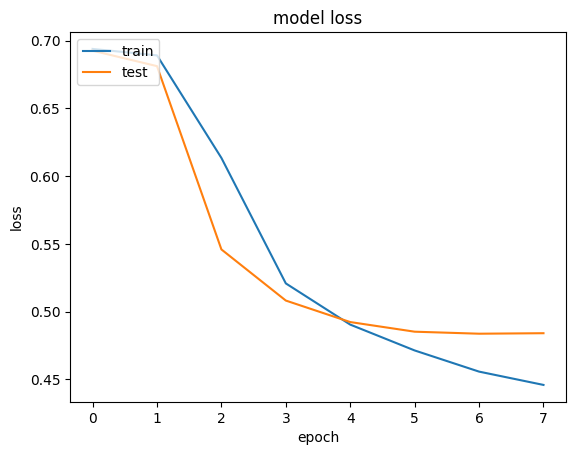

In [16]:
#Training results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [17]:
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = extract_weights('anime_embedding', model)
user_weights = extract_weights('user_embedding', model)

In [18]:
df = pd.read_csv(INPUT_DIR + '/anime.csv', low_memory=True)
df = df.replace("Unknown", np.nan)

In [19]:
# Fixing Names
def getAnimeName(anime_id):
    try:
        name = df[df.anime_id == anime_id].eng_version.values[0]
        if name is np.nan:
            name = df[df.anime_id == anime_id].Name.values[0]
    except:
        print('error')
    
    return name

df['anime_id'] = df['MAL_ID']
df["eng_version"] = df['English name']
df['eng_version'] = df.anime_id.apply(lambda x: getAnimeName(x))

df.sort_values(by=['Score'], 
               inplace=True,
               ascending=False, 
               kind='quicksort',
               na_position='last')

df = df[["anime_id", "eng_version", 
         "Score", "Genres", "Episodes", 
         "Type", "Premiered", "Members"]]

In [20]:
def getAnimeFrame(anime):
    if isinstance(anime, int):
        return df[df.anime_id == anime]
    if isinstance(anime, str):
        return df[df.eng_version == anime]

In [21]:
cols = ["MAL_ID", "Name", "Genres", "sypnopsis"]
sypnopsis_df = pd.read_csv(INPUT_DIR + '/anime_with_synopsis.csv', usecols=cols)

def getSypnopsis(anime):
    if isinstance(anime, int):
        return sypnopsis_df[sypnopsis_df.MAL_ID == anime].sypnopsis.values[0]
    if isinstance(anime, str):
        return sypnopsis_df[sypnopsis_df.Name == anime].sypnopsis.values[0]

## **Task 1**: Finding Similar Animes (Item Based Recommendation)

In [22]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        index = getAnimeFrame(name).anime_id.values[0]
        encoded_index = anime2anime_encoded.get(index)
        weights = anime_weights
        
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1            
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('animes closest to {}'.format(name))

        if return_dist:
            return dists, closest
        
        rindex = df

        SimilarityArr = []

        for close in closest:
            decoded_id = anime_encoded2anime.get(close)
            sypnopsis = getSypnopsis(decoded_id)
            anime_frame = getAnimeFrame(decoded_id)
            
            anime_name = anime_frame.eng_version.values[0]
            genre = anime_frame.Genres.values[0]
            similarity = dists[close]
            SimilarityArr.append({"anime_id": decoded_id, "name": anime_name,
                                  "similarity": similarity,"genre": genre,
                                  'sypnopsis': sypnopsis})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.anime_id != index].drop(['anime_id'], axis=1)

    except:
        print('{}!, Not Found in Anime list'.format(name))

In [23]:
find_similar_animes('Dragon Ball Z', n=5, neg=False)

animes closest to Dragon Ball Z


,name,similarity,genre,sypnopsis
4,Dragon Ball,0.965879,"Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power","Gokuu Son is a young boy who lives in the woods all alone—that is, until a girl named Bulma runs into him in her search for a set of magical objects called the ""Dragon Balls."" Since the artifacts are said to grant one wish to whoever collects all seven, Bulma hopes to gather them and wish for a perfect boyfriend. Gokuu happens to be in possession of a dragon ball, but unfortunately for Bulma, he refuses to part ways with it, so she makes him a deal: he can tag along on her journey if he lets her borrow the dragon ball's power. With that, the two set off on the journey of a lifetime. They don't go on the journey alone. On the way, they meet the old Muten-Roshi and wannabe disciple Kuririn, with whom Gokuu trains to become a stronger martial artist for the upcoming World Martial Arts Tournament. However, it's not all fun and games; the ability to make any wish come true is a powerful one, and there are others who would do much worse than just wishing for a boyfriend. To stop those who would try to abuse the legendary power, they train to become stronger fighters, using their newfound strength to help the people around them along the way."
3,Dragon Ball GT,0.910725,"Action, Sci-Fi, Adventure, Comedy, Super Power, Magic, Fantasy, Shounen","Emperor Pilaf finally has his hands on the Black Star Dragon Balls after years of searching, which are said to be twice as powerful as Earth's normal ones. Pilaf is about to make his wish for world domination when he is interrupted by Gokuu Son. As a result, Pilaf flubs his wish and accidentally turns Gokuu back into a child. After the wish is granted, the Black Star Dragon Balls scatter across the galaxy. However, Gokuu discovers that they will cause the Earth to explode unless they are all brought back within a year. Uniting with his granddaughter Pan and a young adult Trunks, Gokuu sets off on an adventure through the universe to find the Black Star Dragon Balls and save his planet from destruction."
2,Dragon Ball Z Kai,0.785707,"Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power","Five years after the events of Dragon Ball, martial arts expert Gokuu is now a grown man married to his wife Chi-Chi, with a four-year old son named Gohan. While attending a reunion on Turtle Island with his old friends Master Roshi, Krillin, Bulma and others, the festivities are interrupted when a humanoid alien named Raditz not only reveals the truth behind Gokuu's past, but kidnaps Gohan as well. With Raditz displaying power beyond anything Gokuu has seen before, he is forced to team up with his old nemesis, Piccolo, in order to rescue his son. But when Gokuu and Piccolo reveal the secret of the seven mystical wish-granting Dragon Balls to Raditz, he informs the duo that there is more of his race, the Saiyans, and they won’t pass up an opportunity to seize the power of the Dragon Balls for themselves. These events begin the saga of Dragon Ball Kai , a story that finds Gokuu and his friends and family constantly defending the galaxy from increasingly more powerful threats. Bizarre, comical, heartwarming and threatening characters come together in a series of battles that push the powers and abilities of Gokuu and his friends beyond anything they have ever experienced."
1,Digimon:Digital Monsters,0.718248,"Action, Adventure, Comedy, Fantasy, Kids","hen a group of seven children go to summer camp, the last thing that they expect is snow falling in July. In the confusion that follows this phenomenon, they each receive an odd device that transports them to another world. As soon as they wake up in this new world, they encounter strange creatures who call themselves ""Digimon."" The Digimon tell them that they've landed in the ""Digital World,"" far from home. With only the Digimon and the ""Digivices"" as protection, the seven children set off to find their way home and learn

In [24]:
find_similar_animes('Your Name.', n=5, neg=False)

animes closest to Your Name.


,name,similarity,genre,sypnopsis
4,A Silent Voice,0.932219,"Drama, School, Shounen","s a wild youth, elementary school student Shouya Ishida sought to beat boredom in the cruelest ways. When the deaf Shouko Nishimiya transfers into his class, Shouya and the rest of his class thoughtlessly bully her for fun. However, when her mother notifies the school, he is singled out and blamed for everything done to her. With Shouko transferring out of the school, Shouya is left at the mercy of his classmates. He is heartlessly ostracized all throughout elementary and middle school, while teachers turn a blind eye. Now in his third year of high school, Shouya is still plagued by his wrongdoings as a young boy. Sincerely regretting his past actions, he sets out on a journey of redemption: to meet Shouko once more and make amends. Koe no Katachi tells the heartwarming tale of Shouya's reunion with Shouko and his honest attempts to redeem himself, all while being continually haunted by the shadows of his past."
3,Your Lie in April,0.665760,"Drama, Music, Romance, School, Shounen","usic accompanies the path of the human metronome, the prodigious pianist Kousei Arima. But after the passing of his mother, Saki Arima, Kousei falls into a downward spiral, rendering him unable to hear the sound of his own piano. Two years later, Kousei still avoids the piano, leaving behind his admirers and rivals, and lives a colorless life alongside his friends Tsubaki Sawabe and Ryouta Watari. However, everything changes when he meets a beautiful violinist, Kaori Miyazono, who stirs up his world and sets him on a journey to face music again. Based on the manga series of the same name, Shigatsu wa Kimi no Uso approaches the story of Kousei's recovery as he discovers that music is more than playing each note perfectly, and a single melody can bring in the fresh spring air of April."
2,Re:ZERO -Starting Life in Another World-,0.639953,"Psychological, Drama, Thriller, Fantasy","hen Subaru Natsuki leaves the convenience store, the last thing he expects is to be wrenched from his everyday life and dropped into a fantasy world. Things aren't looking good for the bewildered teenager; however, not long after his arrival, he is attacked by some thugs. Armed with only a bag of groceries and a now useless cell phone, he is quickly beaten to a pulp. Fortunately, a mysterious beauty named Satella, in hot pursuit after the one who stole her insignia, happens upon Subaru and saves him. In order to thank the honest and kindhearted girl, Subaru offers to help in her search, and later that night, he even finds the whereabouts of that which she seeks. But unbeknownst to them, a much darker force stalks the pair from the shadows, and just minutes after locating the insignia, Subaru and Satella are brutally murdered. However, Subaru immediately reawakens to a familiar scene—confronted by the same group of thugs, meeting Satella all over again—the enigma deepens as history inexplicably repeats itself."
1,ERASED,0.619115,"Mystery, Psychological, Supernatural, Seinen","hen tragedy is about to strike, Satoru Fujinuma finds himself sent back several minutes before the accident occurs. The detached, 29-year-old manga artist has taken advantage of this powerful yet mysterious phenomenon, which he calls ""Revival,"" to save many lives. However, when he is wrongfully accused of murdering someone close to him, Satoru is sent back to the past once again, but this time to 1988, 18 years in the past. Soon, he realizes that the murder may be connected to the abduction and killing of one of his classmates, the solitary and mysterious Kayo Hinazuki, that took place when he was a child. This is his chance to make things right. Boku dake ga Inai Machi follows Satoru in his mission to uncover what truly transpired 18 years ago and prevent the death of his classmate while protecting those he cares about in the present."
0,The Garden of Words,0.613754,"Slice of Life, Psychological, Drama, Romance","On a 

In [25]:
find_similar_animes('Sword Art Online', n=5, neg=False)

animes closest to Sword Art Online


,name,similarity,genre,sypnopsis
4,Sword Art Online II,0.871990,"Action, Game, Adventure, Romance, Fantasy","ar after escaping Sword Art Online, Kazuto Kirigaya has been settling back into the real world. However, his peace is short-lived as a new incident occurs in a game called Gun Gale Online, where a player by the name of Death Gun appears to be killing people in the real world by shooting them in-game. Approached by officials to assist in investigating the murders, Kazuto assumes his persona of Kirito once again and logs into Gun Gale Online, intent on stopping the killer. Once inside, Kirito meets Sinon, a highly skilled sniper afflicted by a traumatic past. She is soon dragged in his chase after Death Gun, and together they enter the Bullet of Bullets, a tournament where their target is sure to appear. Uncertain of Death Gun's real powers, Kirito and Sinon race to stop him before he has the chance to claim another life. Not everything goes smoothly, however, as scars from the past impede their progress. In a high-stakes game where the next victim could easily be one of them, Kirito puts his life on the line in the virtual world once more."
3,"No Game, No Life",0.783547,"Game, Adventure, Comedy, Supernatural, Ecchi, Fantasy","No Game No Life is a surreal comedy that follows Sora and Shiro, shut-in NEET siblings and the online gamer duo behind the legendary username ""Blank."" They view the real world as just another lousy game; however, a strange e-mail challenging them to a chess match changes everything—the brother and sister are plunged into an otherworldly realm where they meet Tet, the God of Games. The mysterious god welcomes Sora and Shiro to Disboard, a world where all forms of conflict—from petty squabbles to the fate of whole countries—are settled not through war, but by way of high-stake games. This system works thanks to a fundamental rule wherein each party must wager something they deem to be of equal value to the other party's wager. In this strange land where the very idea of humanity is reduced to child's play, the indifferent genius gamer duo of Sora and Shiro have finally found a real reason to keep playing games: to unite the sixteen races of Disboard, defeat Tet, and become the gods of this new, gaming-is-everything world."
2,Attack on Titan,0.747398,"Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen","Centuries ago, mankind was slaughtered to near extinction by monstrous humanoid creatures called titans, forcing humans to hide in fear behind enormous concentric walls. What makes these giants truly terrifying is that their taste for human flesh is not born out of hunger but what appears to be out of pleasure. To ensure their survival, the remnants of humanity began living within defensive barriers, resulting in one hundred years without a single titan encounter. However, that fragile calm is soon shattered when a colossal titan manages to breach the supposedly impregnable outer wall, reigniting the fight for survival against the man-eating abominations. After witnessing a horrific personal loss at the hands of the invading creatures, Eren Yeager dedicates his life to their eradication by enlisting into the Survey Corps, an elite military unit that combats the merciless humanoids outside the protection of the walls. Based on Hajime Isayama's award-winning manga, Shingeki no Kyojin follows Eren, along with his adopted sister Mikasa Ackerman and his childhood friend Armin Arlert, as they join the brutal war against the titans and race to discover a way of defeating them before the last walls are breached."
1,Tokyo Ghoul,0.695229,"Action, Mystery, Horror, Psychological, Supernatural, Drama, Seinen","Tokyo has become a cruel and merciless city—a place where vicious creatures called ""ghouls"" exist alongside humans. The citizens of this once great metropolis live in constant fear of these bloodthirsty savages and their thirst for human flesh. However, the greatest threat these ghouls pose is

In [26]:
find_similar_animes('Black Clover', n=5, neg=False)

animes closest to Black Clover


,name,similarity,genre,sypnopsis
4,Boruto:Naruto Next Generations,0.732888,"Action, Adventure, Super Power, Martial Arts, Shounen","Following the successful end of the Fourth Shinobi World War, Konohagakure has been enjoying a period of peace, prosperity, and extraordinary technological advancement. This is all due to the efforts of the Allied Shinobi Forces and the village's Seventh Hokage, Naruto Uzumaki. Now resembling a modern metropolis, Konohagakure has changed, particularly the life of a shinobi. Under the watchful eye of Naruto and his old comrades, a new generation of shinobi has stepped up to learn the ways of the ninja. Boruto Uzumaki is often the center of attention as the son of the Seventh Hokage. Despite having inherited Naruto's boisterous and stubborn demeanor, Boruto is considered a prodigy and is able to unleash his potential with the help of supportive friends and family. Unfortunately, this has only worsened his arrogance and his desire to surpass Naruto which, along with his father's busy lifestyle, has strained their relationship. However, a sinister force brewing within the village may threaten Boruto's carefree life. New friends and familiar faces join Boruto as a new story begins in Boruto: Naruto Next Generations ."
3,Jujutsu Kaisen (TV),0.589202,"Action, Demons, Supernatural, School, Shounen","Idly indulging in baseless paranormal activities with the Occult Club, high schooler Yuuji Itadori spends his days at either the clubroom or the hospital, where he visits his bedridden grandfather. However, this leisurely lifestyle soon takes a turn for the strange when he unknowingly encounters a cursed item. Triggering a chain of supernatural occurrences, Yuuji finds himself suddenly thrust into the world of Curses—dreadful beings formed from human malice and negativity—after swallowing the said item, revealed to be a finger belonging to the demon Sukuna Ryoumen, the ""King of Curses."" Yuuji experiences first-hand the threat these Curses pose to society as he discovers his own newfound powers. Introduced to the Tokyo Metropolitan Jujutsu Technical High School, he begins to walk down a path from which he cannot return—the path of a Jujutsu sorcerer."
2,One Piece,0.521401,"Action, Adventure, Comedy, Super Power, Drama, Fantasy, Shounen","Gol D. Roger was known as the ""Pirate King,"" the strongest and most infamous being to have sailed the Grand Line. The capture and execution of Roger by the World Government brought a change throughout the world. His last words before his death revealed the existence of the greatest treasure in the world, One Piece. It was this revelation that brought about the Grand Age of Pirates, men who dreamed of finding One Piece—which promises an unlimited amount of riches and fame—and quite possibly the pinnacle of glory and the title of the Pirate King. Enter Monkey D. Luffy, a 17-year-old boy who defies your standard definition of a pirate. Rather than the popular persona of a wicked, hardened, toothless pirate ransacking villages for fun, Luffy's reason for being a pirate is one of pure wonder: the thought of an exciting adventure that leads him to intriguing people and ultimately, the promised treasure. Following in the footsteps of his childhood hero, Luffy and his crew travel across the Grand Line, experiencing crazy adventures, unveiling dark mysteries and battling strong enemies, all in order to reach the most coveted of all fortunes—One Piece."
1,Super Dragon Ball Heroes,0.511378,"Action, Comedy, Super Power, Martial Arts, Fantasy, Shounen","In May 2018, V-Jump announced a promotional anime for Dragon Ball Heroes , a Japanese arcade and trading card game that has never been released in the West. The anime is expected to be short and it is not expected to broadcast on TV. It will adapt the game's Prison Planet Arc, fully detailed in the Heroes manga published in Saikyou Jump, which has never been published in English. The first episode will debut July 1, 2018 at Aeon Lake Tow

In [27]:
find_similar_animes('Death Note', n=5, neg=False)

animes closest to Death Note


,name,similarity,genre,sypnopsis
4,Attack on Titan,0.799331,"Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen","Centuries ago, mankind was slaughtered to near extinction by monstrous humanoid creatures called titans, forcing humans to hide in fear behind enormous concentric walls. What makes these giants truly terrifying is that their taste for human flesh is not born out of hunger but what appears to be out of pleasure. To ensure their survival, the remnants of humanity began living within defensive barriers, resulting in one hundred years without a single titan encounter. However, that fragile calm is soon shattered when a colossal titan manages to breach the supposedly impregnable outer wall, reigniting the fight for survival against the man-eating abominations. After witnessing a horrific personal loss at the hands of the invading creatures, Eren Yeager dedicates his life to their eradication by enlisting into the Survey Corps, an elite military unit that combats the merciless humanoids outside the protection of the walls. Based on Hajime Isayama's award-winning manga, Shingeki no Kyojin follows Eren, along with his adopted sister Mikasa Ackerman and his childhood friend Armin Arlert, as they join the brutal war against the titans and race to discover a way of defeating them before the last walls are breached."
3,Code Geass:Lelouch of the Rebellion,0.761999,"Action, Military, Sci-Fi, Super Power, Drama, Mecha, School","In the year 2010, the Holy Empire of Britannia is establishing itself as a dominant military nation, starting with the conquest of Japan. Renamed to Area 11 after its swift defeat, Japan has seen significant resistance against these tyrants in an attempt to regain independence. Lelouch Lamperouge, a Britannian student, unfortunately finds himself caught in a crossfire between the Britannian and the Area 11 rebel armed forces. He is able to escape, however, thanks to the timely appearance of a mysterious girl named C.C., who bestows upon him Geass, the ""Power of Kings."" Realizing the vast potential of his newfound ""power of absolute obedience,"" Lelouch embarks upon a perilous journey as the masked vigilante known as Zero, leading a merciless onslaught against Britannia in order to get revenge once and for all."
2,Code Geass:Lelouch of the Rebellion R2,0.755740,"Action, Military, Sci-Fi, Super Power, Drama, Mecha","One year has passed since the Black Rebellion, a failed uprising against the Holy Britannian Empire led by the masked vigilante Zero, who is now missing. At a loss without their revolutionary leader, Area 11's resistance group—the Black Knights—find themselves too powerless to combat the brutality inflicted upon the Elevens by Britannia, which has increased significantly in order to crush any hope of a future revolt. Lelouch Lamperouge, having lost all memory of his double life, is living peacefully alongside his friends as a high school student at Ashford Academy. His former partner C.C., unable to accept this turn of events, takes it upon herself to remind him of his past purpose, hoping that the mastermind Zero will rise once again to finish what he started, in this thrilling conclusion to the series."
1,Naruto,0.712606,"Action, Adventure, Comedy, Super Power, Martial Arts, Shounen","oments prior to Naruto Uzumaki's birth, a huge demon known as the Kyuubi, the Nine-Tailed Fox, attacked Konohagakure, the Hidden Leaf Village, and wreaked havoc. In order to put an end to the Kyuubi's rampage, the leader of the village, the Fourth Hokage, sacrificed his life and sealed the monstrous beast inside the newborn Naruto. Now, Naruto is a hyperactive and knuckle-headed ninja still living in Konohagakure. Shunned because of the Kyuubi inside him, Naruto struggles to find his place in the village, while his burning desire to become the Hokage of Konohagakure leads him not only to some great new friends, but also some deadly foes."
0,Fullmetal Alchemist:Brotherhood,0.685127,"Action, Military

In [28]:
print('> picking up random user')

ratings_per_user = rating_df.groupby('user_id').size()
random_user = ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0]
print('> user_id:', random_user)

> picking up random user


> user_id: 135883


In [29]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_users(item_input, n=10,return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user2user_encoded.get(index)
        weights = user_weights
    
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('> users similar to #{}'.format(item_input))

        if return_dist:
            return dists, closest
        
        rindex = df
        SimilarityArr = []
        
        for close in closest:
            similarity = dists[close]

            if isinstance(item_input, int):
                decoded_id = user_encoded2user.get(close)
                SimilarityArr.append({"similar_users": decoded_id, 
                                      "similarity": similarity})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", 
                                                        ascending=False)
        
        return Frame
    
    except:
        print('{}!, Not Found in User list'.format(name))

In [30]:
similar_users = find_similar_users(int(random_user), 
                                   n=5, 
                                   neg=False)

similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users.head(5)

> users similar to #135883


,similar_users,similarity
4,96898,0.629207
3,250231,0.607717
2,30781,0.602255
1,198822,0.602229
0,98872,0.595380
